# Two-Layer Neural Networks

In this part of the homework, we will work on building a simple Neural Network to classify digits using MNIST dataset. There are many powerful neural network frameworks nowadays that are relatively straightforward to use. However, we believe that in order to understand the theory behind neural networks, and to have the right intuitions in order to build, use, and debug more complex architectures, one must first start from the basics.

Your task is to complete the missing codes needed for training and testing of a simple fully-connected neural network.

The missing parts will be marked with TODO#N, where N represents the task number.

Many parts in this homework are modified from Stanford's cs231n assignments.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from cattern.neural_net import TwoLayerNet

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Just a function that verifies if your answers are correct

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cattern/neural_net.py` to represent instances of our network. The network parameters (weights and biases) are stored in the instance variable `self.params` where the keys are parameter names and values are numpy arrays. Below, we initialize some toy data and a toy model that will guide you with your implementation.

In [24]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cattern/neural_net.py` and look at the method `TwoLayerNet.loss`. This function takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Complete TODO#1 in `TwoLayerNet.loss`, by implementing the first part of the forward pass which uses the weights and biases to compute the scores for all inputs. The scores refer to the output of the network just before the softmax layer.

In [25]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  0.          0.
   0.          2.07688014  2.1940494 ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.8990617   0.          0.56481687]]
Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.152

# Forward pass: compute loss
In the same function, complete TODO#2 by implementing the second part that computes the data and regularizaion loss.

In [26]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))
print(loss, correct_loss)

[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  0.          0.
   0.          2.07688014  2.1940494 ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.8990617   0.          0.56481687]]
Difference between your loss and correct loss:
1.79856129989e-13
1.30378789133 1.30378789133


# Backward pass
Implement the rest of the function by completing TODO#3. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [27]:
from cattern.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  0.          0.
   0.          2.07688014  2.1940494 ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.8990617   0.          0.56481687]]
[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  

[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  0.          0.
   0.          2.07688014  2.1940494 ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.8990617   0.          0.56481687]]
[[ 3.95947405  0.          1.62023427  6.08287206  1.93650153  0.          0.
   0.          0.          0.73773989]
 [ 0.          0.          1.27951663  1.87210399  4.81975823  0.          0.
   0.          2.15938324  5.11493888]
 [ 0.          0.          3.21533801  3.68018447  4.52051191  0.          0.
   0.          2.92803574  3.11513047]
 [ 0.          0.          1.34869732  0.56798438  2.18344354  

# Train the network
To train the network we will use stochastic gradient descent (SGD). Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure (TODO#4-6). You will also have to implement `TwoLayerNet.predict` (TODO#7), as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.05.

[[ 0.          0.          1.27951663 ...,  0.          2.15938324
   5.11493888]
 [ 0.          0.          0.         ...,  0.8990617   0.          0.56481687]
 [ 0.          0.          3.21533801 ...,  0.          2.92803574
   3.11513047]
 ..., 
 [ 0.          0.          3.21533801 ...,  0.          2.92803574
   3.11513047]
 [ 0.          0.          0.         ...,  0.8990617   0.          0.56481687]
 [ 0.          0.          1.27951663 ...,  0.          2.15938324
   5.11493888]]
[[ 0.          0.          1.2619977  ...,  0.          0.7043279
   1.82299215]
 [ 0.          0.          1.2619977  ...,  0.          0.7043279
   1.82299215]
 [ 0.          0.          1.2619977  ...,  0.          0.7043279
   1.82299215]
 ..., 
 [ 4.3518013   0.          1.74664824 ...,  0.          0.          0.91620634]
 [ 0.          0.          2.86491579 ...,  0.          0.80601125
   2.88274509]
 [ 4.3518013   0.          1.74664824 ...,  0.          0.          0.91620634]]
[[ 0.      

[[  0.           0.           0.13782538 ...,   0.           0.
    3.77729787]
 [  0.           0.          11.68537992 ...,   1.16674838   2.36378539
    3.88068344]
 [  0.           0.           5.02394831 ...,   2.10333913   1.16339551
    0.        ]
 ..., 
 [  0.           0.           0.13782538 ...,   0.           0.
    3.77729787]
 [  0.           0.           0.         ...,   0.           0.
    5.58892529]
 [  0.           0.          11.68537992 ...,   1.16674838   2.36378539
    3.88068344]]
[[  0.           0.          11.68575897 ...,   1.16717623   2.36404726
    3.8809543 ]
 [  0.           0.          11.68575897 ...,   1.16717623   2.36404726
    3.8809543 ]
 [  0.           0.          11.68575897 ...,   1.16717623   2.36404726
    3.8809543 ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.
    5.58933119]
 [  8.5016247    0.           1.19510798 ...,   0.           0.           0.        ]
 [  0.           0.           5.02457598 ...,   2.1

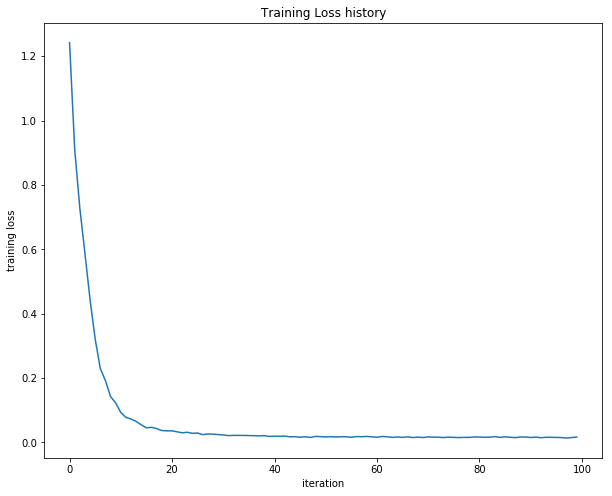

In [28]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up MNIST data so we can use it to train a classifier on a real dataset.

In [29]:
from mnist_data import load_mnist


def get_mnist_data(num_training=55000, num_validation=5000, num_test=10000):
    """
    Load the MNIST dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier.
    """
    # Load the raw MNIST data
    X_train, y_train, X_val, y_val, X_test, y_test = load_mnist.read_data_sets('mnist_data')

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train = X_train - mean_image
    X_val = X_val - mean_image
    X_test = X_test - mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_mnist_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz
Train data shape:  (55000, 784)
Train labels shape:  (55000,)
Validation data shape:  (5000, 784)
Validation labels shape:  (5000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


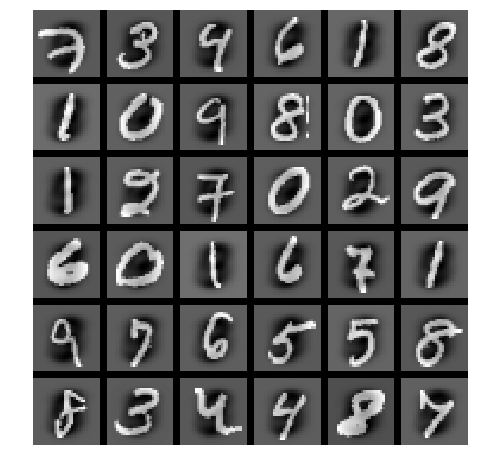

In [30]:
from mnist_data.vis_utils import visualize_grid

# Visualize mnist data

def show_mnist_image(data):
  data = data.reshape(-1, 28, 28, 1)
  plt.imshow(visualize_grid(data, padding=3).astype('uint8').squeeze(axis=2))
  plt.gca().axis('off')
  plt.show()

show_mnist_image(X_train[:36])

# Train a network
To train our network we will use SGD with momentum. We will use fixed learning rate to train this model.

In [31]:
input_size = 28 * 28 * 1
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=1,
            reg=0, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

[[ 0.26621733  0.20484577  0.04411818 ...,  0.28726035  0.12026849
   0.00254828]
 [ 0.          0.02527756  0.         ...,  0.37055604  0.112855    0.        ]
 [ 0.          0.13880789  0.03775982 ...,  0.          0.15181351  0.        ]
 ..., 
 [ 0.          0.24907542  0.02642698 ...,  0.09644041  0.25031074
   0.2943415 ]
 [ 0.          0.0627686   0.0644298  ...,  0.          0.          0.0889944 ]
 [ 0.01992307  0.0472884   0.018829   ...,  0.14992218  0.          0.        ]]
iteration 0 / 2000: loss 2.302592
[[ 0.          0.08533209  0.         ...,  0.06355418  0.4681805   0.        ]
 [ 0.00579292  0.00753898  0.16829451 ...,  0.          0.10772782  0.        ]
 [ 0.08628995  0.          0.16032452 ...,  0.05716064  0.00442787
   0.28888866]
 ..., 
 [ 0.          0.          0.         ...,  0.04503755  0.          0.        ]
 [ 0.07254483  0.06104201  0.         ...,  0.          0.16158682  0.        ]
 [ 0.0591825   0.          0.18509802 ...,  0.19988757  0.       

[[ 0.06553493  0.          0.11877752 ...,  0.          0.12149951
   0.32474522]
 [ 0.          0.10129571  0.11340344 ...,  0.          0.          0.33858975]
 [ 0.          0.14276499  0.01943834 ...,  0.          0.          0.        ]
 ..., 
 [ 0.00625587  0.07460345  0.12035014 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.10784742
   0.176651  ]
 [ 0.          0.01836159  0.01944746 ...,  0.06139589  0.          0.0837759 ]]
[[ 0.12135642  0.          0.17827475 ...,  0.          0.          0.02785279]
 [ 0.08309468  0.          0.         ...,  0.          0.          0.21316511]
 [ 0.05616282  0.1702538   0.         ...,  0.          0.02841843
   0.203792  ]
 ..., 
 [ 0.          0.10030531  0.         ...,  0.26547625  0.          0.        ]
 [ 0.          0.06756754  0.03662636 ...,  0.16672333  0.50720089  0.        ]
 [ 0.03962657  0.          0.00944297 ...,  0.20367367  0.2446409
   0.11205235]]
[[ 0.          0.

[[ 0.          0.          0.         ...,  0.49324364  0.          0.        ]
 [ 0.          0.          0.         ...,  0.16722725  0.          0.        ]
 [ 0.          0.3988638   0.13162716 ...,  0.05099021  0.2367839   0.        ]
 ..., 
 [ 0.24158321  0.08648571  0.         ...,  0.30004172  0.16801892
   0.2317669 ]
 [ 0.02799471  0.          0.         ...,  0.05143158  0.          0.        ]
 [ 0.          0.          0.         ...,  0.03728401  0.          0.08556001]]
[[ 0.          0.1478503   0.         ...,  0.0460489   0.06684178  0.        ]
 [ 0.24068955  0.15393286  0.         ...,  0.48548362  0.          0.        ]
 [ 0.22733772  0.09287475  0.         ...,  0.20698256  0.38712679
   0.09383912]
 ..., 
 [ 0.29441672  0.13279889  0.16897531 ...,  0.08425484  0.07233974  0.        ]
 [ 0.16485657  0.          0.         ...,  0.13077299  0.          0.33582677]
 [ 0.          0.27163117  0.09819187 ...,  0.          0.10102873  0.        ]]
[[ 0.19595764  0.   

[[ 0.21970304  0.          0.         ...,  0.31368303  0.37905453
   0.32579237]
 [ 0.01314608  0.23452104  0.22401996 ...,  0.          0.          0.        ]
 [ 0.38896593  0.          0.         ...,  0.          0.32143939
   0.56885498]
 ..., 
 [ 0.          0.00557223  0.         ...,  0.04363403  0.          0.21007984]
 [ 0.04684389  0.3221862   0.2346582  ...,  0.21463547  0.25555438
   0.08663979]
 [ 0.3072926   0.          0.         ...,  0.09886156  0.29834858
   0.76673831]]
[[ 0.24339402  0.          0.         ...,  0.34332369  0.16883636
   0.49849707]
 [ 0.39103539  0.          0.         ...,  0.          0.18112484
   0.7362261 ]
 [ 0.          0.          0.2254455  ...,  0.13265604  0.08712155  0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.30099722]
 [ 0.26062896  0.          0.14777023 ...,  0.          0.49473847
   0.56802449]
 [ 0.19277838  0.01643132  0.         ...,  0.50915212  0.02316092
   0.09096641]]
[[ 0.268

[[ 0.          0.04777196  0.         ...,  0.17468831  0.          0.        ]
 [ 0.          0.43742328  0.02878694 ...,  0.20931223  0.          0.        ]
 [ 0.          0.          0.         ...,  0.66099218  0.          0.        ]
 ..., 
 [ 0.          0.28664001  0.27049912 ...,  0.          0.          0.        ]
 [ 0.00565432  0.17413243  0.3352495  ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.24751662]]
[[ 0.10224802  0.08338315  0.45156716 ...,  0.          0.33628699  0.        ]
 [ 0.          0.          0.         ...,  0.15580325  0.40954336
   0.15906092]
 [ 0.          0.31625789  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.35440946  0.07889029  0.        ]
 [ 0.          0.16013114  0.21471505 ...,  0.          0.          0.        ]
 [ 0.43104824  0.          0.         ...,  0.15815554  0.05682543
   0.43044575]]
[[ 0.          0.   

[[ 0.          0.12334482  0.         ...,  0.18385493  0.00280922  0.        ]
 [ 0.          0.28198973  0.57103015 ...,  0.          0.          0.        ]
 [ 0.          0.44401056  0.22910219 ...,  0.          0.08771446  0.        ]
 ..., 
 [ 0.24820872  0.58227609  0.50226946 ...,  0.          0.49359357  0.        ]
 [ 0.84560569  0.10119581  0.17975949 ...,  0.33626105  0.63705641
   0.93823057]
 [ 0.          0.32511052  0.17363937 ...,  0.          0.          0.        ]]
[[ 0.2231681   0.          0.60913772 ...,  0.          0.          0.27220028]
 [ 0.          0.          0.43285273 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.34315064  0.38191723  0.23849277 ...,  0.31208343  0.40090629  0.        ]
 [ 0.          0.17001249  0.59806982 ...,  0.          0.          0.        ]
 [ 0.22223921  0.1298449   0.07717397 ...,  0.19150381  0.14649781
   0.49157637]]
[[  0.00000000e+00  

 [ 0.          0.          0.         ...,  0.14450518  0.          0.        ]]
[[ 0.80854054  0.          0.         ...,  0.          0.84404962
   1.69849689]
 [ 0.24239904  0.17024262  0.         ...,  0.          0.          0.11709371]
 [ 0.49217601  0.21790013  0.         ...,  0.87855044  0.33193223
   0.25509527]
 ..., 
 [ 0.02579865  0.          0.         ...,  0.          0.          0.34606159]
 [ 0.40936879  0.44417438  0.29355081 ...,  0.39541377  0.54968279  0.        ]
 [ 0.04918347  0.12670668  0.         ...,  0.          0.47912068
   0.02356682]]
[[ 0.98837524  0.          0.06666399 ...,  0.1026241   0.84986228
   1.59025039]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.59147447  0.          0.         ...,  0.29120257  0.06077163
   0.86889903]
 ..., 
 [ 0.51948148  0.29972114  0.         ...,  0.1493433   0.36306628
   0.52326411]
 [ 0.          0.47726952  0.94186938 ...,  0.          0.          0.        ]
 [ 0.2955937

   0.19112575]]
[[ 0.          0.67291525  0.         ...,  0.86947627  0.          0.        ]
 [ 0.          0.          0.11850108 ...,  0.          0.          0.        ]
 [ 1.22736787  0.          0.22893575 ...,  0.          0.98680251
   2.13361927]
 ..., 
 [ 0.2763461   0.          0.         ...,  0.49603308  0.14360497
   0.45290561]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 1.2460847   0.          0.         ...,  0.          1.24096504
   2.47833082]]
[[  5.05820375e-01   3.35747419e-02   1.43268969e-01 ...,   2.51218251e-03
    5.81800141e-01   8.09557825e-01]
 [  0.00000000e+00   4.61938607e-04   0.00000000e+00 ...,   7.45486501e-01
    3.70750475e-01   0.00000000e+00]
 [  1.11476031e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.01637776e+00   1.91304081e+00]
 ..., 
 [  1.12289184e+00   0.00000000e+00   3.36039863e-02 ...,   0.00000000e+00
    9.83472722e-01   2.13959934e+00]
 [  0.00000000e+00   1.23668538e-01

[[ 0.48841259  0.          0.02945027 ...,  0.          0.          0.43495512]
 [ 0.28477115  0.          0.         ...,  0.          0.03657385
   0.78611369]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.13538628  0.          0.         ...,  0.65312131  0.11944991  0.        ]
 [ 1.7823972   0.          0.02810546 ...,  0.          1.6364415
   3.47052379]
 [ 0.          0.36886702  0.67525927 ...,  0.          0.          0.        ]]
[[ 0.18365719  0.47020615  0.         ...,  0.26478621  0.33869952
   0.11322499]
 [ 0.          0.27776318  0.         ...,  0.09421932  0.13870802  0.        ]
 [ 0.02725561  0.          0.         ...,  0.          0.          0.24587552]
 ..., 
 [ 0.          0.          0.         ...,  0.30838875  0.          0.        ]
 [ 0.          0.43712269  0.1489117  ...,  0.13952137  0.          0.        ]
 [ 0.00764469  0.14842793  0.03248756 ...,  0.          0.24089888
   0.02365173]]
[[ 0.          0.

[[ 0.66190618  0.          0.         ...,  0.02337279  0.58604631
   1.12491074]
 [ 0.36623     0.20839424  0.6532089  ...,  0.          0.21108197
   0.45765835]
 [ 1.0911033   0.          0.         ...,  0.90013138  1.10698222
   1.52743024]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.84941641  0.          0.76209158 ...,  0.          0.41146525
   1.19197251]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0.30403735  0.75701025 ...,  0.          0.          0.        ]
 [ 0.          0.46155609  0.26779473 ...,  0.99847324  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.03241847  0.         ...,  0.64407895  0.68798385
   0.21883189]
 [ 0.          0.25515192  0.36283063 ...,  0.17006532  0.          0.        ]
 [ 0.          0.37790402  1.11734544 ...,  0.          0.          0.        ]]
[[ 0.         

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.03084744  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.3822052   0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.32571835  0.37105012  0.96184974 ...,  0.          0.          0.        ]]
[[ 0.15723782  0.71266203  0.17728748 ...,  0.42920744  0.5149188   0.        ]
 [ 0.          0.19913095  0.08600174 ...,  0.          0.07207131  0.        ]
 [ 0.84179042  0.51389408  0.76816005 ...,  0.45320956  0.98901878
   1.16852662]
 ..., 
 [ 1.24999033  0.40713415  0.17620604 ...,  0.70630746  0.66668511
   1.2472069 ]
 [ 0.          0.42232832  1.42657112 ...,  0.          0.          0.        ]
 [ 1.00617705  0.02641877  0.         ...,  1.57229608  0.87072363
   1.1000382 ]]
[[ 0.          0. 

[[ 0.85875401  0.22098381  0.25123947 ...,  0.84541583  1.05407922
   1.45802464]
 [ 0.          0.09005061  0.         ...,  0.          0.          0.        ]
 [ 0.          2.49124317  3.24189011 ...,  0.02075261  0.          0.        ]
 ..., 
 [ 0.          0.61858375  0.67456704 ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.22319909  0.          0.        ]]
[[ 1.2746685   0.          0.324418   ...,  0.          0.94681403
   2.99613614]
 [ 0.          0.27261639  0.         ...,  0.83237317  0.          0.        ]
 [ 0.          0.27775458  0.         ...,  2.01070771  0.          0.        ]
 ..., 
 [ 2.05142061  0.          0.64562939 ...,  0.          1.48244407
   3.20498367]
 [ 5.56464035  0.          0.         ...,  0.          4.89316583
   9.98292468]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.          0

[[ 0.          0.09421431  0.2806807  ...,  0.13780628  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.44410317  0.          0.        ]
 [ 0.          0.          0.         ...,  0.13942224  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[  0.           0.86664601   1.98491343 ...,   0.           0.           0.        ]
 [  0.           1.36515811   1.48306498 ...,   0.           0.           0.        ]
 [  0.           1.16994882   1.51413345 ...,   1.83884504   0.           0.        ]
 ..., 
 [  7.50955909   0.           0.         ...,   0.           6.60867871
   13.75366676]
 [  0.86441386   0.           0.         ...,   3.23055246   2.03954339
    1.16186928]
 [  0.42358849   0.           0.         ...,   0.           0.52016244

[[ 0.          2.67316356  5.01263861 ...,  0.          0.          0.        ]
 [ 0.          0.7273596   2.07277715 ...,  0.          0.          0.        ]
 [ 0.          5.07250312  6.37082809 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.15370305  0.         ...,  3.50525633  0.          0.        ]
 [ 3.19834282  0.26058906  0.95002835 ...,  0.          2.51547107
   5.21622309]
 [ 0.63667759  0.87362668  0.23922699 ...,  4.22099025  1.27880592
   0.1310789 ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   7.38095801e-01   2.60828455e-01 ...,   3.63987171e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01372005e+00   8.40957580e-03   0.00000000e+00 ...,   2.01622170e+00
    2.62148591e+00   3.13008112e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.23872095e+00
    0.00000000e+00   0.00000000e+00]
 [  4.77004317e+00   0.00000000e+00   0.00000000e+00 

[[  0.           0.           0.11571481 ...,   0.           0.           0.        ]
 [  0.           0.27767886   0.91695861 ...,   0.           0.           0.        ]
 [ 13.9878363    0.           0.         ...,   0.59970785  11.95363679
   24.21997459]
 ..., 
 [  0.           0.85333225   2.5635067  ...,   1.32551087   0.           0.        ]
 [  0.           0.21913459   1.89113091 ...,   0.           0.           0.        ]
 [  0.           0.99785744   0.56719089 ...,   3.74240013   0.18419229
    0.        ]]
[[ 11.76974549   0.           0.         ...,   0.          10.43936908
   21.30709924]
 [  0.           4.50178052   5.51636169 ...,   0.           0.           0.        ]
 [  0.           1.88691497   3.67905581 ...,   0.           0.           0.        ]
 ..., 
 [  0.54511264   0.           0.         ...,   0.           0.08399541
    0.99221806]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           5.03346418   6

[[  0.           0.           0.         ...,   2.50569601   0.           0.        ]
 [  2.32890018   0.           0.         ...,   3.23009159   1.51564892
    3.20590354]
 [  4.23188386   1.95292698   1.60340948 ...,   1.38435916   3.90684678
    7.74890639]
 ..., 
 [ 16.01428071   0.           0.         ...,   0.          13.6595644
   28.63604422]
 [  2.96533807   0.           0.         ...,   0.           2.70143798
    6.23604902]
 [  0.           8.25241243   9.68267085 ...,   0.           0.           0.        ]]
[[  7.78197644   0.           0.         ...,   0.           6.80538237
   13.9074364 ]
 [  0.           6.14100185   6.96102258 ...,   0.           0.           0.        ]
 [  0.           0.           1.80659488 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.39767093   0.         ...,   4.551374     0.           0.        ]
 [  0.           0.           0.         ...,   3.38607218   0.           0.        ]
 [  0.           0.           

[[  6.64539380e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.42568102e+00   1.28247581e+01]
 [  0.00000000e+00   0.00000000e+00   1.12313783e-02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   1.61386606e+00   1.17106806e-01 ...,   1.17866524e+01
    0.00000000e+00   0.00000000e+00]
 [  1.08505847e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    9.39662410e+00   1.88921212e+01]
 [  0.00000000e+00   6.43514651e-01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           1.35782761   0.88624751 ...,   6.9018286    0.           0.        ]
 [  0.          10.63463572  12.86638099 ...,   1.19384115   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  11.59419

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  7.34919849   0.           0.         ...,   9.58663997   8.00821584
   12.74383286]
 [  0.           0.35914336   0.06702669 ...,   3.5349213    0.           0.        ]
 ..., 
 [  0.          11.37856665  13.3390274  ...,   0.           0.           0.        ]
 [  3.99216177   0.37360207   1.95764437 ...,   0.           2.27004111
    5.77341794]
 [  4.77258796   0.           0.         ...,   0.           3.57042727
    9.67991742]]
[[  5.8444104    0.           0.         ...,   0.           4.13443182
    9.72339753]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           6.48347763   8.84594675 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  1.92691915   0.           0

[[  8.48392561   0.           0.         ...,   0.           6.86014012
   16.36225232]
 [  0.           0.           1.16729785 ...,   4.39934059   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   3.75503537   0.           0.        ]
 [  0.           1.38626996   0.5149301  ...,   3.54896197   0.           0.        ]]
[[  0.          10.08990319  14.55813798 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.05047162   0.           0.        ]
 [  0.           0.           0.         ...,  14.64628568   0.           0.        ]
 ..., 
 [ 12.07003974   0.8089081    3.30307898 ...,   2.65888034  10.17335919
   18.90811495]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           7.78572076  10.418

[[  3.42309982   0.           0.         ...,  16.50750144   5.31576208
    4.96520438]
 [  3.52173164   0.           0.         ...,  11.98038139   4.72083804
    5.04887058]
 [ 21.5122457    0.           0.         ...,   1.88950957  18.33851193
   36.61815601]
 ..., 
 [  0.           6.80573569   7.90961417 ...,   1.15825885   0.           0.        ]
 [ 26.24190825   0.           0.         ...,   0.66972776  22.96004929
   46.48270341]
 [  0.           1.69045997   0.         ...,  10.54645222   0.           0.        ]]
[[  0.           2.37785159   6.91429874 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  15.55721263   0.           0.        ]
 [  0.           2.60771411   6.23759157 ...,   0.           0.           0.        ]
 ..., 
 [ 19.33120193   0.           0.         ...,   0.          17.04254518
   35.35081998]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          

[[  0.           0.31939743   1.58285442 ...,   0.           0.           0.        ]
 [  1.39044284   0.42879529   0.         ...,   5.82324653   1.94406212
    2.25331006]
 [  1.81236846   0.           0.         ...,   2.39197517   1.61794775
    3.55883178]
 ..., 
 [  0.           0.           0.69676405 ...,   0.           0.           0.        ]
 [  0.           8.54832672  10.82784861 ...,   0.           0.           0.        ]
 [ 26.18821426   0.           0.         ...,   0.          22.89418291
   46.58305279]]
[[  0.           0.           0.         ...,  11.75109667   0.           0.        ]
 [  0.           0.           0.         ...,   7.68672193   0.           0.        ]
 [  0.           5.47360875  11.42343683 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   4.03187619   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 20.50255419   0.           2.7

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  5.16946463   0.           0.         ...,  14.16977449   3.92562524
    7.39542929]
 [  0.           7.89145162  10.96663623 ...,   0.           0.           0.        ]
 ..., 
 [  0.           2.09346175   0.14532398 ...,   0.           0.           0.        ]
 [  6.82139543   0.           0.         ...,  15.91481831   7.18589375
   10.94977246]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  5.41943099   0.           0.         ...,  11.24924889   5.6953099
    9.56446141]
 [  0.           3.76611563   2.31558246 ...,   8.71181989   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.26172652 ...,   4.16260872   0.           0.        ]
 [  4.18273306   0.           0.         ...,   0.           1.68611041
    8.14347423]
 [  7.83878398   1.50631638   8.

[[  0.           0.           0.         ...,  24.03796618   0.           0.        ]
 [  0.           6.34347951   7.9185634  ...,  24.22432565   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.38851289   0.81293239   0.         ...,   0.           0.           4.1561939 ]
 [  2.66108636   1.55980266   4.33905008 ...,   0.           1.74912995
    4.82698865]]
[[  4.67725207   0.1892651    4.86817055 ...,   0.           3.43638402
    6.85627878]
 [  3.32818617   2.70301753   7.34393572 ...,   2.68353606   0.47808529
    2.44026488]
 [  0.          11.35779122  14.20277752 ...,   0.           0.           0.        ]
 ..., 
 [ 25.81418923   0.           0.         ...,   0.27230923  22.84843194
   46.56695982]
 [  0.           2.59253967   8.26566495 ...,   0.           0.           0.        ]
 [  0.           0.           0

[[  0.           0.           0.         ...,  16.92987656   0.20090676
    0.        ]
 [  0.           6.65775703   8.01259986 ...,  25.04201655   0.           0.        ]
 [  0.           0.           0.         ...,   7.60723432   0.65568177
    0.        ]
 ..., 
 [  1.65903699   0.           0.         ...,  21.39451978   2.29478898
    1.77926022]
 [  0.           2.77951457   2.78279287 ...,  18.68737334   0.           0.        ]
 [ 18.80950241   0.           0.         ...,   4.26165545  14.65384863
   31.16393415]]
[[  4.60572578   0.           0.         ...,  21.49792817   6.61265448
    7.42481638]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  3.27684453   1.63178763   9.12814289 ...,   0.           1.76019587
    3.56542025]
 ..., 
 [  0.           4.06707571   6.00957478 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   6.06516674   0.           0.        ]
 [  2.91012561   2.01804026

[[  7.07302531   0.           0.         ...,   4.01041836   6.96074182
   11.43767176]
 [  0.           4.9159601   10.62513765 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           4.39799801  14.64062462 ...,   4.99804116   0.           0.        ]
 [  0.           6.94452445  10.90013217 ...,   0.           0.           0.        ]
 [  0.           7.79838736   7.46197788 ...,  18.57036525   0.           0.        ]]
[[  3.92016562   0.           0.         ...,  21.50102908   3.10755861
    4.31444284]
 [  0.           2.77816676   6.13681819 ...,   0.           0.           0.        ]
 [  6.58865745   0.           0.         ...,   0.           4.99538951
   13.23578724]
 ..., 
 [ 27.57663611   0.           0.         ...,   0.          23.96960506
   48.43397436]
 [  0.          12.39979414  16.85054425 ...,   3.8753476    0.           0.        ]
 [  0.           0.           0

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 27.87874918   0.           0.         ...,   0.          23.57686525
   48.83520357]
 [  0.           2.50148969   3.16595145 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   8.72415774   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  3.45357908   0.           0.         ...,   2.87100353   0.36631495
    4.24162133]
 [  4.95449699   0.           0.         ...,  34.8170924    8.70326237
    8.27832707]
 [  1.3466941    4.99620706  10.88425969 ...,  28.8589407    1.23181522
    0.        ]
 ..., 
 [  0.           4.99488765   4.73061171 ...,   0.           0.           0.        ]
 [ 12.00090053   0.           0.         ...,   1.68824609   9.77404992
   20.60672769]
 [  4.69315061   2.14421591  

[[  0.           8.57081445  13.32297172 ...,  11.28008835   0.           0.        ]
 [ 28.38288234   0.           0.         ...,   0.          25.07899637
   51.53283317]
 [  0.           5.52813038   6.75114927 ...,   7.50359249   0.           0.        ]
 ..., 
 [  0.           0.06974662   0.         ...,  19.15746572   0.           0.        ]
 [  4.34171601   0.           0.         ...,  11.60391941   6.42387667
    8.37494381]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 13.58319635   0.           0.         ...,   0.          11.36055928
   23.45440405]
 [  0.           0.36738979   0.         ...,   0.           0.           0.        ]
 [  0.          12.41145546  14.1535146  ...,   0.           0.           0.        ]
 ..., 
 [ 26.04535586   0.           0.         ...,   1.53220757  23.61681796
   47.11542989]
 [  0.           0.           0.         ...,  50.72968554   0.           0.        ]
 [  0.           0.           0

[[  0.           0.           1.26133479 ...,   0.           0.           0.        ]
 [  0.          10.57985506  13.33480076 ...,   0.           0.           0.        ]
 [ 26.51254271   0.           0.         ...,   5.7020163   22.04461141
   45.59365039]
 ..., 
 [  1.36815511   3.64133802  11.60512554 ...,   0.           0.
    2.16565444]
 [  0.           0.           0.         ...,  25.72939927   0.           0.        ]
 [ 19.26843868   0.           0.         ...,   3.16452472  16.69566577
   34.15779317]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   4.21107790e-01]
 [  2.36202811e+00   0.00000000e+00   0.00000000e+00 ...,   1.72206052e+01
    6.49381230e-01   6.59163024e-01]
 [  2.31910289e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.04111420e+01   4.19334941e+01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.84932750e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.

[[  3.84824098   1.17153388   0.         ...,   0.           4.23509473
    9.30670399]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  4.63975392   0.           0.         ...,   4.18262862   2.34018497
    5.18726719]
 ..., 
 [  0.           0.           0.         ...,  35.60281795   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 19.3972418    0.           0.         ...,   1.34153654  15.21002698
   31.86179234]]
[[  0.           0.           1.04139903 ...,   0.           0.           0.        ]
 [  0.           8.05374983   5.74242763 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 25.6375648    0.           0.         ...,   0.          22.91368789
   46.55135601]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0

[[ 29.69909287   0.           0.         ...,   0.          26.27348596
   53.50316266]
 [  2.34200443   0.65431375   0.         ...,  35.84959853   6.37715671
    2.23535688]
 [  0.           0.58860297   0.         ...,  42.30226009   5.62193491
    0.        ]
 ..., 
 [  0.48306075   2.14186015   6.24695369 ...,   0.           0.           0.        ]
 [  4.85047315   0.           0.         ...,  25.3463932    3.4024863
    8.15986028]
 [ 20.49756498   0.           0.         ...,   0.          18.25827987
   38.20887823]]
[[  2.59791864   4.16263991   3.63860062 ...,   0.           3.84487112
    9.17536074]
 [ 18.00149835   0.19308767   4.52611779 ...,   0.          15.70569332
   32.03119008]
 [  0.          12.04554218  13.68293125 ...,   0.           0.           0.        ]
 ..., 
 [ 23.02279098   0.           0.         ...,   0.          20.20133747
   40.95199351]
 [  1.23398095   0.           3.33810364 ...,   0.           0.
    0.20934823]
 [  6.43589225   0.           

[[ 30.14853468   0.           0.         ...,   4.47350096  25.15063686
   52.12014991]
 [  0.16980834   4.26572064  10.0169277  ...,   0.           0.
    1.05098337]
 [ 25.33877462   0.           0.         ...,   2.61236997  23.33116064
   46.77523072]
 ..., 
 [  0.           6.18837726  10.93601416 ...,  22.56207526   0.           0.        ]
 [  0.           0.           0.         ...,   3.20083555   0.           0.        ]
 [ 15.12147958   0.           3.0802247  ...,   0.          13.14124798
   25.43682014]]
[[  1.54338834   0.           0.         ...,   0.           1.91110514
    5.48461099]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.80185749   0.14329607 ...,  42.18053909   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 25.44757525   0.           0.         ...,   7.11204579  20.59005916
   43.02331316]
 [ 16.66689081   0.           2.338

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  1.81868148   0.           0.         ...,  19.54986834   3.01709216
    1.12061642]
 [  0.           0.           0.         ...,  18.63064607   0.           0.        ]
 ..., 
 [  6.29684641   7.80572326  18.55787989 ...,  32.02415019   3.93771997
    0.74700223]
 [  1.31673107   0.           0.         ...,   0.           0.26704948
    1.51331879]
 [ 30.32398594   0.           0.         ...,   1.08000801  24.77663718
   51.30458371]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 10.56060861   0.           0.         ...,  25.72092019   8.64430254
   15.07889394]
 [  5.92170553   0.           0.         ...,   8.21327417   2.45910142
    9.97964385]
 ..., 
 [  0.          12.19687352  17.50864889 ...,   0.47782557   0.           0.        ]
 [  0.          11.34631406  13.18464401 ...,   0.           0.           0.        ]
 [  9.7793541    0.        

[[  0.           1.1634528    0.         ...,  37.37284016   0.           0.        ]
 [  1.65202089   0.           0.         ...,  34.63315616   2.14124138
    0.57628546]
 [  0.           4.67797488   5.66655096 ...,   4.62123716   0.45154962
    0.        ]
 ..., 
 [  0.           2.68847213   9.46416331 ...,   0.           0.           0.        ]
 [  9.85693149   5.96648645  17.53020682 ...,   1.6481766    4.18599934
    9.08053011]
 [  2.91309836   0.           0.         ...,  27.47975549   0.           0.        ]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   5.66932447   0.           0.        ]
 [  0.           9.2900188   13.80548383 ...,  10.88801205   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   3.01908934   0.           0.        ]
 [  0.           6.7960536    7.58826837 ...,  24.91963937   0.           0.        ]
 [  0.           2.96259531   3.3

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           7.35652143  23.53021377 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   8.12033432   0.           0.        ]
 ..., 
 [  0.           7.81870128  16.88117949 ...,   0.           0.           0.        ]
 [  0.           0.           1.20877515 ...,   0.           0.           0.        ]
 [  0.          13.35461637  13.2391142  ...,   1.06893185   0.           0.        ]]
[[  0.0711683    0.           0.         ...,  27.05259638   1.48318268
    0.        ]
 [  7.36808953   0.           0.         ...,   2.38866738   7.25291802
   14.36153997]
 [  0.           0.           1.88959809 ...,   0.           0.           0.        ]
 ..., 
 [  0.          12.38493825  13.52098465 ...,   3.80788582   0.           0.        ]
 [  0.           3.64449216   6.07504889 ...,   0.           0.           0.        ]
 [  0.           3.42935978   7.777

[[  0.           0.           0.         ...,   0.           0.
    2.41033569]
 [  0.           0.           5.84510883 ...,   0.           0.           0.        ]
 [ 20.93287291   0.           0.         ...,   1.11257851  18.12448406
   37.5852069 ]
 ..., 
 [  4.08215305   0.           0.         ...,  48.15145771   8.61363496
    2.66396786]
 [  0.          11.81667635  12.40576645 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  0.           8.26383922  15.66147377 ...,   0.           0.           0.        ]
 [  0.          13.64667793  15.71225399 ...,   0.           0.           0.        ]
 [  0.           5.88649309   4.05462758 ...,  21.04167003   0.           0.        ]
 ..., 
 [ 31.64935669   0.           0.         ...,   0.          27.05692043
   56.1776156 ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.       

[[ 11.54900782   0.62037094   4.6158157  ...,   7.45714981   6.18276007
   17.22582783]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 21.14832919   1.46647098   7.10279581 ...,   9.74654297  17.49711148
   32.5142072 ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 32.6214466    0.           0.61633535 ...,   3.18082996  25.65064911
   54.21183176]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  4.03604519   2.75356151  10.38636851 ...,  18.18890462   0.51141096
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.26586136   1.10315345 ...,  50.08257532   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  39.85861354   0.           0.        ]
 [  0.           8.04630816   2.44439995 ...,  27.71512957   0.           0.        ]
 [  0.31011395   0.46544189   6

 [  0.           0.           0.         ...,  25.63810434   0.           0.        ]]
[[ 13.22275658   0.           0.         ...,  49.08623614   7.16961262
   15.22743431]
 [ 18.95570078   0.           0.         ...,   7.08586239  18.87170796
   33.85483678]
 [ 30.06909504   0.           0.         ...,   0.          25.347515
   52.51252074]
 ..., 
 [  0.           3.314288     1.38311905 ...,   0.           0.           0.        ]
 [  0.          12.23432889  22.33498906 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  25.13494661   0.           0.        ]]
[[  6.42494914   4.04259124   6.57654256 ...,  32.43278255  12.89297219
    8.07842321]
 [ 28.47108311   0.           0.         ...,   0.          25.72574266
   52.82761983]
 [ 10.69195693   0.           0.         ...,   0.           5.619506
   20.99463221]
 ..., 
 [ 10.13032187   0.55379938   0.         ...,  49.40336365   3.91624822
    9.50096934]
 [ 26.37533372   0.         

[[  0.           8.39185569  18.80075274 ...,   0.           0.           0.        ]
 [ 31.27924443   0.           0.         ...,   0.          27.76911971
   57.79335858]
 [ 27.12998053   0.           0.         ...,   0.          25.56862591
   51.5494004 ]
 ..., 
 [  0.           3.64160592   1.35059192 ...,  18.77763907   0.           0.        ]
 [ 30.72882539   0.           0.         ...,   0.          26.68160727
   54.89068883]
 [  6.93839802   0.94640913   0.         ...,  18.15701348  11.49610296
   12.63965485]]
[[ 23.85154274   0.           0.         ...,  16.78592236  19.99742099
   39.74245713]
 [  0.           0.           0.         ...,   0.           1.29110351
    3.62057233]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  5.31491806   1.36702066   3.62747869 ...,  25.68077862   0.
    3.20884469]
 [  4.32759975   0.           0.         ...,  63.02648967   3.38302667
    2.66865184]
 [  1.70132406   0.           0

[[  5.6500321    0.           0.         ...,   0.           6.19939728
   15.92100063]
 [  0.          12.28183763  22.38186661 ...,   0.           0.           0.        ]
 [ 21.97880378   0.           0.         ...,   0.          18.40021452
   42.02169123]
 ..., 
 [ 30.05948002   0.           0.         ...,   0.          27.57230305
   55.29562485]
 [  0.           4.09338076   8.3587322  ...,   0.           0.           0.        ]
 [  0.          14.49724003  15.26628186 ...,  10.26339422   0.           0.        ]]
[[ 29.97621907   0.           0.         ...,   0.          27.54736991
   56.23771304]
 [  0.           2.54818968   1.27882461 ...,   0.           0.           0.        ]
 [  0.           5.48014743   5.77197675 ...,  46.46558396   5.23759972
    0.        ]
 ..., 
 [  0.          18.07259233  18.44938426 ...,   0.           0.           0.        ]
 [  0.           0.63386816   0.         ...,  24.05752488   0.           0.        ]
 [ 29.89202437   0.          

[[ 26.69030015   0.           0.         ...,   9.21983248  18.21695448
   42.7338003 ]
 [ 26.5555971    0.           4.29428399 ...,   0.          25.64105607
   47.69646963]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           8.76257592  14.13985899 ...,   0.           1.84576523
    0.5717061 ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  0.           8.40218458   4.85869348 ...,   0.           0.           0.        ]
 [  0.           3.40745751   2.10223167 ...,  42.82175722   7.7319824    0.        ]
 [  0.          16.40529534  22.97527556 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          12.03867225  13.22985831 ...,   0.           0.           0.        ]
 [  0.           0.           0. 

[[  3.92282966   3.04553696   1.29053476 ...,  32.47672332   8.1506823
    5.65303236]
 [  4.25029987   7.31084445  21.59065685 ...,   0.           2.74397965
    1.0241515 ]
 [  8.63413039   0.           0.         ...,   2.53128754   4.71557072
   13.1408218 ]
 ..., 
 [  6.10365317   0.           0.         ...,  38.29799529   0.           5.9368405 ]
 [  0.           8.70485863  19.17031949 ...,   0.           0.           0.        ]
 [  0.          14.71930742  26.42300336 ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           8.92857288   8.96604317 ...,   0.           0.           0.        ]
 [  0.16871241   0.5416217    0.         ...,  23.67244424   8.94261075
    0.15039131]
 ..., 
 [ 29.0781632    0.           0.         ...,   0.          26.03508772
   54.19590511]
 [  3.03798294   0.68717013   0.         ...,  28.86006731   1.95295556
    1.70504085]
 [  0.           2.30702844 

[[  2.32390882   4.45738423  13.32169178 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           3.04559545   3.23054541 ...,  72.51516737   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  10.14531685   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 21.93554559   0.           0.         ...,   0.          17.27492871
   40.00208948]
 [  0.          13.61120703  16.49401523 ...,   0.           0.           0.        ]
 [ 14.17819177   0.           0.         ...,   0.          15.55348728
   27.93632292]
 ..., 
 [  0.           0.5277743    0.98996047 ...,   0.           0.           0.        ]
 [  3.45614901  11.45744089  27.9474006  ...,   0.           0.4184111    0.        ]
 [  0.          17.1825197   20.131

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  8.57929856   0.           0.         ...,   0.           8.34837732
   18.6599311 ]
 [  0.          16.3529814   20.23133424 ...,   7.33137908   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 19.87520116   0.           0.         ...,  39.70878867  13.81464648
   28.24953519]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  5.34943658   0.           0.         ...,  23.40668038   0.
    3.71884021]
 [  0.           0.           0.         ...,  54.94259459   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           7.26389228   8.92089754 ...,  44.29364306   6.50028368
    0.        ]
 [  3.74967227   0.           0.1384890

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          18.68826515  18.72147391 ...,   0.           0.           0.        ]
 [  0.          13.33233473  13.20235605 ...,   0.           0.           0.        ]
 ..., 
 [  1.70077938   0.           0.         ...,   0.           1.11941253
    2.17556718]
 [  1.35785452   0.           0.         ...,  11.64407169   8.22605485
    3.59857244]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  0.00000000e+00   1.99498507e+00   0.00000000e+00 ...,   6.70724010e+00
    0.00000000e+00   0.00000000e+00]
 [  1.42045787e-02   0.00000000e+00   0.00000000e+00 ...,   7.64432362e+00
    0.00000000e+00   1.30263378e+00]
 [  5.97450309e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.48679144e+00   1.00942987e+01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.82935941e+01
    0.00000000e+00   0.00000000e+00]
 [  1.26976571e+0

[[  0.          14.57536029  19.45084417 ...,   3.71564038   0.           0.        ]
 [ 15.29128003   0.           0.         ...,  24.4635847   14.24453111
   28.03372826]
 [ 10.39838905   0.           0.         ...,  27.21154102   5.82932894
   19.07676765]
 ..., 
 [  0.           0.           0.         ...,  12.42512738   0.           0.        ]
 [  0.           2.33061724   1.69064509 ...,   0.           0.           0.        ]
 [  0.           0.           1.13712837 ...,   0.           0.           0.        ]]
[[ 27.32485535   0.           0.         ...,   0.          25.65911841
   52.76825024]
 [  0.           0.           0.         ...,   2.9374124    0.
    2.13449855]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          23.47529484  31.58270363 ...,   0.           0.           0.        ]
 [  0.           2.45952879   2.92099897 ...,   3.28555367   0.           0.        ]
 [  0.           5.22389932  10.6807804

[[ 17.76566268   2.74415802   5.58573056 ...,   0.          15.08026901
   28.06675047]
 [  0.          15.71763411  21.75420448 ...,   0.           0.           0.        ]
 [  0.           0.2788804    0.         ...,  48.07985398   0.           0.        ]
 ..., 
 [  0.          18.26265478  18.62392327 ...,   0.           0.           0.        ]
 [  0.           5.43301581   3.95565079 ...,  38.78205928   2.61654637
    0.        ]
 [  0.           0.           0.         ...,  45.06819104   7.96863859
    0.        ]]
[[  9.94100465   5.34773643  19.35952648 ...,  12.46492036   2.33046157
    4.27838609]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           5.34153907   5.97454945 ...,  39.08036621   0.           0.        ]
 ..., 
 [  0.           0.79909342   1.51017557 ...,  30.01473899   8.79016676
    0.        ]
 [  0.           0.08135833   0.         ...,   0.           0.           0.        ]
 [ 31.48148022   0.          

[[ 17.77959096   2.70949648   5.54498615 ...,   0.          15.14312583
   28.16873017]
 [  0.95197331   0.           0.         ...,  46.80321329   0.           0.        ]
 [  0.          13.4608533   27.46112969 ...,   0.           0.           0.        ]
 ..., 
 [ 11.06504743   5.60854877  21.05448569 ...,   0.          11.59312487
   11.27815932]
 [  1.4245368   15.68860218  32.14071271 ...,   0.           0.           0.        ]
 [  0.           1.26878446   0.         ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 31.83550961   0.           0.         ...,   0.          28.21792935
   59.40522448]
 [  2.61841087   0.           3.75216847 ...,  31.43746688  10.68227461
    0.        ]
 ..., 
 [  0.           2.87093285   4.3864636  ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  4.353122     0.           0

[[  0.          17.84803102  29.46249917 ...,   0.           0.           0.        ]
 [  0.           0.95691588   0.         ...,  11.57236267   0.           0.        ]
 [ 29.81923724   0.           0.         ...,   0.          24.11840086
   53.05836433]
 ..., 
 [  0.          15.713977    17.27573292 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  30.28836369   0.           0.        ]]
[[ 20.32428666   0.          12.77135982 ...,   1.02622752  16.53426072
   25.68377763]
 [  0.           0.           0.         ...,  30.06952772   0.           0.        ]
 [ 19.12802772   0.           0.         ...,  23.65673396  13.05512931
   30.33122   ]
 ..., 
 [ 25.8059976    0.           0.         ...,   0.          23.24026349
   48.03342426]
 [  0.           0.20712459   0.05419192 ...,  20.04777876   0.           0.        ]
 [  1.79706964   1.20782051  11

[[  0.           0.           0.         ...,   7.61913845   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.87829349   2.08503882   3.87800148 ...,  46.19573183   8.08318783
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   3.79273967   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 31.42203414   0.           0.         ...,   0.          29.04591349
   58.944737  ]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  1.07786248   0.63442332   0.30229159 ...,  50.52078792   8.07238193
    0.        ]
 [  2.93316648   0.           0.         ...,  28.71928452   0.
    6.90009073]
 ..., 
 [  0.           7.46440562   9.28796794 ...,  38.23276632  11.04533907
    0.        ]
 [ 26.89942821   0.           0.         ...,   0.          25.1081321
   50.48948257]
 [ 30.26369975   0.           0.    

    9.07055238]]
[[ 16.31855414   0.           0.         ...,   0.          16.57625599
   34.95174739]
 [  0.           0.           5.88162669 ...,   0.           0.86994169
    0.        ]
 [  1.09972553   0.           0.         ...,   0.           0.
    9.14498444]
 ..., 
 [  7.09489376   0.           0.         ...,   1.84474097   2.81219254
   13.25832725]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   6.98368518   0.
    2.28205636]]
[[  6.14273246   0.           0.         ...,   0.           2.02935399
    6.90515505]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  5.76881173   0.           0.         ...,   8.90380537   1.57335569
   11.82010452]
 ..., 
 [ 13.65711292   7.1909249   23.31595452 ...,   0.           8.44096583
   14.51972379]
 [  0.           0.           0.         ...,  32.95290038   0.           0.        ]
 [  0.           3.324

    1.70590797]]
[[  4.66746685   1.87062487   0.59518421 ...,  10.59216602  12.05647515
    8.23833646]
 [  0.           6.19092621   9.18640466 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  16.59169054   0.           0.        ]
 [  0.           1.9278711    0.         ...,  35.19675241   4.18943223
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,  55.21325757   0.           0.        ]
 [  0.           2.6432289    5.36846531 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  8.66339238   0.           0.         ...,   0.           4.88271177
   12.27821986]
 [  0.          13.96143917  15.03336607 ...,   0.           0.           0.        ]
 [  5.71576486  

[[ 30.58946076   0.           0.         ...,   2.55129224  25.48886241
   54.93148831]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           3.84702384  11.3686154  ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  28.54956464   0.           0.        ]
 [  1.99300971   0.           0.         ...,  13.14745      6.79127221
    0.        ]
 [ 32.18502077   0.           0.         ...,   1.56502527  28.49951956
   59.59051636]]
[[  0.           0.68094547   0.         ...,   0.           0.           0.        ]
 [  2.00540224   0.           0.         ...,  40.0648545   12.05053456
    1.12585446]
 [  0.           7.65094684  12.82189832 ...,   0.           0.           0.        ]
 ..., 
 [  0.          11.55762471  14.59054246 ...,   0.           0.           0.        ]
 [  0.           5.59061068   8.70301291 ...,  35.16401372   0.           0.        ]
 [  0.           3.22151362   0

   52.19052543]]
[[ 22.69354713   0.           0.         ...,   0.          21.12572454
   44.70096184]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           9.90774031  21.54854295 ...,   0.           0.           0.        ]
 ..., 
 [  0.           2.27435248   0.         ...,   0.           0.           0.        ]
 [  0.          17.2649358   23.92653911 ...,  19.16188626   0.           0.        ]
 [  0.          12.91464203  26.98105895 ...,   0.           0.           0.        ]]
[[  0.           0.61558552   0.         ...,  27.37522024   0.           0.        ]
 [ 27.7960334    0.           0.76804997 ...,   0.          22.53653919
   48.97416943]
 [  0.          10.56313855   5.69628061 ...,  12.7997341    0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          12

[[ 29.3050197    0.           0.         ...,   0.          23.09374518
   52.42845364]
 [  0.           0.           0.         ...,   4.45092284   0.           0.        ]
 [  8.30961955   0.           0.         ...,   0.           4.7361703
   15.11381966]
 ..., 
 [  0.           6.2449949    5.50945122 ...,   8.10300362   0.           0.        ]
 [ 29.09660257   0.           0.         ...,   0.          25.7577634
   54.59808427]
 [  0.           0.7970409    0.         ...,   0.           0.           0.        ]]
[[  4.6797314    0.           0.         ...,  23.93683579   0.
    5.13792751]
 [  0.           0.33691126   1.87758686 ...,   0.           0.           0.        ]
 [  1.12396683   3.74038558   6.2199057  ...,   0.           0.           0.        ]
 ..., 
 [  9.94839572  10.0153574   20.29798553 ...,  16.74899094   2.79111094
    4.89735555]
 [ 14.18955826   7.14233841  18.69736318 ...,  49.23550352   8.14373687
    5.95485479]
 [  0.           0.           0.     

# Learning Rate Decay

In the previous run, we used the same learning rate during the whole training process. This fix-sized learning rate disregards the benefit of larger learning rate at the beginning of the training, and it might suffer from overshooting around the minima.

Add learning rate decay to the train function, run the model again with larger starting learning rate and learning rate decay, then compare the losses.

In [32]:
net = TwoLayerNet(input_size, hidden_size, num_classes)
stats_LRDecay = net.train(X_train, y_train, X_val, y_val,
                    num_iters=2000, batch_size=200,
                    learning_rate=5e-4, learning_rate_decay=0.95,
                    reg=0, verbose=True)

# Predict on the validation set
val_acc_LRDecay = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc_LRDecay)

[[ 0.09430745  0.26698434  0.17683011 ...,  0.          0.08196506
   0.12867251]
 [ 0.2421631   0.20533421  0.36992381 ...,  0.03954116  0.          0.05865789]
 [ 0.0072503   0.0500025   0.05045413 ...,  0.14363007  0.          0.20888379]
 ..., 
 [ 0.31581584  0.          0.00494836 ...,  0.27557684  0.          0.        ]
 [ 0.          0.          0.         ...,  0.16481978  0.          0.03820236]
 [ 0.02027196  0.15600829  0.         ...,  0.04978812  0.          0.        ]]
iteration 0 / 2000: loss 2.302581
[[ 0.24627533  0.11501794  0.20651013 ...,  0.58853519  0.          0.17911164]
 [ 0.31660207  0.          0.03154834 ...,  0.22005901  0.18093522
   0.01324607]
 [ 0.          0.03048308  0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.12323684  0.          0.        ]
 [ 0.          0.          0.06386209 ...,  0.15606725  0.23755222  0.        ]
 [ 0.          0.          0.13554028 ...,  0.          0.         

[[ 0.          0.          0.         ...,  0.          0.52046799  0.        ]
 [ 0.73892944  0.          0.0644259  ...,  0.41947106  0.          0.1300416 ]
 [ 0.28022177  0.          0.0343224  ...,  0.29553858  0.          0.15806437]
 ..., 
 [ 0.20286582  0.03912642  0.18355436 ...,  0.242842    0.10859081  0.        ]
 [ 0.90275771  0.          0.         ...,  0.29865188  0.          0.        ]
 [ 0.          0.          0.01263951 ...,  0.          0.14927793  0.        ]]
[[ 0.44383647  0.          0.24135415 ...,  0.          0.11468733  0.        ]
 [ 0.          0.0376968   0.         ...,  0.07103029  0.26471462
   0.36285626]
 [ 0.33253355  0.          0.         ...,  0.30482671  0.          0.14083074]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.58579093  0.        ]
 [ 0.          0.          0.10362975 ...,  0.          0.          0.39465697]
 [ 1.17823295  0.          0.42391246 ...,  0.          0.          0.        ]]
[[ 0.          0.25349

[[ 0.45102632  0.08114543  0.         ...,  0.67487259  0.          0.        ]
 [ 1.80008266  0.          0.58883353 ...,  0.79490251  0.          0.15342363]
 [ 0.          0.          0.         ...,  0.59375282  0.          0.        ]
 ..., 
 [ 0.          0.36394352  0.         ...,  0.00482777  0.41008438
   0.08606397]
 [ 0.          0.          0.         ...,  0.          0.05469915  0.        ]
 [ 0.          0.54919713  0.         ...,  0.          0.          0.41484764]]
[[ 2.96057211  0.          2.10218092 ...,  0.11389317  0.          0.04449594]
 [ 4.41181165  0.          2.61088044 ...,  0.          0.          0.2908429 ]
 [ 0.          0.          0.         ...,  0.55089543  0.51624319  0.        ]
 ..., 
 [ 1.97127557  0.          1.43300307 ...,  0.          0.          0.18919581]
 [ 6.63829088  0.          3.7298596  ...,  0.          0.          0.02621161]
 [ 0.          0.58239831  0.         ...,  0.47957062  0.31783557
   0.24860595]]
[[ 0.          0.   

[[  0.           0.           0.         ...,   0.           6.90068158
    0.        ]
 [ 12.64433738   0.           8.70263121 ...,   0.           0.           0.        ]
 [  2.54313219   0.           0.         ...,   0.70676401   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.39230037   2.12126764
    0.02734414]
 [  0.50151616   0.83640357   1.39049037 ...,   0.           0.
    1.80042118]
 [  0.           0.89147864   0.         ...,   0.           0.34320303
    1.49875704]]
[[ 3.06034828  0.16296758  1.73232032 ...,  0.          0.          0.73801533]
 [ 4.64249614  0.          3.46169331 ...,  0.          0.          0.07857581]
 [ 0.          1.68076365  0.         ...,  0.          0.          1.29107223]
 ..., 
 [ 0.          0.          0.         ...,  1.29480317  0.          0.        ]
 [ 0.          0.03688081  0.         ...,  0.          3.05867861
   0.23450683]
 [ 9.8369951   0.          4.12195918 ...,  0.92120517  0.         

[[  0.           0.           0.         ...,   0.37913511   0.           0.        ]
 [ 19.11961314   0.           9.7043355  ...,   1.06565033   0.
    1.07922929]
 [  0.           3.74513215   0.         ...,   0.           0.
    4.74599237]
 ..., 
 [  0.           0.           0.         ...,   1.29660626   4.34397244
    0.        ]
 [  0.           0.85425448   0.         ...,   0.           0.           0.        ]
 [  0.           1.11213269   0.80134171 ...,   0.           5.28275649
    2.23766505]]
[[  0.           0.           0.         ...,   0.          18.09866397
    0.        ]
 [  0.           2.25935411   0.         ...,   0.           0.72399708
    5.36959896]
 [  1.66651813   0.           1.94386918 ...,   1.29140401   0.           0.        ]
 ..., 
 [  0.           2.25899906   0.         ...,   0.           1.90573803
    5.10377935]
 [  0.           2.32308448   0.         ...,   0.           2.55382062
    2.70627629]
 [  0.           0.25156173   0.       

[[ 10.23644656   0.           2.99707577 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          17.00981054
    0.        ]
 [  0.           0.           0.         ...,   0.           8.23132118
    0.        ]
 ..., 
 [  9.64303134   0.           2.99623889 ...,   6.88795321   1.75572803
    0.        ]
 [ 34.56283083   0.          26.20610262 ...,   0.           0.           0.        ]
 [ 30.7353696    0.           6.36980301 ...,  11.23942356   0.           0.        ]]
[[  0.           4.31696462   0.         ...,   0.           0.
    7.04692324]
 [  8.85119657   2.42980556   0.47656892 ...,   2.78971788   0.
    5.68893201]
 [  0.           0.           0.         ...,   0.          19.15772902
    1.32562765]
 ..., 
 [  0.           0.           0.         ...,   0.          20.628471     0.        ]
 [  0.           0.           0.         ...,   0.          16.78589596
    0.        ]
 [ 22.4363988    0.           9.36911435 

[[  0.           0.           7.48082881 ...,   0.           0.           0.        ]
 [  0.           8.8886611    0.         ...,   0.           0.
    7.52573548]
 [ 56.04374152   0.           3.1439088  ...,  20.20171925   0.           0.        ]
 ..., 
 [ 18.46236534   0.20800169   0.         ...,  25.81467933   0.           0.        ]
 [  0.           5.87700724   0.         ...,   0.           1.66684608
   11.00528485]
 [ 24.29105162   0.35194619   0.93797142 ...,  27.08258657   0.           0.        ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.11570525e+01
    0.00000000e+00   0.00000000e+00]
 [  5.99740415e+01   0.00000000e+00   3.44101570e+01 ...,   6.79608680e-01
    0.00000000e+00   0.00000000e+00]
 [  5.95416134e+00   1.47058678e-02   0.00000000e+00 ...,   4.28292103e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.30442771e+01   0.00000000e+00]
 [  5.03151595e-02   0.00

[[  0.           0.34180039   0.         ...,   0.           0.           0.        ]
 [ 34.58387604   0.           0.         ...,  17.16600686  12.43383857
    0.        ]
 [ 50.31013838   0.           0.         ...,  23.50905921   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.11789944   0.           0.        ]
 [  0.           0.           0.         ...,   6.96454539   5.22225652
    0.        ]
 [  0.           0.           0.         ...,   0.           1.86148346
    0.        ]]
[[ 12.31578972   0.           8.44211123 ...,   0.41207731   0.           0.        ]
 [  7.33369125   0.           0.         ...,   0.           0.           0.        ]
 [  0.           1.84871241   4.63516619 ...,   0.           0.           0.        ]
 ..., 
 [ 35.89834827   0.           5.82283944 ...,  38.21602932   0.           0.        ]
 [  0.           0.           0.         ...,   0.58637597  24.31378167
    0.        ]
 [ 14.82190831   3.26552942   0

[[  0.           4.57729595   0.         ...,   8.40923714   0.           0.740765  ]
 [  0.           7.70474831   0.         ...,   0.           0.
   14.75855552]
 [ 20.62237524   0.           4.23877942 ...,  33.33974982   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.          17.21639159
    5.90605843]
 [  0.           0.           0.         ...,  14.7458788    0.8159803    0.        ]
 [  0.           0.           7.61316643 ...,   0.           0.           0.        ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.27559375e+00
    2.30592842e+01   0.00000000e+00]
 [  6.52273792e+00   2.54837815e+00   0.00000000e+00 ...,   2.08362906e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   6.52679262e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  3.76654443e+01   0.00000000e+00   1.91579229e+01 ...,   1.55957873e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.21

[[ 34.98637875   0.           0.         ...,  49.84670212   0.           0.        ]
 [  0.           5.25759196   0.         ...,   0.           0.
   15.54522225]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 11.87024172   0.           3.19356967 ...,   0.           0.           0.        ]
 [  0.          14.5694218    0.         ...,   0.           0.          11.4970727 ]
 [  0.           3.47983501   0.         ...,   0.           0.
    2.82530694]]
[[  0.00000000e+00   0.00000000e+00   8.46094929e+00 ...,   0.00000000e+00
    7.42855886e+00   3.05782103e-02]
 [  2.88715962e+01   1.45908079e+00   0.00000000e+00 ...,   4.78886325e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.02001484e+01   0.00000000e+00 ...,   9.67102956e+00
    0.00000000e+00   7.20877993e+00]
 ..., 
 [  0.00000000e+00   1.07699392e+01   0.00000000e+00 ...,   6.95289449e+00
    3.02325929e+00   4.71828998e+00]
 [  0.00000000e+00   1.26951510e+

[[ 12.98692493   4.01952995   0.         ...,   7.64732047   0.
    4.35067229]
 [  0.           0.           6.31335253 ...,   0.           0.
    9.16423897]
 [  0.          16.0152737    0.         ...,   9.81282762   0.
    7.78018895]
 ..., 
 [  0.           0.           5.43494901 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   2.96806804  23.58565565
    0.        ]
 [  8.49679635   4.0505246    4.51318168 ...,   0.           0.           4.7056952 ]]
[[  0.           0.90372584   0.         ...,   0.          13.10524152
    1.65422821]
 [  0.          11.11962123   0.         ...,   1.2056729    0.
    7.47921648]
 [  0.          19.7254099    0.         ...,  11.01351597   0.
    6.65961485]
 ..., 
 [ 10.49386559   0.           0.         ...,  54.65085622   0.           0.        ]
 [  0.          14.959164     0.         ...,   0.64720871   0.
    7.96817955]
 [  0.           0.           0.         ...,   0.          20.09187165

[[  0.          16.84093256   0.         ...,   6.01159196   0.
    7.47831284]
 [ 18.66083615   0.          19.92347365 ...,   6.61599087   0.
    0.04824952]
 [  2.76752076   0.          12.15315409 ...,   0.           0.           0.        ]
 ..., 
 [  9.5360113    0.30039124   0.         ...,  12.39103221   0.
    0.24558007]
 [  0.           0.           0.         ...,   0.           4.93917449
   11.09056861]
 [  0.           0.           6.37508745 ...,   0.           0.           0.        ]]
[[ 13.031372     4.16205521   0.         ...,  49.69182638   1.21084557
    0.        ]
 [  0.          12.7817872    0.         ...,   0.           0.          14.760141  ]
 [ 19.65622916   0.           2.89065234 ...,  48.58220303   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           7.27976464
   10.65555129]
 [ 19.98051611   0.           2.39960051 ...,  36.12407391   0.           0.        ]
 [  0.           0.           5.2575982  ...,   0. 

[[  6.14440086  10.3439737    0.         ...,   6.42915897   0.
   12.38670063]
 [  0.           0.           0.         ...,   0.           4.91320392
    0.        ]
 [  0.           0.           0.         ...,   6.28425049  26.87977423
    0.        ]
 ..., 
 [  0.          11.03070223   0.         ...,   0.46627603   0.
   11.93291811]
 [  0.           0.           0.         ...,   4.28496264  25.30528367
    0.        ]
 [  0.           0.           0.         ...,   0.           3.48313242
    0.30327459]]
[[ 21.94540832   0.           0.         ...,   0.           0.           0.        ]
 [  0.           1.67929744   0.         ...,   1.36812164   0.           0.        ]
 [  0.          11.53012965   0.         ...,   1.55774919   5.76717389
    5.18624967]
 ..., 
 [  0.           3.82157599  14.23584856 ...,   0.           3.25722359
    0.64046023]
 [ 20.12062149   0.           0.         ...,   8.47522006  18.10635685
    0.        ]
 [ 42.72082203   0.          39.88100

[[ 30.1415537    0.           0.         ...,  46.97073397   0.           0.        ]
 [  0.           0.           0.         ...,   7.43857127  17.91777556
    0.        ]
 [ 11.44808869   0.           7.23272482 ...,   0.           0.           0.        ]
 ..., 
 [ 17.94468141   0.           6.55593166 ...,  35.04084489   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.
    9.95483901]
 [  0.           0.           0.         ...,   0.           0.          14.4455558 ]]
iteration 400 / 2000: loss 0.407158
[[  0.           4.33917777   0.         ...,  37.07244546   7.05241264
    0.        ]
 [ 52.06849564   0.          30.37905407 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   7.50671356  23.53806324
    0.        ]
 ..., 
 [  0.           7.13737432   0.         ...,   0.          10.91701656
    8.85321499]
 [  0.           0.           9.7956882  ...,   0.           0.
    7.02835962]
 [ 27.1

[[  0.           0.           3.32833837 ...,   0.           0.
   13.29709835]
 [  0.           0.           0.         ...,   0.           4.69224271
   10.32469887]
 [ 23.92867392   0.           0.         ...,  19.39972332   7.70478416
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.          25.19312681
    3.68031045]
 [  0.           4.59321563   4.08886699 ...,   0.           5.50919039
    0.        ]
 [  0.           9.27721028   0.         ...,   0.           0.           2.036713  ]]
[[ 15.38824078   6.15297268   0.         ...,  57.05866137   0.           0.        ]
 [ 16.70247628   0.          20.83261773 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   4.46208213  27.53195479
    1.5891247 ]
 ..., 
 [ 22.24109475   0.           0.         ...,   1.85370487   3.96017201
    0.        ]
 [  0.           0.           0.         ...,   9.28514877  22.82662603
    0.49436679]
 [ 31.59272386   0.8593685    0

[[  9.49532782   0.           0.         ...,   0.           0.53394766
    0.        ]
 [  7.22339466   1.22708851   0.         ...,   0.           0.
    1.56241186]
 [  0.           4.88563503  20.48842272 ...,   0.           0.           0.        ]
 ..., 
 [  2.29682943   8.9624311    0.73639372 ...,  13.49483451   0.
    3.36535793]
 [  0.           0.           0.         ...,  39.51417478   2.60376493
    0.        ]
 [ 65.80038439   0.          40.44671073 ...,   0.           0.           0.        ]]
[[  8.94228393   0.           0.         ...,  25.70706578   3.37288224
    0.        ]
 [ 31.64151547   5.66319967   0.         ...,   0.32831318   0.           0.        ]
 [  0.           4.74439158   0.         ...,   0.          10.47154096
    4.8154275 ]
 ..., 
 [  4.02649888   0.          10.56365278 ...,  11.2815505    2.60581098
    0.        ]
 [  0.           0.99519392   0.         ...,  45.62106197   0.           0.        ]
 [  0.           0.           0.         

[[  0.           9.63875646   3.27805677 ...,   0.           0.           1.5747076 ]
 [ 20.24455161   0.           5.05932805 ...,   0.           0.           0.        ]
 [  0.          14.25249819   0.         ...,   0.           0.
   12.78843182]
 ..., 
 [  0.           0.           0.         ...,   0.           0.
   10.28353162]
 [ 72.14351018   0.           0.         ...,   3.52952694   0.           0.        ]
 [  5.00919335   0.           0.         ...,   0.           0.           0.        ]]
[[  0.           0.          12.91434787 ...,   3.7238402    0.           0.        ]
 [  0.           0.           0.         ...,   2.45489899  22.11878732
    0.        ]
 [  0.           0.           2.02905603 ...,   0.           0.
   11.91847962]
 ..., 
 [  0.          12.82818078   0.         ...,   6.73925372   0.
    7.98319564]
 [  0.          14.198718     0.         ...,   0.           0.
   13.54158937]
 [ 43.77502461   0.          24.8673253  ...,   0.68861697   0.    

[[  0.           7.12362438   0.         ...,   0.           4.51618268
   13.89828021]
 [ 14.2032749    0.          23.92367919 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   6.44062634  19.89198222
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.          24.90644315
    0.        ]
 [ 56.8732192    0.          30.36436101 ...,   0.           0.           0.        ]
 [  0.           0.83031259  13.11048438 ...,   0.           3.0797733    0.        ]]
[[ 58.27549925   0.           0.         ...,   1.8266948    0.           0.        ]
 [ 19.26646011   2.2049408    1.78321306 ...,   0.           0.           0.        ]
 [ 35.74191408   0.           0.         ...,  15.70076194   6.47485395
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   7.56851617  27.84709262
    0.72109086]
 [  6.90667401   0.79898471   5.88202003 ...,   0.           0.           0.        ]
 [  0.           7.25498117  

   16.78605653]]
[[  0.           8.35039394  16.69211163 ...,   0.           0.
    3.60855382]
 [  0.           0.           0.         ...,   0.           3.5153663
    8.8954534 ]
 [  0.           0.           0.         ...,   0.           0.
    9.27255563]
 ..., 
 [ 38.07900589   0.           0.         ...,   6.66693549   0.           0.        ]
 [  0.           0.           9.20389012 ...,   0.           0.
   12.64587853]
 [ 11.65007636   0.          19.76364434 ...,   0.           0.           0.        ]]
[[  0.           8.90676292   0.         ...,   7.12814819   3.3259736
    5.46570335]
 [  0.           0.           0.         ...,   8.20034963  26.98065502
    0.        ]
 [  0.           0.84980625   2.27574264 ...,   0.           0.
   10.57890037]
 ..., 
 [  0.          14.45135012   0.         ...,   0.           0.
    3.22126236]
 [ 54.61931074   0.           0.         ...,   7.87300533   0.           0.        ]
 [  7.49879952   0.           3.63191316 ...,   

[[  0.          16.34956555   2.19649976 ...,  16.06179958   0.
    4.34129751]
 [ 78.88474392   0.          44.74927814 ...,   9.30678778   0.           0.        ]
 [  1.01917499   0.           4.74832572 ...,   0.           0.85246506
    7.48927995]
 ..., 
 [  1.26771993   0.           5.38763228 ...,   0.           0.           0.        ]
 [ 12.23869416   0.           1.61241121 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          24.84510988
    2.83510748]]
[[  7.92229285   9.77227025   0.         ...,  18.36623522   0.           3.6638213 ]
 [  0.           3.00258389   0.         ...,   4.001517    10.08255348
    6.07778528]
 [ 35.41057898   0.          28.68103197 ...,   0.           0.           0.        ]
 ..., 
 [  0.54157547   0.           0.         ...,  29.41296072   2.15463378
    0.        ]
 [  0.           0.           0.         ...,   0.          17.10921683
    5.85719644]
 [  1.42327382   0.           0.   

[[  0.          12.11620685   0.         ...,  11.91048378   0.           3.3470658 ]
 [ 28.41356784   0.           4.57514985 ...,  34.49229372   0.           0.        ]
 [  0.           7.51230986   0.         ...,   0.           3.45968889
   12.77636235]
 ..., 
 [  0.           0.           0.         ...,   4.39531397  28.80456989
    4.63640897]
 [ 61.51915891   0.          29.78304308 ...,   0.           0.           0.        ]
 [ 44.82591041   0.           0.         ...,  20.27781488   0.           0.        ]]
[[ 13.263765     0.24115434  11.59222504 ...,   0.           3.20975248
    0.        ]
 [  0.           9.04503364   0.         ...,   0.           3.00663683
   11.65221403]
 [ 19.57879167   0.           0.59510237 ...,  50.67814661   0.           0.        ]
 ..., 
 [  0.          11.04846287   0.         ...,   7.1640817    0.
    5.43383637]
 [  0.           0.           0.         ...,  48.61690842   8.03840888
    0.        ]
 [  0.          19.31442969   0.   

[[  0.           3.58245106   0.         ...,  39.39793721   0.           0.        ]
 [ 46.90606768   0.          33.0509312  ...,   5.49830054   0.           0.        ]
 [  0.           0.           0.         ...,  26.39602006   2.50087046
    0.        ]
 ..., 
 [  0.           0.          10.21833898 ...,  31.42113887   0.           0.        ]
 [  0.          17.30075137   0.         ...,  15.29241763   0.           5.9230764 ]
 [  2.6593594    0.           0.         ...,  40.17395293   0.           0.        ]]
[[  7.3556766    7.39582451   0.         ...,  11.80009801   0.
    7.26013479]
 [ 91.7300313    0.          40.35213271 ...,   0.           0.           0.        ]
 [  6.6858316    0.           5.50087407 ...,  28.15129741   0.86205892
    0.6131274 ]
 ..., 
 [ 31.17312535   0.           0.         ...,   0.           0.           0.        ]
 [ 36.11529451   0.           0.         ...,  13.4761961    4.44528745
    0.        ]
 [ 57.25446682   0.          24.6715037

[[  4.02269759   0.           6.24769137 ...,   0.           0.92574128
    0.        ]
 [  2.31602402   0.2090877    0.         ...,   0.           4.39880248
    3.31315114]
 [  8.1023066    0.           2.9501982  ...,  12.80022268   6.95447986
    0.        ]
 ..., 
 [ 26.45732062   0.           4.99675327 ...,  50.13478053   0.           0.        ]
 [ 58.77790242   0.          35.12873898 ...,   0.           0.           0.        ]
 [ 12.79234645   0.           0.         ...,   2.83141697   8.40386456
    0.        ]]
[[  0.           0.           0.         ...,   5.95247179  26.25968725
    1.67388409]
 [  0.           4.32419681   0.         ...,   0.           0.           0.        ]
 [  0.           3.44166198   0.         ...,   0.           0.1741875
   12.19185907]
 ..., 
 [  0.           2.66446785   4.17233197 ...,   0.           0.
   13.59358874]
 [  0.           0.          17.71240783 ...,   8.67594546   0.           0.        ]
 [ 15.57528507   1.28103314   0.  

[[  0.          10.77390914   0.         ...,  31.28860112   6.60225551
    2.41504304]
 [  0.          15.73664082   0.         ...,   0.           0.
   14.95234392]
 [  0.           0.           3.43548312 ...,   4.58514281   5.05384682
    0.82910598]
 ..., 
 [  0.           0.           0.         ...,   0.           9.67227897
    7.87133433]
 [  0.           0.           0.         ...,   6.01215183  27.81186897
    2.44590582]
 [  2.62837708   0.           0.         ...,   0.08233218  25.76604256
    0.        ]]
[[ 34.67998637   0.          13.07013421 ...,   0.           0.           0.        ]
 [  0.          11.03526651   0.         ...,  17.37259348   3.22644627
    3.19414895]
 [  0.           0.           0.         ...,  32.62962812   2.5499416    0.        ]
 ..., 
 [ 14.24389433   0.45337494   1.34857776 ...,   0.           0.
    1.42749493]
 [  6.1509752    4.43682702  21.8056144  ...,   0.           0.           0.        ]
 [  0.          15.50409149   0.       

[[  0.          10.75502291   0.         ...,   5.17879073   3.84591366
    5.99190543]
 [ 31.8517356    0.           0.         ...,   0.           0.           0.        ]
 [  0.          12.71239322   3.48739552 ...,  11.27703464   1.06641574
    8.10371102]
 ..., 
 [  0.          19.55196051   0.         ...,  24.90835572   0.
    4.86239109]
 [  0.           0.           0.         ...,   6.41746359   0.           0.        ]
 [  0.          13.04234642   0.         ...,   0.           0.98992022
   13.13015541]]
[[  0.           0.           0.         ...,   9.36041177  27.17255749
    0.82459523]
 [  0.           7.25312699   0.         ...,   0.           0.
    0.37949192]
 [  0.          17.26370852   4.72594828 ...,   0.           0.
   16.57412607]
 ..., 
 [  2.96046269   0.           0.         ...,   5.87662488  13.67331384
    0.        ]
 [  1.26650198   5.83414372   3.96571927 ...,   0.           0.           0.        ]
 [ 39.94177524   0.          18.22837455 ...,  

[[ 14.05190261   0.           2.10243048 ...,  36.35043423   0.           0.        ]
 [  0.           1.23051034   0.         ...,   0.           4.32668617
    6.63076387]
 [  0.           9.96216234   0.         ...,  20.0054293   13.53371198
    3.40642627]
 ..., 
 [ 44.6185348    0.           3.18176069 ...,   2.98549539   0.
    1.54873948]
 [ 32.80109902   0.           0.         ...,   9.45072854   4.63659499
    0.        ]
 [ 10.31313314  11.93187982   8.05770158 ...,   0.           0.           0.        ]]
[[  4.53515374   7.22730987  24.84150578 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.
   12.77807303]
 [ 26.91261687   2.00912904  15.03648233 ...,  23.26838961   0.           0.        ]
 ..., 
 [  0.           0.89013875   3.96343657 ...,   6.95775295   1.23357835
    4.95401858]
 [  0.           0.           8.34242001 ...,  11.995582     3.38917318
    0.        ]
 [  0.          18.149821     6.97457438 

    0.        ]]
[[ 15.96863468   0.           2.4888703  ...,   0.           0.           0.        ]
 [  0.          14.49947648   0.         ...,   0.           0.
   14.18155796]
 [ 53.70435138   0.           1.10160916 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   6.38146027  23.67046963
    3.57250198]
 [ 37.17040198   0.           1.32172447 ...,   7.47245324   0.           0.        ]
 [  2.99269082   0.           0.         ...,   3.52218375  25.96252991
    0.        ]]
[[  0.00000000e+00   1.68146557e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   9.21859045e+00]
 [  1.08331983e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.77810579e-02   1.13805883e+01   0.00000000e+00 ...,   3.17936256e+01
    0.00000000e+00   2.99644975e+00]
 ..., 
 [  0.00000000e+00   7.60458242e+00   1.50046530e+01 ...,   0.00000000e+00
    0.00000000e+00   6.78998619e+00]
 [  0.

[[  0.           5.94901794   0.         ...,   0.           0.
   12.05180787]
 [  0.           6.25232104   6.95819071 ...,   0.           0.
   13.16266953]
 [  0.           3.82219774   0.         ...,  59.54236721   0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   6.44113895  30.21625177
    0.        ]
 [  0.           0.47839265   0.         ...,  35.35618968   0.           0.        ]
 [ 13.96965647   0.           0.         ...,   0.           2.27790505
    0.        ]]
[[  0.           0.           2.16198209 ...,   0.           0.
    3.03000304]
 [  4.82278856   0.           1.84290106 ...,   0.           0.
    9.69804249]
 [ 41.54442663   0.          30.99500112 ...,   0.           0.           0.        ]
 ..., 
 [  0.           4.4518287    0.         ...,   0.           1.17934977
    4.97768554]
 [ 10.89578312   0.           0.54784641 ...,  39.39172155   0.           0.        ]
 [  0.           1.88459877   0.         ...,   0.       

[[ 48.63170852   2.20890533  28.28595132 ...,   0.           0.
    1.17645474]
 [ 42.97111432   0.          16.16640042 ...,   0.           0.           0.        ]
 [ 69.51385693   1.41029491   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           4.38001435   0.85000823 ...,   0.           9.74711965
    2.37483925]
 [  4.23415775   0.           0.         ...,  17.06202861   6.02416331
    0.        ]
 [  0.           0.           0.         ...,   5.14171855  29.83185388
    0.2848074 ]]
[[  0.           0.           6.46696818 ...,   0.           0.           0.        ]
 [ 98.67296522   0.          51.53614642 ...,   0.           0.           0.        ]
 [  2.67129132  14.76090836   0.         ...,   7.77894802   0.68258003
   11.08688836]
 ..., 
 [  0.          21.26673822   7.59990541 ...,   0.           0.
   15.91560017]
 [  0.           8.5887521    0.         ...,   6.47962132   0.           5.8679624 ]
 [  0.           2.96347236   0.         ..

[[ 19.78498418   0.          18.3263967  ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   2.72580471   8.73360315
    0.        ]
 [  0.          13.11094318   0.         ...,   0.           0.
   13.56505102]
 ..., 
 [  0.           0.79901006   5.4527783  ...,   0.          11.09638758
    0.        ]
 [  0.          10.49624081  14.30864503 ...,  52.76771715   0.           0.        ]
 [  0.          10.70267599   0.         ...,   0.           0.
    8.29567386]]
[[ 12.3499587   11.16649486   0.71180032 ...,   1.09680994   0.
   15.77182537]
 [ 64.03213293   0.          26.20071637 ...,   0.           0.
    0.26851735]
 [  0.           0.           0.         ...,   4.96359617  31.2723857    0.        ]
 ..., 
 [  0.           0.           0.         ...,   2.18705452  29.24433684
    2.41330332]
 [  0.           0.           0.26790636 ...,   0.           0.           0.        ]
 [  0.          16.70662121   0.46898486 ...,  12.6104078

[[  0.           1.22462873   0.         ...,   0.           9.74105728
    9.63604282]
 [ 22.68871251   0.           7.5944024  ...,   0.           0.           0.        ]
 [  7.50454421   1.12585415   0.         ...,  43.87294967   1.79226401
    0.        ]
 ..., 
 [  4.19272457  22.92824668   0.         ...,   0.           0.          19.9041955 ]
 [  0.          15.6553191    0.         ...,   6.08557157   1.88212085
   11.98817924]
 [  0.          14.35371405   0.         ...,  11.95460729   0.
    8.02957217]]
[[  1.01237732   0.81527922   9.51601314 ...,   0.           0.
    9.60676818]
 [  0.           0.           0.         ...,   3.5515581   25.66669578
    2.25486006]
 [  0.          11.39388084   0.         ...,  14.58644675   0.
    7.76538242]
 ..., 
 [  0.           3.47897547   0.         ...,  12.74893195   6.82552181
    0.        ]
 [ 48.4929727    0.          18.9298295  ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  

 [ 50.73859458   0.           0.         ...,   0.           0.           0.        ]]
[[  5.7244697    2.54289126   0.05683695 ...,  43.81371574   0.           0.        ]
 [  0.          17.92750518   0.         ...,  19.94380767   0.
    6.14185851]
 [  0.           0.           0.         ...,   1.34383609  28.4881008    0.        ]
 ..., 
 [  0.           0.           0.         ...,  48.0444257    0.           0.        ]
 [  0.          15.69901681  15.08203541 ...,   0.           0.
    7.16309965]
 [ 32.80623746   0.           0.         ...,  12.82259729  19.87952852
    0.        ]]
[[  0.           0.           0.         ...,   9.14106765  26.09717767
    0.51118593]
 [  0.           0.           0.         ...,   0.           9.35937201
    7.63660373]
 [  0.           1.47783784   2.31281873 ...,   0.           0.
   12.97887026]
 ..., 
 [ 26.76851089   0.          18.48053195 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  12.

[[  1.17425263   0.           4.80873594 ...,   0.           0.           0.        ]
 [ 22.83789432   0.           0.         ...,   0.           2.70321559
    0.        ]
 [  0.           0.           0.         ...,   7.77208668  26.66748768
    1.26731802]
 ..., 
 [  7.15053827   2.67752438   0.         ...,   0.           0.
   14.60070783]
 [  0.          20.96712204   0.         ...,   1.01016422   0.
   17.13170198]
 [  4.12243012   1.98003223   0.         ...,  52.35281236   2.01749463
    0.        ]]
[[ 99.53455025   0.          34.46669015 ...,   0.           0.           0.        ]
 [  0.           0.           5.16259955 ...,   6.24269759  11.90206214
    0.        ]
 [ 44.79503091   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          14.61841925 ...,  25.95669505   0.           0.        ]
 [  0.          13.69400924   3.90441867 ...,   0.           0.
   14.62960208]
 [  0.           0.           0.         ...,   0

[[ 59.22921732   0.          25.6634696  ...,   0.           0.
    4.72361351]
 [  0.           1.1757584    0.         ...,   0.97636407   2.62980725
    0.        ]
 [  1.49667085   0.           0.         ...,   0.          19.09850821
    9.53945651]
 ..., 
 [  0.           0.           0.         ...,   0.          26.24956437
    5.82250708]
 [  0.           0.           0.10138807 ...,   0.           0.          10.65207   ]
 [  0.          19.23815209   9.89391109 ...,   8.66972928   0.
    6.38758287]]
[[  0.          16.53402224   0.         ...,  12.88969089   0.
    8.49710535]
 [ 11.46121959   0.           0.         ...,  18.93891579   0.           0.        ]
 [  0.          18.66111897   0.         ...,  17.11246051   1.80349057
    7.6852063 ]
 ..., 
 [  0.           1.97174355   0.         ...,   0.          11.49668569
    0.12622333]
 [  0.           0.           7.53711328 ...,  14.82964914   0.           0.        ]
 [  0.           0.          12.69147613 ...,  

[[ 101.28857882    0.           36.39019712 ...,    0.            0.            0.        ]
 [   0.            2.30391112    0.         ...,    0.            2.74929037
     9.94517721]
 [   0.            7.57109219    0.         ...,    4.56622758
     1.57849294    9.50198595]
 ..., 
 [   0.           18.71863081    3.14305804 ...,   12.16438997    0.
     7.57220343]
 [  11.24231156   11.72284517    0.         ...,    0.45748497    0.
     0.16922059]
 [   0.            3.99947914    0.         ...,    6.82592628    0.
     2.21442302]]
[[  0.           0.           0.         ...,   9.83716774  27.16185806
    0.        ]
 [  0.          22.26617347   0.         ...,   2.41695202   0.
   12.28245688]
 [  0.           1.28120617   0.         ...,  37.91762379   7.52865588
    0.        ]
 ..., 
 [  0.           6.22258976   0.         ...,   9.95132728   7.78588725
    6.8779391 ]
 [  0.           0.           0.         ...,   5.29872776  29.65993454
    0.8850128 ]
 [ 70.23574836 

[[  0.           8.58424872   0.         ...,   0.           9.51139691
    0.22346528]
 [ 13.32898392   0.           5.99609139 ...,   2.21983142   5.20773899
    0.        ]
 [  0.           7.42304418   0.         ...,   0.           0.
    8.59843893]
 ..., 
 [  0.           0.           0.         ...,   0.          15.63962288
    0.        ]
 [  0.           2.97116906   0.         ...,   0.           0.
    6.84388001]
 [  0.           3.60861339   0.         ...,  11.53148531   3.28427963
    4.84981382]]
[[  0.          22.41034464   1.21579026 ...,   0.           0.
   15.43484156]
 [  4.01014127   0.           0.         ...,   0.          13.87124059
    0.        ]
 [ 33.64940223   0.16629514  15.83873452 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.97350937 ...,   0.          20.95807939
    1.76615777]
 [  0.          19.42764511   0.         ...,   6.31942757   3.38907024
   15.56394773]
 [  0.          14.56283056   3.83281956 ..

[[  0.          10.60494422   1.58098784 ...,   0.           6.79751313
    6.87151822]
 [ 32.24749325   6.14771923   0.         ...,  22.62612369   0.           0.        ]
 [ 41.45325049   0.          17.19160959 ...,  11.22994947   0.           0.        ]
 ..., 
 [  0.          13.85512852   0.         ...,   0.           0.
   11.97492064]
 [  0.           0.          14.29334829 ...,   9.08788555   0.
    6.37864694]
 [  0.           0.           0.         ...,   5.73269541  29.79193833
    0.        ]]
[[  0.          16.27410907   0.         ...,  15.05424987   0.           6.251548  ]
 [  0.          19.70773425   5.62593348 ...,   4.69746473   0.
    9.96526759]
 [  7.01666312   8.56575538  20.43887419 ...,   9.93054629   0.           0.        ]
 ..., 
 [  7.8547334    0.           9.94042822 ...,   0.           0.
    7.07552133]
 [  5.31258542   0.           7.32820006 ...,   0.           0.           0.        ]
 [  0.          12.53806336   0.         ...,   0.         

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.40314658e+00
    2.71576689e+01   1.18507386e+00]
 [  7.12774516e+01   0.00000000e+00   3.87517566e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.71589719e+00   0.00000000e+00 ...,   8.82846982e-01
    2.49592142e+01   7.19013540e-01]
 ..., 
 [  1.49786035e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    7.65457459e+00   0.00000000e+00]
 [  3.92241665e-02   0.00000000e+00   3.05800427e+00 ...,   3.79993653e+01
    9.66683246e-01   0.00000000e+00]
 [  0.00000000e+00   2.09223160e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   8.85271796e-01]]
[[ 30.92185919   0.           2.26628071 ...,  19.02945039   0.           0.        ]
 [ 16.60191046   0.          11.50588382 ...,   0.           0.           0.        ]
 [  0.           5.83426736   0.         ...,   0.           5.04292568
   13.36773477]
 ..., 
 [  0.           0.           0.         ...,   8.254

[[  1.11118590e+01   6.80759394e-01   6.03800766e+00 ...,   5.26110137e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.87398436e+01   0.00000000e+00 ...,   1.42057933e+01
    6.40585146e-01   5.13109178e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   6.33668986e+00
    2.96177496e+01   4.89440338e-02]
 ..., 
 [  4.67626343e+00   1.57837969e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   2.20758473e+00]
 [  0.00000000e+00   0.00000000e+00   7.19280420e+00 ...,   9.41008124e+00
    7.01857824e+00   0.00000000e+00]
 [  2.42765769e+01   0.00000000e+00   1.54876997e+01 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[[  0.00000000e+00   7.29903091e+00   6.29434701e+00 ...,   0.00000000e+00
    0.00000000e+00   6.53717589e+00]
 [  2.19710253e+01   0.00000000e+00   1.31312206e+01 ...,   4.56483293e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.68833791e+00
    3.03636474e+01   

[[  0.          22.42337706   0.         ...,  30.6164579    4.51888544
    3.15712263]
 [ 29.61209121   2.78317276   0.         ...,   1.50613857   0.           0.        ]
 [ 21.45329407  13.51420244  12.09572335 ...,   0.           0.           0.        ]
 ..., 
 [  0.          10.11772973   6.6167778  ...,   0.           0.
    3.94762369]
 [ 68.05912334   1.68359695   0.         ...,  13.69914074   0.           0.        ]
 [ 25.14010355   0.           0.         ...,   0.           2.97303736
    1.25874314]]
[[  0.           0.           0.         ...,   7.82362193  29.07157449
    0.        ]
 [  0.           0.          12.74050734 ...,   0.           2.35967956
    0.        ]
 [ 20.32173522   0.           2.46195584 ...,   0.           0.
   10.73906904]
 ..., 
 [ 18.89059172   1.15834331  14.18106969 ...,  25.8185853    0.84193226
    0.        ]
 [  8.97874992   5.2396857    0.         ...,   0.           8.28494854
    2.24217688]
 [  0.90646989   0.           0.       

[[  0.           1.51366407   0.39999016 ...,   7.45970403  12.78201251
    0.        ]
 [  5.46732396   0.           0.         ...,   7.84320267  20.45726987
    0.        ]
 [  0.          16.84550812   9.19468381 ...,   0.57723241   0.
    7.12145015]
 ..., 
 [  0.          19.79495961   0.         ...,   0.           0.
   17.02511119]
 [  0.          21.56498876   0.         ...,  11.9309101    0.
    2.54280659]
 [  0.          13.08409031   2.95843291 ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,   4.58646179  30.53058963
    4.58728114]
 [  0.           0.          11.40374244 ...,   0.           0.
    9.35007044]
 [ 11.46359888   0.           8.70270622 ...,   0.           0.           1.5610735 ]
 ..., 
 [  1.01561528   9.2382221    4.95713263 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  10.10989324  28.76561341
    1.19202477]
 [  0.           0.           0.         ...,   4.51316

[[  0.           0.           3.33557593 ...,   2.93348378   3.39254208
    0.        ]
 [  0.           0.           0.         ...,   7.69756473  26.09919598
    3.43771218]
 [  0.           0.           0.         ...,   5.94535122  25.63585135
    0.        ]
 ..., 
 [ 16.18961747   0.           0.         ...,   0.           4.50098299
    8.72425473]
 [  0.          10.59020748   0.         ...,   0.           4.18340589
    8.18434393]
 [  0.           0.           0.         ...,   8.28658901  24.57416848
    0.69418001]]
[[  0.           0.           0.         ...,   5.62246388  29.12271938
    4.57894648]
 [  0.816704     0.           0.         ...,  27.75660834   6.57633781
    0.        ]
 [  0.          13.94560437   2.67891711 ...,   0.           0.
   13.18495768]
 ..., 
 [  0.          12.08586178   9.40535765 ...,   0.           0.           0.        ]
 [  0.          18.96853183   0.         ...,  17.67682283   0.16076297
    7.32810846]
 [  7.91295188   0.12728516

[[  0.          15.48543242   0.         ...,   0.           2.4115811
   12.35120557]
 [ 28.41485539   0.           0.         ...,  19.51567288   0.           0.        ]
 [  0.           0.           0.         ...,   3.37264111  29.96015447
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           6.49782628
    3.76609762]
 [ 51.79885031   0.           0.         ...,   0.           0.           0.        ]
 [ 63.28559834   0.           1.73920422 ...,   4.92501429   0.           0.        ]]
[[  0.00000000e+00   2.11462480e+01   5.80195867e-01 ...,   0.00000000e+00
    0.00000000e+00   1.76947626e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    7.71095254e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.40807304e+00 ...,   2.99828981e+00
    0.00000000e+00   4.97613367e+00]
 ..., 
 [  2.38393178e+01   0.00000000e+00   0.00000000e+00 ...,   3.76123131e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+

    3.32933834]]
[[  7.26581666  13.6005865    4.86745651 ...,  17.24127717   0.
    4.39123846]
 [  0.          13.41862031   0.         ...,  25.81272356  14.03593947
    2.40202727]
 [  2.03348427   0.           0.         ...,  31.09729696   1.59711253
    0.91064919]
 ..., 
 [ 20.70101427   0.           0.         ...,   0.           0.
    8.36706708]
 [ 60.8512085    0.          22.52995751 ...,   0.           0.           0.        ]
 [ 34.19237765   0.          34.09913641 ...,   0.           0.           0.        ]]
[[   0.           11.26100845    0.         ...,    1.04055755
     5.33309075    9.62190248]
 [   0.            0.            0.         ...,    7.0739136    26.48141167
     3.29944945]
 [   0.           20.46706197    3.0598875  ...,    0.            0.
    17.37549332]
 ..., 
 [ 103.02286752    0.            1.69139235 ...,   13.46836027    0.            0.        ]
 [   0.           26.86604695    5.4177198  ...,    8.3237107     0.
     3.55754061]
 [   0. 

[[  0.           0.           0.         ...,   2.81922     30.18492564
    0.        ]
 [  0.           4.40829775   0.         ...,  36.02153359  18.73273327
    4.08673566]
 [  0.           6.97261427   8.32049091 ...,   0.           0.
   13.17089927]
 ..., 
 [  1.49284715   0.           0.         ...,  33.26421953   0.
    2.18303647]
 [  0.          12.4947254    0.         ...,   0.           0.
    5.26391424]
 [  4.84431388   0.           0.         ...,  39.65774571   5.96652526
    0.        ]]
[[ 15.52513725   0.           7.44284814 ...,  39.92465369   0.
    1.12259659]
 [  6.37429977   3.6005296    5.00399459 ...,   0.           0.
   13.77873616]
 [ 90.05602202   0.          32.41665529 ...,   0.           0.           0.        ]
 ..., 
 [ 85.98496079   0.          44.90626276 ...,   0.           0.           0.        ]
 [  0.           4.63355727   2.25581903 ...,   0.           0.
    9.88743707]
 [ 16.54892684   0.           0.         ...,   0.           7.099828

[[  0.00000000e+00   2.18047653e+01   5.64692745e+00 ...,   4.65624738e+00
    0.00000000e+00   1.08997489e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.49496246e+00
    2.78655215e+01   0.00000000e+00]
 [  0.00000000e+00   2.26318615e+00   0.00000000e+00 ...,   4.42586739e+01
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  5.42599473e+00   3.14001239e+00   2.63705620e+00 ...,   5.00616192e+01
    1.10317969e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.22074721e+01
    9.61513510e-03   1.68234245e+00]
 [  3.89391296e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[[  0.          11.95388359   0.03866339 ...,  12.56967876   0.           0.        ]
 [ 38.27499722   0.           0.         ...,   0.           0.
    0.19926066]
 [  0.          28.8622909    0.         ...,  11.76470305   0.
    4.41328467]
 ..., 
 [  9.10574445  13.97504047   0.         ...,   9.1127831    0.
   

[[  0.           8.56197252   2.33664668 ...,   0.           4.52277517
    5.2768623 ]
 [ 86.60292621   0.          26.79781714 ...,   0.           0.           0.        ]
 [  0.          13.40772452   0.         ...,  13.22841215  14.9212624
    0.28822468]
 ..., 
 [  0.          21.65311461   0.         ...,  13.00063955   0.46235016
    6.8813417 ]
 [  0.          19.57363448   0.         ...,   0.           0.
   15.24051173]
 [  0.           0.           0.         ...,   8.33030189  32.07572493
    0.        ]]
[[ 18.94568999   0.           0.908629   ...,   0.           0.           0.        ]
 [ 12.46452494   0.           6.19511746 ...,  30.45603981   0.           0.        ]
 [  0.           0.           0.         ...,  35.95852937   8.262418     0.        ]
 ..., 
 [  0.          21.86107832   0.         ...,   4.00196355   0.
   16.49757701]
 [ 12.65373906   0.           0.         ...,   0.84535862  20.64977347
    0.        ]
 [  3.54737319   0.16607177   5.03830871 .

[[ 18.95419916   0.           4.49937437 ...,   0.           0.           0.        ]
 [  0.          11.46679212  22.07046258 ...,   0.           0.           0.        ]
 [  0.           7.88416133   0.         ...,   1.08231808   6.91834713
    0.        ]
 ..., 
 [  0.           9.24515074   6.8997036  ...,   5.93347051   0.
   11.54757272]
 [  0.           0.           0.65146593 ...,   0.           0.
    1.49607816]
 [  0.           0.          12.59911453 ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,   7.05148588  30.27884611
    1.7980963 ]
 [  0.           7.23361131   0.         ...,   0.           0.          15.4688273 ]
 [  3.03031742   0.           0.         ...,  36.11763929   5.00474351
    0.        ]
 ..., 
 [  0.           0.           6.61215615 ...,   0.           1.88034895
    7.52946577]
 [  0.           0.           0.         ...,   0.          17.07394349
    6.44315592]
 [ 88.99038005   0.          14.82136122 

[[   6.24642812    0.            0.         ...,   32.53247597
     3.91831267    0.        ]
 [  10.26313579    7.09915519    0.         ...,   49.82612745    0.            0.        ]
 [   0.            0.17595605    0.         ...,    0.            2.73263203
     0.        ]
 ..., 
 [ 111.73759183    0.           30.67632289 ...,    0.            0.            0.        ]
 [   6.34359772    3.18940846    0.         ...,    0.            0.6218171
    10.02244415]
 [  15.9880887     0.            2.83801618 ...,   47.02388982
     0.83373826    0.        ]]
[[  2.55674656   0.           2.82548937 ...,   0.           4.55686244
    0.        ]
 [ 11.9533751    0.           0.26753952 ...,  10.99116453   4.89292348
    0.        ]
 [ 12.73447205   8.16967005   0.         ...,   0.           1.02317599
   11.5450137 ]
 ..., 
 [  0.           0.           0.         ...,  11.18302016  29.57493247
    0.        ]
 [  0.           0.           3.84633815 ...,  35.72893783   0.           

[[  0.           0.88770141   9.13741023 ...,   0.           0.
    0.64837584]
 [ 23.3675432    0.          15.93082    ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   7.12653561  23.42984719
    0.45066617]
 ..., 
 [  0.           0.           0.         ...,  40.1019068    5.74451499
    0.        ]
 [ 79.34249851   0.           0.99040568 ...,   0.           0.           0.        ]
 [ 71.37018523   0.          32.98706577 ...,   4.64337555   0.           0.        ]]
[[  0.           0.           0.         ...,   0.           4.57919722
    6.95664045]
 [  0.          17.71234775   0.         ...,   9.16126895   0.
    6.97261099]
 [  0.          15.29951303   0.         ...,   0.           0.
   13.46665638]
 ..., 
 [  0.          19.22674535   0.         ...,   4.45351451   7.61389226
    8.32302228]
 [ 28.55783417   0.          20.69981343 ...,   0.           0.           0.        ]
 [  7.49024117  15.62641516   0.         ...,   4

[[ 73.1320925    0.           4.05789294 ...,  11.26291209   0.           0.        ]
 [ 26.66463882   0.          14.20812899 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          13.16289144
   10.12463129]
 ..., 
 [  0.           0.           1.47233242 ...,   0.           0.
   12.55098146]
 [ 25.64819377   0.           0.         ...,  52.14494027   0.           0.        ]
 [ 16.04641444   1.50476275   0.         ...,  36.38681432   3.72386569
    0.        ]]
[[   0.            0.            0.         ...,    6.53689573
    29.23447468    0.        ]
 [   5.45001875    0.            0.         ...,   30.41774373    0.            0.        ]
 [  17.10902046   13.50828945   10.16464797 ...,    0.            0.
    11.22397471]
 ..., 
 [  33.86849082    0.            0.         ...,    1.02215395
    11.64327845    0.        ]
 [  84.33412852    0.            0.         ...,   22.18903582    0.            0.        ]
 [ 117.007548

[[ 21.46501925   2.03187428   4.90900248 ...,  35.80195468   0.           0.        ]
 [  0.           6.57803234   0.         ...,   0.           0.
   12.71480448]
 [  0.          25.23341125   0.         ...,   0.           3.30318491
   12.83053297]
 ..., 
 [  0.           3.61117399   5.46514591 ...,  27.86664866   0.           0.        ]
 [  0.           7.3173989   16.59408438 ...,   0.           0.
    3.80896472]
 [  0.           0.           4.70057376 ...,   0.           0.
   12.41356927]]
[[  0.           0.           7.64215735 ...,   0.           0.
   11.82436045]
 [ 55.15418606   1.18581478  11.15324146 ...,  13.84267131   0.           0.        ]
 [ 64.56841206   0.          24.50896732 ...,   0.           0.           0.        ]
 ..., 
 [ 55.81558615   0.           0.         ...,   5.11954872   0.           0.        ]
 [  0.          10.27867984   0.         ...,   0.           5.20633525
   10.07180176]
 [  0.          23.73787476   0.         ...,   0.         

[[  3.39834859   0.           0.         ...,   0.          24.69350606
    0.        ]
 [  9.83401091   2.77934038   0.         ...,   0.           0.04650913
    6.14147633]
 [  0.           0.          21.10073985 ...,   0.           0.           0.        ]
 ..., 
 [ 37.30477942   9.16745608  21.20643795 ...,   0.           0.           0.        ]
 [  2.65252558   2.6171936    0.         ...,  12.00752176   3.80722418
    0.        ]
 [  0.           0.           0.         ...,   0.           0.
    9.54618879]]
[[  5.63339845   0.           0.         ...,   0.           3.80127988
    0.17036657]
 [  0.          12.78453981   0.         ...,   0.           0.
   11.61517794]
 [  6.65458461   0.83045142   4.5671203  ...,   0.           0.           0.        ]
 ..., 
 [ 14.01212653   0.           0.         ...,   0.           0.
   10.37453091]
 [ 12.61368638   0.80161581   2.0921629  ...,   0.           0.
    6.57184292]
 [  0.          20.39712731   0.60844389 ...,  10.56104

[[  0.           0.           0.         ...,   0.          12.08501054
    5.53136485]
 [ 12.45587665   0.          19.57714344 ...,   2.04325672   0.           0.        ]
 [ 88.84043701   0.          28.55941064 ...,   0.           0.           0.        ]
 ..., 
 [  8.15369854   0.           0.         ...,   0.           0.
   10.12201202]
 [  0.67836053  11.75060242   0.         ...,  45.65802363   0.           0.        ]
 [  0.           0.86930281   0.         ...,   0.           0.
    7.38868326]]
[[  0.           1.03821004   0.         ...,   4.88622647  10.01196541
    4.10996313]
 [  0.          12.18505736   3.90231211 ...,   1.75756126  11.87493659
    4.24913425]
 [ 45.58340827   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          23.94654627  14.63298511 ...,   0.           0.
    6.48476043]
 [  0.          14.20129669   4.68723392 ...,  20.10833669   0.
    1.96887643]
 [  0.          25.54328575   0.         ...,  13.1260412

[[ 53.6660141    0.          14.88764089 ...,   0.           9.17561645
    0.        ]
 [  0.           0.           0.         ...,   6.11994387  29.75906813
    0.        ]
 [ 98.94891711   0.           3.78411633 ...,   9.43467643   0.           0.        ]
 ..., 
 [  6.06414372   0.           9.31111474 ...,   0.           0.           0.        ]
 [  2.96059658   2.90653266  22.78029059 ...,   0.           0.           0.        ]
 [ 10.69041139   7.02295356  16.79039876 ...,  12.11003804   4.8980716    0.        ]]
[[  0.           0.           0.         ...,   6.55783426  29.82045899
    1.26744201]
 [ 44.21206856   0.           0.         ...,   0.           1.91353829
    0.        ]
 [  0.           0.          11.25443971 ...,   0.           0.           0.        ]
 ..., 
 [  5.63328422   9.40624801  16.01085537 ...,   0.           0.           0.        ]
 [  0.           0.           2.2637782  ...,   0.          22.76334917
    0.        ]
 [  0.          25.13162355  

[[   0.           16.17552629    1.71819443 ...,   10.48572729    0.
     5.97625864]
 [ 106.75719032    0.           40.0287905  ...,    0.            0.            0.        ]
 [  20.35717877   13.46008047    1.80281772 ...,    3.1263014     0.
     5.07192432]
 ..., 
 [   0.            0.            0.         ...,    5.87344334
    30.67082629    0.        ]
 [  12.56951646    0.           16.59506315 ...,    6.35974178    0.            0.        ]
 [  17.9324406    11.41132814    8.64662394 ...,   59.76826405    0.            0.        ]]
[[ 13.10767856   6.74064316  17.91928142 ...,  23.62515665   0.           0.        ]
 [  0.           0.           0.         ...,  10.31306142  23.55903059
    2.25278144]
 [  0.           0.           0.         ...,   7.96365712  30.3405227    0.        ]
 ..., 
 [  0.           0.           0.         ...,  11.5634333   29.01394425
    2.26605876]
 [  4.7258938    0.          18.58453863 ...,   0.           0.
    1.67794726]
 [ 14.31322359 

[[  0.           9.02303199   0.         ...,   6.0813114    0.
    3.08076858]
 [ 29.6666688   19.22172902  15.96167728 ...,   0.           0.           0.        ]
 [  0.           0.           5.86957433 ...,   0.           0.
    2.19595784]
 ..., 
 [  0.           0.           0.         ...,   0.           3.82270746
    7.89371697]
 [  0.          28.89668605   0.         ...,   0.           0.
   18.79346361]
 [ 17.93985363   0.           0.         ...,   3.24231916   6.02990875
    0.        ]]
[[  0.           8.5689963    0.         ...,  39.36119512   5.78078522
    4.16145924]
 [  0.          23.48593089   3.5329161  ...,   1.28835738   0.
    8.84794036]
 [  7.46342307   5.83896804   0.         ...,   0.           1.96853165
   13.6363122 ]
 ..., 
 [  0.           0.           0.         ...,   0.          21.29460245
    2.99576459]
 [ 29.73796336   0.           0.         ...,  18.76845045   0.           0.        ]
 [  5.74864316   0.           0.         ...,   0.   

[[  0.           0.           0.         ...,   0.           0.
   15.32248572]
 [  0.           0.           0.         ...,   0.          19.92740521
    7.18115884]
 [  0.           0.           0.         ...,   7.19535523  27.01182412
    0.        ]
 ..., 
 [ 41.8858512    0.          22.5952058  ...,   0.           0.           0.        ]
 [  0.          16.53464324   0.36830951 ...,   9.09649758   9.00072559
    0.        ]
 [  0.           0.           0.         ...,   5.22047669  13.43016903
    3.49528747]]
[[   0.            0.            0.         ...,    5.25079437
    29.89060582    0.21485826]
 [   0.            0.            0.         ...,    0.94135815
    31.88453526    3.40199572]
 [ 127.67597414    0.           42.71123303 ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    6.43178863
    29.43678607    4.26474573]
 [   0.            1.27791878    0.         ...,   12.45564345
     9.49705934    8.68038197]

[[  0.          17.56318454   0.         ...,   0.           0.
   11.32112398]
 [  0.           0.           0.         ...,  17.85178158   3.73757579
    0.70911992]
 [  5.64101767   0.           0.         ...,   0.45512804   3.70944318
    0.        ]
 ..., 
 [ 74.0682784    0.          29.81445044 ...,   0.           0.           0.        ]
 [ 13.96387012  29.8405737    7.94536193 ...,  12.17487586   0.           0.        ]
 [  0.           0.           0.         ...,  10.39107766  31.97342706
    0.        ]]
[[  0.           0.           0.         ...,   5.90475457  32.93318818
    0.        ]
 [ 15.02263467   0.           9.13555584 ...,   0.           0.           0.        ]
 [  8.54261659   4.63720338  18.45060081 ...,   0.           0.
    0.35074364]
 ..., 
 [  0.           0.           0.         ...,   0.          12.24340865
   10.62831952]
 [  0.          12.25552994   2.28692245 ...,   5.96179571   0.
    6.38103008]
 [  0.          15.35482212   0.         ...,  

[[  0.          22.45825381   0.         ...,  19.45511162   0.
   10.27499826]
 [  0.           0.           0.52117528 ...,   0.           8.0190076
    6.10165823]
 [ 35.09895879  13.75449768   0.         ...,  21.93228208   0.           0.        ]
 ..., 
 [  0.          11.96102038  24.14030468 ...,   0.           0.
    3.58974354]
 [  0.           0.          18.47652893 ...,   0.           0.12266595
    0.        ]
 [  0.          14.30939445   0.         ...,  11.80248533   0.
    5.34708592]]
[[  5.16435126   0.           4.59803559 ...,   0.           0.           0.        ]
 [  0.           0.           8.54894679 ...,   0.           0.
    7.23203993]
 [  5.13743106   0.           0.         ...,   0.          17.34354624
    5.81550062]
 ..., 
 [  0.           0.           0.         ...,   0.           0.
   10.03107947]
 [  0.           0.           0.         ...,   0.           2.37609864
    8.50143455]
 [  9.11636037   0.           0.         ...,   3.50580563  20

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.94 on the validation set. This isn't very good for MNIST data which has reports of up to 0.99 accuracy.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized. 

(You can think of the first layer weights as a projection W^TX. This is very similar to how we project our training data using PCA projection in our previous homework. Just like how we visualize the eigenfaces. We can also visualize the weights of the neural network in the same manner.)

Below, we will also show you lossed between two models we trained above. Do you notice the difference between the two?

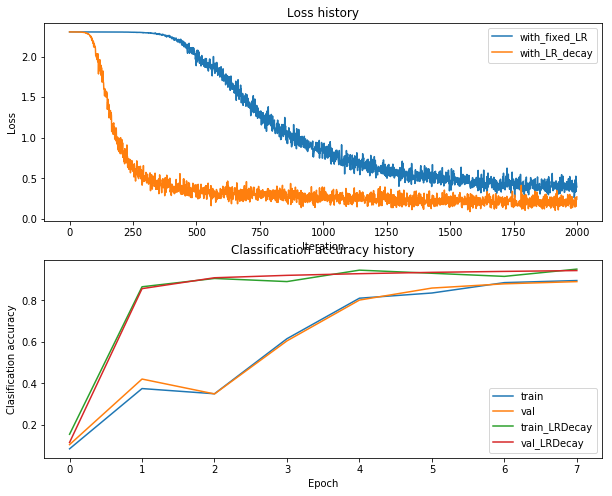

In [33]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'], label='with_fixed_LR')
plt.plot(stats_LRDecay['loss_history'], label='with_LR_decay')
plt.title('Loss history')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.plot(stats_LRDecay['train_acc_history'], label='train_LRDecay')
plt.plot(stats_LRDecay['val_acc_history'], label='val_LRDecay')
plt.title('Classification accuracy history')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

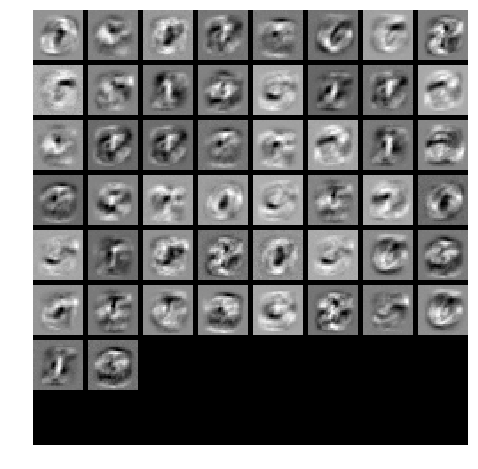

In [34]:
# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(28, 28, 1, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8').squeeze(axis=2))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 97.4% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on MNIST as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [169]:
best_net = None # store the best model into this 

#################################################################################
# TODO#8: Tune hyperparameters using the validation set. Store your best trained#
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
best_net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
best_net.train(X_train, y_train, X_val, y_val,
    num_iters=6000, batch_size=200,
    learning_rate=12e-3, learning_rate_decay=0.69,
    reg=0, verbose=True)

#################################################################################
#                               END OF TODO#8                                   #
#################################################################################

[[ 0.12661619  0.04711408  0.08815153 ...,  0.          0.          0.02985703]
 [ 0.02624889  0.11421796  0.03321006 ...,  0.0562664   0.          0.        ]
 [ 0.21491148  0.04338543  0.16595235 ...,  0.          0.          0.        ]
 ..., 
 [ 0.17333187  0.06222369  0.21227983 ...,  0.00289072  0.04008786  0.        ]
 [ 0.28199172  0.          0.         ...,  0.          0.          0.06376893]
 [ 0.          0.          0.         ...,  0.04175682  0.11099022  0.        ]]
iteration 0 / 6000: loss 2.302599
[[ 0.28297486  0.          0.         ...,  0.          0.          0.        ]
 [ 0.00561128  0.00703487  0.26361761 ...,  0.32645327  0.          0.        ]
 [ 0.          0.26523645  0.         ...,  0.05551715  0.09198059
   0.00044251]
 ..., 
 [ 0.          0.18194548  0.02406262 ...,  0.01880856  0.          0.02152574]
 [ 0.02516889  0.          0.06396281 ...,  0.07977497  0.          0.        ]
 [ 0.18602199  0.          0.         ...,  0.          0.          0

[[ 10.42063278   8.01047505   0.         ...,   0.           0.           0.        ]
 [  0.05066834   0.           0.17533537 ...,  15.98828997   0.           0.        ]
 [ 22.08637187   0.           0.         ...,   0.           0.
    9.31485873]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  3.85474655   5.10515671   8.17273201 ...,   8.7424297    9.59147606
   12.93230363]
 [  0.           0.           0.         ...,   0.          22.28878268
   45.14186733]]
[[ 20.75293064   0.           2.22805244 ...,   2.01441769   0.
    1.92381474]
 [ 27.65946324   0.           0.         ...,   0.           0.           0.        ]
 [  3.1297672    0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           6.59280276
    1.55678875]
 [  0.           0.           0.         ...,   2.48081416  17.71276296
    0.        ]
 [  0.           0.           6.47697211 ..

[[  4.18218904  21.75211753   0.         ...,   0.          15.85575434
    6.24674173]
 [  0.          19.25839771   0.         ...,   0.          26.36997001
   24.10362271]
 [  0.           0.           0.         ...,   2.88263979   7.84771601
   24.65170239]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 15.71231614   0.           0.         ...,   1.20815659   7.54994152
    0.75708172]
 [  0.           5.46673284   2.62516387 ...,   0.          59.66216295
   32.58473105]]
[[  4.19808783   0.           2.4250695  ...,  12.07597544   0.           0.        ]
 [  3.14387387   0.          22.90069079 ...,   0.           0.           0.        ]
 [  0.69219251   9.57321694   0.         ...,   0.           7.48885391
    0.        ]
 ..., 
 [  0.           0.          23.6212321  ...,   8.16290207   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.08819397   8.72467033

[[  7.65051497   0.          24.70274902 ...,   0.           0.           0.        ]
 [  2.24226169   0.           8.14380643 ...,  24.49337853  10.77193079
    9.74219718]
 [  0.           0.           0.         ...,   0.27900914   0.           0.        ]
 ..., 
 [  0.          32.52800827   0.         ...,   0.           0.
    1.73674885]
 [ 11.5910734    0.           0.         ...,   0.           0.
    5.00488483]
 [  0.           0.          28.04157442 ...,   5.99667593   7.9677497
    8.56089113]]
[[  0.           0.           0.80031643 ...,   1.29450266   0.           0.        ]
 [ 10.42531818   0.           0.         ...,   0.           9.09094797
    0.        ]
 [  0.           5.41483244  22.57427705 ...,   1.51124763   0.           0.        ]
 ..., 
 [  7.77754537   0.           9.54963654 ...,   0.52694533  40.03246046
    0.        ]
 [  0.          21.1661156    3.60508202 ...,   1.45663042  50.63014834
   15.42832029]
 [  5.96115379   0.           0.         .

[[  4.19447381   8.91132923   0.         ...,   0.          15.14656309
   96.36220949]
 [  0.           0.          30.1211069  ...,   3.94095084   0.           0.        ]
 [  0.          38.62553106   0.         ...,   0.          39.49475555
   64.70099395]
 ..., 
 [  5.31047592   0.           0.         ...,  20.15392823   0.
   15.00905232]
 [  0.           0.           0.         ...,   0.          37.55537802
    0.        ]
 [  0.          14.81954449   0.         ...,   0.           0.           0.        ]]
[[  2.20147517   0.           0.73935021 ...,  26.20262767   0.
   14.81809119]
 [  0.           3.3431813    0.         ...,   0.           0.           0.        ]
 [  0.94280467   0.          31.63789565 ...,   6.34272934   0.
   19.26006233]
 ..., 
 [  7.38653234   0.           0.         ...,   8.87215629   0.           0.        ]
 [  0.          31.88788082   0.         ...,   0.           1.70140577
    0.        ]
 [  1.62270398   0.           0.         ...,   0

[[  0.           0.           0.         ...,   0.          14.43398736
    0.        ]
 [  0.           0.          22.49822123 ...,   2.40642118   1.46218319
    1.25546112]
 [  0.           0.           0.         ...,   6.29638989   0.           0.        ]
 ..., 
 [  0.           0.           4.23593629 ...,   2.65565416   0.           0.        ]
 [  0.30818813   0.           0.         ...,   0.           0.           0.        ]
 [  3.52225389   0.          14.3624668  ...,  28.13593385   0.          12.8508485 ]]
[[  2.39881744   0.           0.         ...,  19.99290761  17.98704611
   65.44683995]
 [  0.           0.           0.         ...,   3.90540063   8.50873866
   14.35521001]
 [  0.          23.78598476   0.         ...,   0.           0.          55.18643   ]
 ..., 
 [  0.          35.97009572   0.         ...,   0.           0.
    6.54610007]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.40803976   0.           0.     

[[  0.           0.           9.97717126 ...,   0.           5.70559863
    0.        ]
 [  3.14231876   5.02202057  16.85796138 ...,   7.30266149   7.80903025
    5.37456996]
 [  0.           0.          17.17805637 ...,  38.79970239  11.0797373
   13.71363777]
 ..., 
 [  2.44848817   0.          13.02764482 ...,  38.46732659   0.
   20.36779987]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  5.35321172   0.           1.45682353 ...,  10.8496195    0.
   10.53550554]]
[[   8.68826396    0.            0.         ...,   27.68775656    0.
    28.91527652]
 [   0.           12.32794377    0.         ...,    2.75898811
     6.66195134    0.        ]
 [   0.            0.            0.         ...,    0.           22.89923835
   118.44022606]
 ..., 
 [   3.2523503    53.19776249    0.         ...,    0.           46.35370125
    17.65419873]
 [   0.           12.5808808     6.14049242 ...,    0.           65.84069357
   113.06177709]
 [  17.8223149

[[  5.17148422   0.           0.         ...,   0.           0.          11.7147055 ]
 [  0.           5.20147876   1.04982584 ...,   0.           0.           0.        ]
 [  0.           0.          14.42199863 ...,   1.61343327   0.
   10.83185765]
 ..., 
 [  0.           0.          33.35710651 ...,  11.0385689   76.79793356
    0.        ]
 [ 26.22936618  40.16868449   0.         ...,   0.           4.58598624
    3.10585435]
 [  0.          59.84344597   5.00478616 ...,   0.          66.01084651
   59.08505835]]
[[  5.09116203   0.           8.06437588 ...,  10.80128338  24.72330013
    0.        ]
 [ 14.7011778   39.04923998   0.         ...,   0.           5.17610439
    0.        ]
 [  4.8127111   14.87164607  14.47206329 ...,   0.          20.20382802
   54.91416067]
 ..., 
 [  3.69417498   0.           4.43211457 ...,   0.           0.           0.        ]
 [ 11.26034933   0.           0.         ...,   0.           0.           0.        ]
 [  5.07517967   4.83933766   0. 

[[ 13.51229653  12.11013058   0.         ...,   0.           0.           0.        ]
 [  0.06030938   0.           0.         ...,   0.           0.           0.        ]
 [ 22.63480644   0.           0.28994543 ...,   0.           0.
   29.45294183]
 ..., 
 [  7.77126676   0.           0.         ...,   5.48071814   0.           0.        ]
 [  0.           0.           1.08754893 ...,   0.           0.           0.        ]
 [  4.63443548  18.1500277   15.92674038 ...,   0.          48.02481894
   13.72238024]]
[[  0.           0.          45.83553117 ...,  15.73871184   0.          48.9381145 ]
 [  1.72108332   0.           0.82351161 ...,   0.           0.           0.        ]
 [  4.59403688   0.           0.         ...,   0.           5.14975262
    0.        ]
 ..., 
 [  7.55062299   0.           3.3278998  ...,  25.62341749   0.
   28.98864762]
 [  2.13953162   0.           0.         ...,   0.           0.           0.        ]
 [  0.21658176  54.01622094   0.         ...,  

[[  23.64509571    0.            2.04698793 ...,   13.55405096
    15.75154472    3.0303986 ]
 [   0.            0.            5.39058341 ...,   15.60943937    0.            0.        ]
 [  16.54615481   18.98743466    0.         ...,    0.           20.20304224
     0.        ]
 ..., 
 [   2.52647437   14.35301986    0.         ...,    1.76211029
     1.55859536    2.50539931]
 [   0.           35.97180066   16.24328624 ...,    0.           17.2850519
   103.11849381]
 [   0.           19.04827841    0.         ...,    0.            0.
    38.99581989]]
[[  0.           0.          25.81206599 ...,  33.07622301   6.09243879
   13.65844802]
 [ 10.52597989   0.           0.         ...,   0.42725385   8.0465855    0.        ]
 [  0.          11.82996498   0.         ...,   0.           0.           0.        ]
 ..., 
 [  2.04462295   5.59539942   8.39713208 ...,  14.46480718   0.           0.        ]
 [ 16.84890217  15.43816042   2.19888915 ...,   0.           9.2061748
   35.17943487]

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 16.32895004  38.4107247    0.         ...,   0.          59.41485045
    0.        ]
 [  2.37050801   0.           0.         ...,   0.          17.81291979
    0.        ]
 ..., 
 [  8.78218994  10.39418947  43.1030261  ...,  12.49835942  24.50706072
   25.14850219]
 [  7.8051267    0.           9.64364831 ...,  19.68058653   6.22116278
   13.64565076]
 [  0.17752085   0.           0.         ...,   0.          13.39989893
    0.81663537]]
[[  0.          25.86647194   0.         ...,   0.           0.
   68.15606024]
 [ 34.37669712   0.           0.         ...,   0.           0.           0.        ]
 [  0.          12.63695886  41.76005008 ...,   3.69735799  74.37302566
   14.15896126]
 ..., 
 [  0.           9.48098987   0.         ...,   0.           0.           0.        ]
 [  0.70703497   1.40703235   8.62146829 ...,   0.           0.           0.        ]
 [  0.62668633   0.          17.4

[[  0.          21.08414722   0.         ...,   0.24550731   0.           0.        ]
 [  8.63840564  26.62951343   0.         ...,   0.           0.
   25.46816227]
 [  0.           0.           0.         ...,   1.8383373    0.           0.        ]
 ..., 
 [ 14.27585471   0.           0.         ...,   0.          13.82150114
   23.6636008 ]
 [  0.93010303   0.           0.         ...,   0.           0.
   12.37349409]
 [  0.           0.          48.75596649 ...,  15.9606031    0.
   14.54147396]]
[[  0.           0.           0.         ...,   1.0641646    0.           0.        ]
 [  0.          37.79041566   0.         ...,   0.           0.
   25.34487025]
 [  0.          25.03301891   0.         ...,   0.           7.2698984
   32.78977838]
 ..., 
 [  0.          16.82893797   0.         ...,   0.           0.           0.        ]
 [  0.          13.17993478  47.16083756 ...,   6.39767578  61.58231859
   54.92254967]
 [  0.           0.          40.54849086 ...,  50.63190511

[[  0.          12.31663301  13.44117011 ...,   0.          46.36302837
   42.61450409]
 [  0.           0.          40.09487494 ...,   7.51525639   0.
    0.31430512]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  7.08466954   0.          11.35512984 ...,   0.           0.           0.        ]
 [  2.61633315  45.88136491  19.21556499 ...,   8.32937661  44.25998388
    0.        ]
 [ 15.31181932   6.51352568   0.         ...,   0.           9.03259938
   55.33095038]]
[[   6.8870821     8.99706914    0.         ...,    3.38911072    0.
    16.2841009 ]
 [   8.5327313     0.            0.         ...,    0.            0.
    13.4476325 ]
 [   9.89573696    0.           16.80739532 ...,    0.            0.21328215
   101.07986935]
 ..., 
 [   3.53896061   62.54305344    1.48651057 ...,    0.            0.74266406
     0.        ]
 [   0.            0.            0.         ...,    4.88477907    0.            0.        ]
 [  14.39302707  

[[  4.1865293    1.13731802   0.         ...,   1.98673219   0.           0.        ]
 [  3.2743245    0.          11.63422347 ...,  26.84365302  17.98919417
    0.        ]
 [ 10.6113014    0.           0.         ...,   8.34326605   0.
   15.10885159]
 ..., 
 [ 15.42472809  34.79796095   0.         ...,   0.           2.05142472
    0.        ]
 [  0.           0.          30.86190022 ...,  40.39914298  11.43529297
    0.        ]
 [ 20.55523306  20.75866634   0.         ...,   0.           2.71344324
   12.1992489 ]]
[[  9.75250206   0.           0.         ...,   2.5233481    0.
   28.84223102]
 [ 11.19286645  16.43390991   0.         ...,   0.          46.71056565
   15.59103613]
 [  0.          16.8995124    0.         ...,   0.           0.           0.        ]
 ..., 
 [ 12.64711736   0.           1.7828188  ...,  25.31396836   0.
   18.93526742]
 [ 15.26174236   0.           0.         ...,   0.          18.56879915
    5.52496315]
 [  0.          89.81545948   0.         ...,

[[  0.          11.52601919   0.         ...,   0.           0.           0.        ]
 [  0.          26.9236212    0.         ...,   0.           0.           0.        ]
 [  4.28451566   0.           0.         ...,  25.07248628   0.
   17.83379229]
 ..., 
 [  2.9825671    5.22120207   0.         ...,   0.           0.           8.8521377 ]
 [  0.           0.          16.69029732 ...,   0.          48.60088673
   39.97206225]
 [  0.71991774   0.          26.78571321 ...,  25.17853046   0.
    4.30592985]]
[[  0.           0.          21.70762802 ...,  30.1527015   12.45781451
    2.42579343]
 [ 22.9103333   31.92516328   0.         ...,   0.           0.           0.        ]
 [  0.           0.           3.43634205 ...,   0.           0.           0.        ]
 ..., 
 [  6.53636737  54.14662739   8.28741357 ...,   0.          48.89320252
   12.48406637]
 [  0.          14.03229825   0.         ...,   0.           0.           0.        ]
 [ 10.46730879  39.97505533   0.         ...,

[[  6.91942731  29.0917446   32.69292206 ...,   1.59953209  12.70517713
   48.98624101]
 [  0.           0.           2.93624101 ...,   1.77339107   0.           0.        ]
 [ 15.21559691  63.10760867   2.30179893 ...,   0.          71.2251544
   21.42935707]
 ..., 
 [ 16.60837358  53.41606147   0.         ...,   0.           0.
   15.18993853]
 [  0.          59.23151168   0.         ...,   0.           0.           0.        ]
 [  0.          23.88742999   0.         ...,   9.318842     0.           0.        ]]
[[  0.          39.7572822    0.         ...,   0.           0.           0.        ]
 [  0.          48.86932257  10.83565629 ...,   0.          64.01932952
   81.48005248]
 [  6.84309281   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          54.42817254 ...,  24.80143574   0.
   10.63611623]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  9.21829112   0.           0.         ..., 

[[  5.32832818   5.59676253   0.         ...,   0.          79.92180772
   73.63422615]
 [  0.          24.68675133   2.79128772 ...,   0.          62.34191286
   59.65660069]
 [  0.           0.          10.27521852 ...,  27.90659498   0.
   13.65647872]
 ..., 
 [ 42.67398399   0.          18.42923611 ...,   0.           0.           0.        ]
 [  0.          71.52674709  23.31708164 ...,  10.35065059  64.71582353
   68.61959187]
 [  0.1512208   46.49443583   0.         ...,   1.46734087   0.           0.        ]]
[[  7.71300142  33.08723964   0.         ...,   8.68296275   0.
   14.98459532]
 [  0.          26.39627755  22.26242401 ...,   0.          69.23446826
   43.43292866]
 [  0.          23.563279     0.         ...,   1.44952284   4.26077813
   10.55760797]
 ..., 
 [ 11.61365436   0.           0.         ...,   0.           0.
   26.52715625]
 [  2.54915833   0.          14.49634627 ...,  31.74474887   0.           0.        ]
 [  1.58371139  76.00756084   0.         ...,  

    1.28579449e+00   0.00000000e+00]]
[[  7.40038584   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          25.69849808 ...,  37.3138954    4.23263164
   15.00020574]
 [ 16.21919292   6.71783679   7.04017446 ...,   0.          34.90479008
   52.27203212]
 ..., 
 [  3.29142987   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   8.7628218    0.          38.5628183 ]
 [  0.           0.           0.         ...,   0.           0.
    2.85099737]]
[[ 19.76863233  58.69016998   0.         ...,   0.           4.59267996
   17.18039044]
 [ 14.2946896   93.24452031   0.         ...,   0.          52.86812039
   12.15108573]
 [  0.          88.294701     0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          11.11698666   0.         ...,   6.7694567    0.           0.        ]
 [  0.           9.535266     0.         ...,   0.           1.70792982
    0.       

[[  6.33767816   0.          49.65927751 ...,  30.67318484   0.           0.        ]
 [  0.           6.42378441   0.         ...,   1.1994658    0.           0.        ]
 [ 15.63387462   7.99802531   0.         ...,   0.           7.03991675
    0.        ]
 ..., 
 [  0.           0.          33.37831872 ...,  38.72924502  11.40355665
   15.23818577]
 [ 13.97014768   0.           9.17572035 ...,   0.88924336   0.
   18.89024377]
 [ 11.20720783   0.           0.         ...,   9.73045361   0.           0.        ]]
[[ 14.84628963   0.           2.6420519  ...,   0.           8.89908304
    0.        ]
 [  3.34015832  14.23329074   1.22880096 ...,   2.85133249  20.43865474
    0.        ]
 [  0.           0.          31.57003574 ...,   2.58531471   0.
   28.21909703]
 ..., 
 [  0.           0.           0.         ...,  18.28814255   0.           0.        ]
 [  0.           0.          17.79341539 ...,  19.67029184   0.           0.        ]
 [  0.58592346   0.          72.69854996 ..

[[  4.80822924   0.           0.         ...,   0.           0.
   12.45237366]
 [  0.70082196  45.67166961   0.         ...,   0.           4.71813589
   44.9650779 ]
 [ 14.76298038   0.          32.73487422 ...,  23.53300936  16.15301278
   39.66374312]
 ..., 
 [ 32.85487823  34.52953951   0.         ...,   0.          23.71832689
    0.        ]
 [  0.           0.          39.63077399 ...,   0.06579714   0.           7.0449498 ]
 [  9.09246072   0.           0.         ...,   0.           0.
   25.43835014]]
[[  0.          10.74043771   0.         ...,   0.          40.8444434
   23.4733201 ]
 [ 12.9136451    0.           0.         ...,   0.          28.3558681
   11.37744219]
 [ 18.29115028  54.49607653  35.63304588 ...,   6.34280749  58.17166902
    0.        ]
 ..., 
 [  0.          39.60285129   0.         ...,   0.          26.498096     0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         

[[  0.           0.           0.         ...,  10.05736411   0.           3.8199754 ]
 [ 15.05183456  31.59402496   0.         ...,   0.          60.91478201
   69.410372  ]
 [  0.          16.29932664  37.05503565 ...,   0.          49.69399105
    0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.
    3.79018468]
 [  0.           8.10818572  16.5940627  ...,  13.29255548   0.           0.        ]
 [ 10.19327288  11.75701332   0.         ...,   0.           0.           0.        ]]
[[ 11.2219217    0.           0.         ...,   0.          31.14888376
    0.        ]
 [  0.           0.          47.41148943 ...,   0.          48.48010839
    0.        ]
 [ 13.54396766  10.12664134  36.65501298 ...,  21.93360403   3.79520687
   18.15012364]
 ..., 
 [  0.           0.36570032   0.         ...,   0.           8.60142638
    0.        ]
 [ 12.86615045   0.          13.41785968 ...,   0.           0.           0.        ]
 [ 15.08183969  36.30161542   0. 

[[  0.          59.73453422   0.         ...,   0.           0.           0.        ]
 [  0.          14.44244791   0.         ...,   0.          42.09821623
    0.        ]
 [  0.           0.          16.01618139 ...,   0.           4.65956782
    0.        ]
 ..., 
 [  8.08030539   0.          98.19409985 ...,  44.21499251   0.
   11.99316095]
 [  0.           2.61409609   2.49242832 ...,   9.29903607   0.           0.        ]
 [ 16.78483048   4.38128511   0.         ...,   0.          22.68847923
    6.10181491]]
[[ 18.45882443   0.           6.96002636 ...,   4.99065711   0.           0.        ]
 [  0.           6.87824718  67.98632402 ...,   2.03321703  74.66809129
   79.97517121]
 [ 14.34091798  68.68847668   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           8.66917867   0.         ...,   0.           0.           0.        ]
 [ 26.72632133   0.           0.         ...,   2.22585548   0.           0.        ]
 [  0.          67.92093223   0.     

[[ 21.07239976  65.46140548   9.2903994  ...,   0.          74.99654344
   65.80438947]
 [ 15.39611282   0.           0.         ...,   0.           0.52594256
    3.91888523]
 [  5.31214479  75.84927546  23.73877882 ...,   0.          43.15856559
    0.        ]
 ..., 
 [  6.0038007    0.           0.         ...,   0.           0.
   29.48016924]
 [  1.63177803   0.           0.         ...,   4.69975721   0.           0.        ]
 [  0.           1.49969505   0.         ...,   0.           0.           0.        ]]
[[  0.          37.52890272   0.         ...,   0.          33.89822107
   14.00360754]
 [  0.           0.          59.402952   ...,   3.86935541  52.39440589
   47.78825128]
 [  0.           0.           0.         ...,   8.64621974   0.           0.        ]
 ..., 
 [  4.59145548   0.           0.         ...,   0.           1.67101315
    0.        ]
 [  0.           0.           0.         ...,   0.           8.11789656
    0.        ]
 [  0.           0.          52

[[  0.           0.           0.         ...,   0.          27.6099934    0.        ]
 [  0.           3.17095302  15.05549276 ...,  12.41678475  28.17279012
    0.        ]
 [  0.          57.37044932  22.29683435 ...,   2.34876197  41.93200431
   32.2252199 ]
 ..., 
 [  0.56191825   0.          15.45716719 ...,  15.31474911   0.          13.208234  ]
 [  7.28366197   2.2856876    0.         ...,   1.62408689   0.           0.        ]
 [  7.47608441  80.86666812   0.         ...,   0.          57.35714336
   15.06597556]]
[[  8.35193962   0.           0.         ...,   0.           0.           0.        ]
 [ 10.52062496  76.17462383  27.89489189 ...,   0.          61.15152097
    0.        ]
 [ 18.06162904   0.          10.20892105 ...,  28.4350155    3.51167369
    3.78595657]
 ..., 
 [  0.           0.          64.12153107 ...,  24.96850106   0.           0.        ]
 [  0.          20.68126943  18.15563574 ...,  16.20768578   0.           0.        ]
 [  0.           0.          

[[  0.          96.81887465  34.67283457 ...,  11.23985511  52.4018621
   78.21658736]
 [  0.8949765    0.          16.61733351 ...,   0.          21.60629475
    0.        ]
 [  0.           2.25940154  58.38880435 ...,   7.84698749  63.84590999
    0.        ]
 ..., 
 [ 20.96362678   0.           0.         ...,   9.34724961  14.57129424
    3.62738232]
 [  4.80696165   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.57900825   0.         ...,   0.           6.23901916
    0.        ]]
[[  0.           0.           0.         ...,   0.          53.90193732
   72.73904793]
 [  0.           0.           5.40755103 ...,   0.64689786   0.           0.        ]
 [  0.           0.          27.59641703 ...,  35.65534494   0.
   24.54089261]
 ..., 
 [  0.           0.           0.         ...,   1.91739164   0.           0.        ]
 [  0.          47.67090299   0.         ...,   0.           0.
    9.05031106]
 [ 36.94181494  14.75423291   0.        

[[  0.           0.           1.79220096 ...,   0.           0.
   41.06058229]
 [  2.74223104   0.          45.43966222 ...,  25.04776362   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.
   13.63442342]
 ..., 
 [  9.47195525  72.05396786   0.         ...,   0.           0.
    0.66787696]
 [  0.5768766    0.          19.61640249 ...,   0.           0.           0.        ]
 [  9.75584626  76.66243166   0.         ...,   0.           0.
    3.28503568]]
[[  7.14508019  66.79224506  31.20930671 ...,   7.84984481  65.12839175
   46.3906566 ]
 [  0.           0.58857648   0.         ...,   0.           0.           0.        ]
 [  3.36792243   0.           0.         ...,   0.           5.16499249
    0.        ]
 ..., 
 [  6.71130486  63.85436026   0.         ...,   0.          61.56030434
    0.        ]
 [  0.          12.19451064  27.02444175 ...,   0.          56.03422859
   31.14252318]
 [ 42.9507782    0.           0.         ...,   0.     

[[  0.           0.           0.         ...,   0.           6.69581634
    0.8168685 ]
 [  0.           0.           0.         ...,   4.93489328   0.
    4.45259602]
 [  0.           0.          39.36992873 ...,  49.60318015  30.97121456
    2.83507269]
 ..., 
 [ 19.48389471   0.           0.         ...,   0.           0.
    7.94294217]
 [  0.           0.           0.10272768 ...,   8.16554847   0.
   42.00391307]
 [  5.40993146   0.          33.65528274 ...,   9.43714862  60.04024982
   11.93156812]]
[[ 12.31628256   0.          39.9454257  ...,   3.3417043    7.58428263
    0.        ]
 [  0.           0.          23.74661133 ...,  14.41253979   0.           0.        ]
 [ 16.95702384   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 10.73465669   0.           0.         ...,   0.           0.           0.        ]
 [  6.18752474   0.           0.         ...,   1

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          60.09907941 ...,   4.37732503  51.93042642
   50.37965212]
 [  2.42684806   3.87737213   5.68550836 ...,   2.87460611   0.           0.        ]
 ..., 
 [  0.32553944   0.           5.25652308 ...,   0.           0.           0.        ]
 [ 19.42982923   0.           0.27495772 ...,   3.8439225    0.           0.        ]
 [  0.          18.27469481   0.         ...,   3.36427927   0.           0.        ]]
[[  0.          13.18016387   2.85609869 ...,   5.59256509   0.           0.        ]
 [  0.32544045  73.72230769  14.23982959 ...,   4.21165525   7.35391343
   62.37435572]
 [ 18.97713953   0.           5.5319007  ...,  17.92417106   0.          79.6311954 ]
 ..., 
 [  0.           0.          19.68852313 ...,   0.          46.27924202
    0.        ]
 [  0.           0.          36.98966253 ...,  51.44026581  30.85975914
    5.38847803]
 [  9.07200073  11.95555095   0

[[   0.            0.           59.03113706 ...,   17.74828697    0.
    25.93405793]
 [  16.96468194    0.            0.         ...,    0.          105.60563476
     0.        ]
 [   9.91690016   87.26608806    0.17227046 ...,    1.69178354
    60.83687119   20.60001366]
 ..., 
 [   4.5481998     0.           66.21609395 ...,   11.02756071    0.
    28.14482055]
 [  25.89478098    9.98724578    0.         ...,    0.            1.80929391
     0.        ]
 [   3.17781212    9.96985835   31.20575805 ...,    1.94961376
    52.64381807    0.        ]]
[[  0.50164095   0.           0.         ...,   0.           0.           0.        ]
 [  0.          26.96979417   0.         ...,   0.           0.
   66.89867321]
 [  0.           8.9041314    0.         ...,   5.96686737   0.           0.        ]
 ..., 
 [ 12.54511042  65.89273715  43.50647912 ...,   9.49610006  41.87433669
    1.51980109]
 [  0.           0.           0.         ...,   0.           6.60981185
    0.37514962]
 [ 10.113

 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 17.0274967    0.          15.37497922 ...,   0.          51.20196397
   27.2062278 ]
 [  3.54812665   0.          10.2987562  ...,   0.          76.61765412
    0.        ]
 [  9.10146955  40.91130876  31.45131807 ...,   0.          45.13219863
    3.55997215]
 ..., 
 [  0.          38.03776201  37.58076044 ...,   0.          32.74079312
   42.50181826]
 [  2.10507693   0.           0.         ...,   5.91074439   0.          31.3121814 ]
 [  0.           0.           0.         ...,   0.           0.
    5.14053232]]
[[ 43.31598929  24.97756498   0.         ...,   0.          25.46445052
   12.18212649]
 [  2.40282001   0.           0.         ...,  11.83015696  14.51075395
    0.        ]
 [  0.           5.81990304   0.         ...,   0.          27.56088648
   56.96266439]
 ..., 
 [  1.18356589   0.           2.76129805 ...,   0.          50.20385238
   19.56231172]
 [ 11.40473123   0.         

[[  0.46861695   8.94983672  18.72769009 ...,   0.          45.76403001
    0.        ]
 [ 17.57370034  15.00148954  41.80769427 ...,  19.94975066  48.26404529
   27.53742653]
 [ 15.1232467   12.65571604   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           7.84147724 ...,   0.          20.40764181
    2.11200016]
 [  9.72880265   0.           0.         ...,   0.           1.29345284
    3.60008185]]
[[  0.           0.          12.54655574 ...,  12.99206642   0.           0.        ]
 [  0.           0.           0.46575415 ...,   0.           0.
    1.09389975]
 [  0.          63.01411115   0.         ...,   4.83225341   0.91656191
    0.        ]
 ..., 
 [  0.           0.          40.03977957 ...,   2.11146538   0.
   25.43710861]
 [  0.           0.          25.31150247 ...,  33.8693511    0.
   21.64380765]
 [ 12.81351954   0.           0.         ...,  

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  9.67837713  20.8833244    0.         ...,   0.           0.           0.        ]
 [  8.62905954  16.81775945  32.8841356  ...,   0.          38.87861056
    0.        ]
 ..., 
 [  0.          68.99512401  36.04285767 ...,   9.97582035  54.09443798
   52.92019636]
 [  0.           0.          30.14656948 ...,  21.21103194   0.
    3.50482536]
 [  0.          25.18113094   0.         ...,   0.           0.
   56.54264279]]
[[   0.            0.            0.         ...,    0.            0.
    55.85985325]
 [   0.           30.436616      0.         ...,    0.            0.            0.        ]
 [   0.            0.           43.38565455 ...,   48.28550327    0.
    21.12302766]
 ..., 
 [   0.           78.51219572    0.         ...,    0.           53.64298007
    80.55162172]
 [   0.           23.03950904    2.80654741 ...,    0.69282356
    61.91966375  120.1541707 ]
 [   5.13362951    0.    

[[  0.           0.           8.21238984 ...,  11.74939749   0.
   62.89167659]
 [  1.2753153    0.           0.         ...,   4.63197867   0.
   22.44199272]
 [ 52.24613047   0.           0.         ...,  10.9451742    0.
   25.93208235]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 11.04314231   0.13808122  13.60457766 ...,   5.61459065   0.           0.        ]
 [  0.          37.24255847   0.         ...,   0.           0.           0.        ]]
[[  0.           0.          14.48735348 ...,   0.           0.
   32.05978629]
 [ 11.35014968  23.57919038   0.         ...,   0.          20.02562398
    7.77469454]
 [ 16.96874075  13.65786804   0.         ...,   0.          36.34085314
    0.        ]
 ..., 
 [  6.52729979   0.           0.         ...,   0.           0.
   34.11623999]
 [ 10.78647531   0.           0.         ...,   3.19942744   0.           0.        ]
 [  0.           0.14073323   0.         ...,   0.93046647   0.  

[[ 20.90717828   0.           0.         ...,   0.          14.15436276
   18.84301576]
 [  0.          15.58926372   0.         ...,   0.           0.
    9.13239128]
 [  6.48384146  87.64245701  29.73504475 ...,  12.84179921  75.89285816
   36.34131162]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  4.34902245   0.           0.         ...,   0.          44.08037937
   16.98735147]
 [  0.           8.8318553    0.         ...,   8.05870555   0.           0.        ]]
[[  0.           0.          36.33429702 ...,  40.63664289  26.85360372
   10.12046859]
 [  0.          50.23738363   0.         ...,   0.          64.06686472
   74.573051  ]
 [  9.15931804  23.49853985   4.2649601  ...,   0.          15.71928709
   22.59792287]
 ..., 
 [  1.03063856   0.           6.36318661 ...,   0.          14.56368306
    0.        ]
 [ 14.06279317   0.           2.09264242 ...,   0.           0.           0.        ]
 [ 25.78445878   7.49600517   0

[[ 10.85795762   0.           0.         ...,   9.35154602  40.34044792
    4.29171039]
 [  8.88233193   0.          13.71660453 ...,  13.12231287   0.           0.        ]
 [  0.           0.          75.79558903 ...,  19.41928883   0.
   16.21699297]
 ..., 
 [  4.86091341   0.           0.         ...,   3.40012495   0.          41.6492324 ]
 [  7.44486497  34.56718904  19.89855391 ...,   0.           4.45659302
   71.48701102]
 [  4.11507033   2.84037081   4.9671335  ...,   2.12429071   0.           0.        ]]
[[   5.17051249    7.84135138   17.86102752 ...,    0.            0.            0.        ]
 [   6.35868264    0.            0.         ...,    1.88001896    0.            0.        ]
 [  12.92723446   66.45715297   44.66251828 ...,   11.57087013
   108.94759559   45.55830288]
 ..., 
 [   7.31410373    2.03671684    0.         ...,    0.            0.
     5.16081937]
 [  22.72497899    0.           31.51505708 ...,   12.11180248
    24.02064611    6.59229941]
 [   2.876489

[[  0.           0.           0.         ...,   0.           0.
    0.52487147]
 [  0.           0.          61.59567264 ...,  10.11744471  86.49372859
    6.90730545]
 [ 10.15904606   0.           0.         ...,   0.          19.38195094
    0.        ]
 ..., 
 [  0.          40.31495437  46.18232748 ...,  17.14828604  35.8176759
   36.40614832]
 [  0.          46.91069905  32.43389986 ...,  23.43549017  20.95924404
   74.31252647]
 [  0.          23.44638651   0.         ...,   0.           0.           0.        ]]
[[  0.           0.          38.90266854 ...,   0.          53.63806806
    2.25475591]
 [  0.          53.77742717   1.76018719 ...,   0.           0.
   73.18826042]
 [ 37.25504351  25.2097253   16.80466987 ...,   1.40017274  49.06022278
   65.08980582]
 ..., 
 [  0.           0.           0.         ...,   5.53300724   6.57684964
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 21.8869743    0.           0.      

[[  2.14453915   0.           1.86638996 ...,   1.37615441  13.44456105
    0.        ]
 [  6.95793325   0.           0.         ...,   0.           0.           0.        ]
 [  9.81164987   0.          19.17027688 ...,   0.           0.           0.        ]
 ..., 
 [  4.21760679   0.           0.         ...,   0.           0.
   33.80473299]
 [ 38.1769457    0.           0.         ...,   0.           3.24751869
    0.        ]
 [ 10.58183209  71.67573739   4.20785326 ...,   0.          70.93084972
   32.57177892]]
[[ 20.2407569   20.08665483   0.         ...,   0.           9.70453352
    0.        ]
 [  0.           0.           0.         ...,   0.          15.73264675
    0.        ]
 [  0.           0.          71.0053488  ...,  41.10098292   0.           0.        ]
 ..., 
 [ 19.17657485  15.80219293  72.29518748 ...,  33.07652756  36.59494347
   44.00383046]
 [  5.63032669   0.          18.70706931 ...,   0.          25.59744051
   11.80812345]
 [  7.44085684  90.25737071   0

[[  5.86965221   0.          45.72385651 ...,   0.          61.3162039    0.        ]
 [  0.           0.           0.         ...,   0.           0.
    8.74076121]
 [  0.           0.           0.         ...,   1.03442784   0.           0.        ]
 ..., 
 [  7.9432594    0.           0.         ...,   0.          14.62995728
    0.        ]
 [  7.24325151   0.           0.         ...,   0.           0.
    7.45524565]
 [  0.35690749   0.          59.5749575  ...,  18.1144801    0.
   48.08611504]]
[[  0.50494601   1.5588477   28.86357517 ...,  12.41966153   0.
    1.65150414]
 [  0.          39.0698371   28.9701504  ...,   4.86626813  55.65787571
    0.        ]
 [  0.          76.1308147    0.         ...,  11.70966125   0.           0.        ]
 ..., 
 [  0.           1.83714971   0.93764861 ...,   5.13426964   9.64459372
    0.        ]
 [ 17.40075269   0.           0.         ...,   0.          54.53636016
   11.4318103 ]
 [  0.           0.          47.19686153 ...,  55.42798

 [ 11.45953454   0.           0.         ...,   0.           0.           0.        ]]
[[  5.05428738   0.          10.61260322 ...,   0.           0.           0.        ]
 [  0.           0.          17.81705237 ...,  22.3556412    0.
   13.77281069]
 [  0.           0.           0.         ...,   5.85517038   0.           0.        ]
 ..., 
 [  0.           0.           2.46388413 ...,   2.55242944  10.47821858
    0.        ]
 [ 46.09902365   2.72985052   0.         ...,   0.          24.12314562
    5.77318286]
 [ 44.56969058   0.           0.         ...,   0.           0.           0.        ]]
[[ 16.31160533   2.8992782   17.61798994 ...,   0.          17.36699421
    0.        ]
 [  0.           0.           0.         ...,   4.528211     5.66538502
    0.        ]
 [ 11.83099036   0.          24.90520809 ...,  21.34472573   0.           0.        ]
 ..., 
 [ 26.40442693   0.           0.0891878  ...,   0.           0.           0.        ]
 [ 20.18811903  59.95588297  26.5366

[[  0.           0.          32.08210342 ...,  17.38862272   0.           0.        ]
 [ 11.46581136   0.          55.74630527 ...,   0.          21.95736345
   12.48329928]
 [ 23.36773654   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 20.58847667   0.          15.51932421 ...,   5.99757945   0.
   67.09672025]
 [ 24.75758441   0.          29.85489843 ...,   0.          14.26379142
    0.        ]
 [  0.           9.54921981   0.         ...,   5.4558232    0.           0.        ]]
[[ 15.93396232   0.           0.         ...,   0.           0.
   13.21091845]
 [  0.           0.          46.8276876  ...,  27.07211404   2.88908958
    6.01632099]
 [ 16.86939272   2.90056802   0.         ...,   5.06231512   0.           0.        ]
 ..., 
 [  0.          61.69770238  20.73085916 ...,   6.84314456  17.14165378
   71.04343045]
 [  0.           0.          12.65431005 ...,   0.96267448   0.
   27.12243517]
 [  0.           0.          17.5966406  ...,   8

[[  0.           0.           0.         ...,   0.          38.57756344
    0.        ]
 [  6.09518473   9.96780572   0.         ...,   0.           0.
   22.16453426]
 [  9.95703055  25.07901775   0.         ...,   1.46696673   3.7768603
    4.00964274]
 ..., 
 [  0.          36.48775162   0.         ...,  11.59391529   7.70927625
    5.0464786 ]
 [ 15.54603892   0.           0.         ...,   0.           0.          48.1606664 ]
 [  1.72860895   0.           0.         ...,   6.79811136   0.           0.        ]]
[[  11.82785006    0.           11.42158306 ...,    0.            0.            0.        ]
 [   0.            0.           27.52885518 ...,    0.          109.66566895
    24.06506183]
 [   0.            0.           47.09904483 ...,   13.6837087     0.
    55.98253154]
 ..., 
 [   0.           43.10051089    0.         ...,    1.07178939    0.
     2.39292912]
 [   4.85570372    6.32916151    0.         ...,    0.            0.            0.        ]
 [   0.            0

[[   2.95949097   75.96796888   23.43050653 ...,    0.          104.55443435
     0.        ]
 [   0.41349778    0.           13.86435388 ...,   20.97542617    0.
    14.61102817]
 [   0.            0.            0.         ...,    0.            2.31972848
     0.        ]
 ..., 
 [   0.            0.           44.10512028 ...,   29.05896984
    75.64457651   25.68923269]
 [   0.           75.03427788    0.         ...,    0.            8.41976089
    18.17540401]
 [   1.51680026    0.           47.77327126 ...,    7.04716434
   122.07344871   36.19215278]]
[[   2.27090962    0.            0.         ...,    0.            0.
    40.2878849 ]
 [   0.            0.            6.75952936 ...,   14.83284101
    28.04546162   13.84769345]
 [   0.           36.38352009    8.58037235 ...,   32.77340463    0.
    24.0153245 ]
 ..., 
 [  13.57047891    0.            0.         ...,    0.           38.96897556
    10.31561151]
 [  13.60345212    0.           56.49324797 ...,    3.4098977    44.8

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 29.5142746    0.           0.         ...,   0.           0.           0.        ]
 [  6.54984446   7.08021706   0.         ...,  10.51752654   0.           0.        ]
 ..., 
 [  0.           0.           9.71175296 ...,   0.          24.52870303
    0.        ]
 [  0.           0.           0.         ...,   0.          55.30051161
    0.        ]
 [  0.          31.89244818   0.         ...,  13.07655784   0.
   83.70951611]]
[[  0.00000000e+00   7.58911413e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.34485554e+01 ...,   4.07368826e+01
    0.00000000e+00   4.21373265e+01]
 [  1.33685522e+00   1.09277597e+02   1.39551931e+01 ...,   0.00000000e+00
    7.59082497e+01   5.65700534e+00]
 ..., 
 [  6.42305344e+00   7.15021935e-02   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.86789835e+01   0.

[[  0.           5.72065495  11.01253475 ...,   0.          37.69047502
   17.81867461]
 [  0.          19.97820894   0.         ...,   0.           0.           0.        ]
 [ 10.98279527  44.45481395  11.80364385 ...,   0.          38.63854261
   26.72838258]
 ..., 
 [  0.           0.           0.         ...,   0.          60.89821765
   14.29190404]
 [ 13.45322551   0.           0.         ...,   0.           0.           0.        ]
 [  0.          22.99450884  10.177164   ...,   0.          34.04560548
   61.358282  ]]
[[  0.           0.           1.5695104  ...,  18.13920054   0.
   38.91105838]
 [  5.96060016  58.86022716   0.         ...,   0.           6.48439834
   30.17135616]
 [  0.          13.5836316   26.16784437 ...,  27.1373082    0.
   12.63414454]
 ..., 
 [  0.           0.          19.47884709 ...,  23.93514376  11.18203534
    0.        ]
 [  7.61250368   5.15216585   0.         ...,   0.           0.
   36.09093833]
 [  3.96917483   0.           0.         ...,

[[  0.           0.          22.15208369 ...,   1.50708649   0.
   25.71704264]
 [  0.          68.9864472    0.         ...,   0.           0.           0.        ]
 [  4.83833033   2.41262781  42.64294583 ...,  16.76048276   0.           0.        ]
 ..., 
 [  0.          28.26674256   0.         ...,   0.           0.
   13.91213179]
 [  5.02887087   0.           0.         ...,   0.           0.           0.        ]
 [  9.37796074  72.85599308   0.         ...,   0.          41.45502163
    0.        ]]
[[  7.37260586e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.88250311e+01   0.00000000e+00   5.81081389e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   7.57197665e+01   1.03752464e+00 ...,   0.00000000e+00
    0.00000000e+00   5.34300459e+01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   8.85836422e-01 ...,   0.00000000e+00
    2.42499104e+01   6.16812616e+00]
 [  2.15976682e+01   9.23922115

[[  0.          83.55319873  10.63040459 ...,   0.          20.76129067
    0.        ]
 [  0.           0.          24.42046049 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          56.12317094
    0.        ]
 ..., 
 [  0.          28.19261943   0.         ...,   0.           0.
   42.38088684]
 [  9.03155833  37.63991152  29.62694897 ...,   3.89343188  14.037543
   30.85036892]
 [  0.           0.           0.         ...,   6.59773311   0.           0.        ]]
[[  0.           0.           0.         ...,   0.          11.11083424
    0.        ]
 [  0.           2.86030817  30.53168709 ...,  39.70751469  22.07989137
    0.        ]
 [  0.           0.           0.         ...,   7.83677281   0.           0.        ]
 ..., 
 [  9.18417677  18.84696303   0.         ...,  10.04586962   0.           0.        ]
 [ 29.30000781   0.           0.         ...,   0.           0.           0.        ]
 [  7.92924067  26.80393906  10.33968

[[   8.37715354    0.           71.83128226 ...,    9.95986339
     2.51650997  104.47804263]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   1.28806095   11.69831092    0.         ...,    0.            0.            0.        ]
 ..., 
 [  35.31266284   46.84607041    0.         ...,    0.           13.93321936
     0.38953108]
 [   3.35624314    0.           22.87567635 ...,    0.            0.
     6.62279157]
 [   2.61794545   76.14089815   40.28011353 ...,   23.31198727
    58.10463024   70.31986436]]
[[  3.25161058   0.          65.64605244 ...,  33.3080295   87.68681033
   23.39169647]
 [  7.19958981   0.           0.         ...,   2.25052745   0.           0.        ]
 [  0.           0.           5.084528   ...,   5.18776896  58.68353494
   53.25633021]
 ..., 
 [  7.20734681   0.           0.         ...,   0.           0.
   18.65848494]
 [ 10.8200565   78.65722114   0.         ...,   0.          65.31403959
   50.80462623]
 [ 

[[  3.97631268   0.           0.         ...,   0.56629563  46.59800031
    1.77615804]
 [  0.           0.           0.         ...,   8.16015224   0.           0.        ]
 [  0.           0.           2.1770839  ...,   0.           0.
   30.44452327]
 ..., 
 [  0.          67.92290841  57.11320054 ...,  21.78406729  52.35176874
   74.78678568]
 [ 19.90737679   0.          31.74639552 ...,  17.38187598   0.
   32.09014979]
 [  0.           0.           0.         ...,   8.77489196   0.           0.        ]]
[[  1.61530532   0.          67.82326143 ...,   9.80681899   3.25373142
   55.76686196]
 [  4.93757139   3.98031492   0.         ...,   0.          24.93861124
    0.        ]
 [  0.63879654   0.           0.         ...,   0.          43.16481963
    0.        ]
 ..., 
 [  0.          13.24294559   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 18.32898868  23.9853295    0.         

[[  0.          64.05365032   0.         ...,   0.          30.63376854
   16.52325244]
 [ 17.06150652   0.           0.         ...,  12.07640269   0.           0.        ]
 [  0.           0.          39.45211739 ...,  18.58223042   0.           0.        ]
 ..., 
 [  0.          42.64226893   0.         ...,  12.37234948   6.54556011
    0.        ]
 [  0.           0.           0.         ...,   0.47605471   7.00247339
    0.        ]
 [  0.           0.           0.         ...,   8.57402151   0.           0.        ]]
[[ 22.86251743   0.          12.14501156 ...,  21.66291102   0.           0.        ]
 [ 21.53724707   0.           0.         ...,   0.           0.           0.        ]
 [  0.           2.51901222  62.78616125 ...,   0.          52.22405475
    0.        ]
 ..., 
 [  7.29676232   0.          26.05040313 ...,   4.54118301  59.76820144
    0.        ]
 [  8.54187651  54.48473635  31.88426799 ...,   0.          38.9077718
   30.22778807]
 [ 23.48563567   2.63069471 

[[  25.29500786    0.           15.3491911  ...,    4.70576474
    16.96530311    0.        ]
 [  26.05135207    0.            0.         ...,    0.            0.
    26.63017803]
 [   0.            0.           32.56748989 ...,   37.85878175    0.
    14.68335145]
 ..., 
 [   0.            0.           17.92635104 ...,    1.59876502   29.9468903
   134.26288475]
 [   0.            1.32069484    0.         ...,    0.           32.10026896
    12.11776886]
 [  10.37571992    6.05747226   24.551132   ...,   16.8720886     0.
    13.75168265]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 13.59658401   0.           0.24965796 ...,  17.40430089   0.           0.        ]
 [  0.          25.25840641   0.         ...,   0.          30.83201766
   36.43735633]
 ..., 
 [  0.           0.           6.24930566 ...,   0.          60.32795286
    0.        ]
 [ 12.72035816  56.70501808   0.         ...,   0.           0.           0.        ]
 [  0.      

   45.97083185]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          23.532079     0.         ...,   0.           0.
   22.80124179]
 [ 12.96716691   0.          23.24751596 ...,  30.70256776   0.
   22.47625237]
 ..., 
 [  2.79722252   0.          96.62212017 ...,  28.30114389   0.
   29.62972732]
 [  0.           0.          36.9889871  ...,   0.          98.07051879
    2.16439984]
 [ 13.84638736  33.42166357  19.24182549 ...,   4.54785284   0.           0.        ]]
[[   0.            0.            5.09398866 ...,    9.87190095
    22.75741495   24.96506644]
 [  31.94649341    0.            0.         ...,    0.            0.            0.        ]
 [  26.93695261    0.           24.58740656 ...,    5.95157729    0.
     0.65033054]
 ..., 
 [   0.           62.98433937   26.12853999 ...,    0.            4.87029501
   108.36978741]
 [   0.           62.85897648    0.         ...,    0.            0.            0.        ]
 [   0.   

[[  0.          21.11130519  49.65988432 ...,   0.          62.6476827
   22.50680219]
 [  4.83673322   0.           0.         ...,   0.           3.19469589
    8.57482109]
 [  3.59937648   0.           0.         ...,   0.          14.68043269
    0.        ]
 ..., 
 [ 40.89767462  40.97285332   0.         ...,   0.          24.89130457
    3.67563806]
 [ 17.51109124   0.           7.76133549 ...,   8.15830084   0.
    3.10013038]
 [  0.           0.          24.1237539  ...,   2.15310799   0.           0.        ]]
[[  0.          51.11515795  32.68561752 ...,   3.51325775  31.47360748
   64.87025476]
 [  0.           6.70393384   0.         ...,   1.72793178   0.           0.        ]
 [  0.          67.89859552   0.         ...,   0.           0.          45.7453709 ]
 ..., 
 [  0.           0.          31.2036628  ...,   0.70383787  47.64178365
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 10.29222793   0.           5.42

[[  0.          53.67448957  44.47023852 ...,   0.          88.62433166
   10.32748438]
 [ 15.76011265   6.77991853   0.         ...,   0.           0.
   18.50432635]
 [  4.93448639   0.          61.14309272 ...,  22.16263609   0.
   20.83382701]
 ..., 
 [  0.           0.           0.         ...,   6.33682963   0.           0.        ]
 [  0.          16.00848596  24.05476077 ...,  16.6210817    0.
   25.44802576]
 [  0.           0.          16.45197249 ...,   1.81000106   0.           0.        ]]
[[  0.           9.42004524   0.         ...,   0.           0.           0.        ]
 [  1.68380115  22.12884396   0.         ...,   0.           0.           0.        ]
 [ 21.01165208  23.14164827   0.         ...,   0.          24.88899003
   20.76147703]
 ..., 
 [ 15.02966875  22.95729407   0.         ...,   0.          39.00399007
   22.78071263]
 [  0.           0.          31.49033319 ...,  18.06562496   0.
    8.97447637]
 [  0.          20.43193301  21.68985587 ...,   0.       

[[  3.14246849   1.54691905   0.         ...,   0.          32.81572361
   46.20174069]
 [  0.          40.41280765   0.         ...,   0.          68.75753939
    8.82244721]
 [  0.          33.56235629  40.17279806 ...,   1.55418376  76.67398516
   42.17013474]
 ..., 
 [ 30.06887359   0.          35.29946443 ...,  14.93399213   0.
    4.42370591]
 [  0.           0.           0.         ...,   3.20990131   0.
   22.24027085]
 [  0.          25.94001627  63.49161642 ...,   0.          86.81833174
   36.88431529]]
[[  1.20331589  15.22440482  24.66373102 ...,   0.           9.41262142
   33.41158753]
 [  0.           3.59500512  47.37922452 ...,   0.           0.
   24.60220396]
 [ 10.96531821   8.56812035   0.         ...,   0.43009864   0.
   44.17827053]
 ..., 
 [ 18.53535644   0.           0.         ...,   0.           0.
   15.73119095]
 [  1.26302215  37.20073376   0.         ...,  14.10932484   0.           0.        ]
 [ 22.5427054    0.           9.97857731 ...,   8.154703   

[[  0.           0.           0.         ...,   0.          36.41666726
    0.        ]
 [  0.           0.           3.15070365 ...,   0.           0.           0.        ]
 [  0.          21.87137131   0.         ...,   1.02002059   0.
    6.80371819]
 ..., 
 [  0.           7.87484964   0.         ...,   0.           0.           0.        ]
 [  0.           1.19775009   0.         ...,   7.58030988   1.94090547
   12.06062475]
 [  0.           0.           0.         ...,   6.17615253   0.
   47.51084967]]
[[ 17.81586994   0.          13.47884435 ...,  14.41691409   0.          12.9503839 ]
 [  0.           0.           0.         ...,   0.           0.          12.4995782 ]
 [ 35.0330537   70.00518866   0.         ...,   0.          43.31350932
   34.1798305 ]
 ..., 
 [  0.           0.          43.52516095 ...,  46.01653844   0.
   20.32083063]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  28.8

[[ 11.40989552   0.           0.         ...,   0.           0.           0.        ]
 [  0.          69.76992489   6.40515382 ...,   0.          29.72106911
   30.8099817 ]
 [ 22.50624345  22.37437806   0.         ...,   0.           5.84440296
   29.13074206]
 ..., 
 [  0.           0.           0.         ...,  11.73983389   6.82835687
    2.63536743]
 [  1.19715079   0.           0.         ...,   0.           0.           0.        ]
 [ 16.473259    29.1453366   18.99283975 ...,  13.8088207    0.           0.        ]]
[[ 10.36342606   0.           9.116568   ...,   0.           0.           0.        ]
 [  0.           0.          58.97074887 ...,  36.63202903   0.
    0.61345917]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          35.64136068 ...,  52.04563285  10.10837917
    0.        ]
 [  2.48622186  45.93400078   0.     

[[  3.99670469   0.           6.07801392 ...,   0.          13.51992785
    3.73679671]
 [  2.18898723   0.           0.         ...,   0.           0.           0.        ]
 [  4.8894926    0.           4.98544402 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          36.69196661 ...,  32.55238367   0.           0.        ]
 [  0.           0.           9.70845354 ...,   2.82705249   0.           0.        ]
 [  0.           0.          46.4383337  ...,  44.64142346   6.15534087
   17.67394356]]
[[  2.16949772  13.004368     0.         ...,   8.06118442  76.57221902
    0.        ]
 [ 19.86268479  52.0465225    0.         ...,   0.           0.3907582    0.        ]
 [  9.41798141   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          14.16608648   0.         ...,   0.           4.94855669
   19.25542194]
 [  0.          23.74656827  34

[[  0.           0.          53.82051441 ...,  10.45790478   0.          37.2375753 ]
 [  0.           0.           6.87598426 ...,   0.           0.           0.        ]
 [  0.          16.71249913  15.59678986 ...,  13.3414631    9.72024356
    0.        ]
 ..., 
 [  9.60098773  11.97589849   0.         ...,   0.           4.08126938
    0.        ]
 [  0.23409156   0.          45.10256363 ...,  17.74928346   3.19985254
    7.52004593]
 [  0.           7.07855241   0.         ...,   0.          18.93087607
   16.94079493]]
[[  0.          18.77875784   0.         ...,   0.          46.7511552    0.        ]
 [  0.           0.           8.35708557 ...,  32.33259438   5.45513502
   10.87698538]
 [ 10.21292036   0.           0.         ...,   0.           3.43374327
    0.        ]
 ..., 
 [  0.          33.59354101  16.39312429 ...,  26.32585515   0.
   15.43314527]
 [  0.           0.           0.         ...,   0.           0.
   34.39178159]
 [  8.07732086   0.           4.3201447

[[ 40.9666653    0.           2.7174332  ...,   0.           0.           0.        ]
 [  1.52327977  70.04207617   0.         ...,   0.           0.
    5.61207117]
 [ 28.87147647   0.           0.         ...,   0.          31.37119906
    0.        ]
 ..., 
 [  5.63795406   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          42.95153581 ...,  37.90847318   7.03387929
    7.81749231]
 [  8.32042575   0.           0.         ...,   0.           0.77195927
    1.66406778]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  13.25017263   0.
   16.82464108]
 [  0.           8.87752019  84.26757608 ...,   4.33939325  96.94067622
   97.22494743]
 ..., 
 [  0.           0.          44.22321748 ...,   9.19662182   0.           0.        ]
 [  0.          23.29779542   0.         ...,   0.           0.           0.        ]
 [ 33.26029554   0.          34.13471874 ..

[[  1.18008901   4.54087095   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 25.00493412   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           4.97709708   0.         ...,   0.           0.          56.678003  ]
 [  0.           7.85445404   3.24077703 ...,   0.          32.3474502
    9.32752765]
 [ 23.48614839  21.12439141   0.         ...,   7.17973988   0.           0.        ]]
[[ 11.89293703   0.           0.         ...,   0.           0.
    0.04004516]
 [  0.           7.27926449   0.         ...,   0.           0.           0.        ]
 [  2.39900431   0.           0.72887089 ...,   3.48526324   0.           0.        ]
 ..., 
 [  8.2485454    0.           0.         ...,   9.42619331   0.           0.        ]
 [  1.23423616   0.           0.         ...,   0.           0.
   15.87236568]
 [  0.           0.          28.12936732 ...,   0.

[[  3.85487806  39.70538526   0.         ...,   4.03765993   0.69030006
   11.11489654]
 [ 15.05215535   0.           5.80025075 ...,   0.          43.40172161
    1.2237398 ]
 [  0.           0.           0.         ...,   0.          37.82457601
    0.        ]
 ..., 
 [  4.54783485   4.9270858   13.50074943 ...,   0.07282627   3.50401374
    0.        ]
 [  0.           0.          62.82262184 ...,  24.44031928   0.           9.4875177 ]
 [ 38.4925073   23.84894409   0.         ...,   0.           0.           0.        ]]
[[   8.07455347   77.56958288    0.         ...,    0.           83.392837
     0.        ]
 [   0.63009608   19.36915392   29.02051675 ...,   13.52206393
     4.05403896   23.52122532]
 [   1.36267562    0.            9.78211954 ...,    0.           13.49823814
     0.29846192]
 ..., 
 [  20.89514424   72.61694622    0.         ...,    0.          103.73510986
    23.74475727]
 [   0.           78.84454108   32.85223616 ...,   12.65090328   39.2710372
    69.6821

[[  0.00000000e+00   0.00000000e+00   1.45834944e+01 ...,   3.69596027e+00
    4.92808779e+01   1.76297710e+01]
 [  0.00000000e+00   2.14433763e+01   0.00000000e+00 ...,   2.36594229e+00
    3.79638925e+00   0.00000000e+00]
 [  0.00000000e+00   7.24433210e-02   2.33651272e+01 ...,   2.74930962e+01
    0.00000000e+00   2.38596063e+01]
 ..., 
 [  0.00000000e+00   3.21330949e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   8.35579701e+01   7.74156251e+00 ...,   0.00000000e+00
    4.60130983e+00   5.09417972e+01]
 [  3.56478621e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    6.46231874e+00   0.00000000e+00]]
[[   0.           23.83582123   24.23054831 ...,    0.            0.
    12.33908577]
 [   5.22348356    0.           33.12084354 ...,   23.51926405    0.            0.        ]
 [   5.83396768   82.70452372    0.         ...,    0.           53.84488708
    33.32098177]
 ..., 
 [   0.           69.14398387   10.493480

[[  0.          13.28289726  68.0933475  ...,  10.34549356   0.          53.2234791 ]
 [  6.76030054   1.85830277   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          42.68908063 ...,  30.1588655    0.
   15.22157589]
 [  2.59993155   0.          74.22267581 ...,  24.86540707   0.           0.        ]
 [  0.          50.35490301  38.08561807 ...,   0.          41.98842554
   31.51189674]]
[[ 17.63140773  92.40570322  24.30484581 ...,   7.12766806  96.63574594
    2.9195138 ]
 [  0.           0.          98.67898714 ...,  28.54551164   0.
    7.27303441]
 [  2.12159146   0.           0.         ...,   5.14857346   0.           0.        ]
 ..., 
 [  0.           0.          32.37450789 ...,  31.9335238    7.87242957
    7.85678589]
 [  0.          73.44053211  15.77753774 ...,   0.          53.62532764
    0.        ]
 [  0.           0.           0.         ..

[[  0.           0.          15.07980519 ...,   7.00181841   0.          61.0729719 ]
 [  0.           0.           8.19453567 ...,  15.07282873  28.39218177
    1.32763777]
 [  0.          30.9450478   41.58561835 ...,  18.18427381  44.04421034
   81.98703239]
 ..., 
 [  0.           0.          18.85406378 ...,   8.16294578  33.81609898
    0.        ]
 [  8.81867644  46.2669187    0.         ...,   0.          27.05854073
    1.46840153]
 [ 11.60533442   6.00377582   0.         ...,   0.           0.           0.        ]]
[[  0.20441854   0.          11.75139233 ...,   0.           0.           0.        ]
 [  0.          49.42474015  57.27983806 ...,  17.34999633  73.26119916
   53.45161054]
 [ 12.05512821  12.49539935   0.         ...,   0.           0.           0.        ]
 ..., 
 [ 27.17855903  29.54931796   0.         ...,   0.           5.83714907
    3.78938675]
 [  2.31909875   6.80361593  12.23704078 ...,  22.95921808   0.
   18.36655432]
 [ 16.38105831  34.84437012   0. 

[[  6.21248531e+00   1.21152882e+01   1.78432643e+00 ...,   8.50764343e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    7.42038649e+01   2.61113414e+01]
 ..., 
 [  5.49603697e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    2.24596871e+01   6.55439128e-02]
 [  4.10224937e+01   0.00000000e+00   2.25180138e+01 ...,   0.00000000e+00
    0.00000000e+00   6.11818774e+01]
 [  4.31770409e+01   3.68445983e+01   0.00000000e+00 ...,   0.00000000e+00
    1.10783803e+01   6.03055641e+00]]
[[  3.87746226   0.           9.97060174 ...,  15.68737156  26.88187245
    0.        ]
 [  0.           0.           0.         ...,  12.06488108   2.23414561
    0.        ]
 [  9.76269003  15.29797306   0.         ...,   0.          45.97232755
   48.72773068]
 ..., 
 [ 28.61352037  76.32246927   0.         ...,   0

[[  0.00000000e+00   4.30993178e+01   0.00000000e+00 ...,   0.00000000e+00
    4.01484042e+01   5.60559005e+00]
 [  4.67619266e+00   0.00000000e+00   4.40039913e+01 ...,   1.90147501e+01
    0.00000000e+00   5.69538532e+01]
 [  2.92225903e-02   0.00000000e+00   7.47263510e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  5.81617481e+00   9.23480268e+01   1.06491742e+01 ...,   6.66150821e+00
    8.43670489e+01   1.92006563e+01]
 [  0.00000000e+00   0.00000000e+00   9.08657361e+01 ...,   3.91690310e+00
    0.00000000e+00   5.52197369e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.34389783e+01   7.56438861e-01]]
[[  0.           0.          27.37660095 ...,   0.           0.
   22.67293245]
 [  0.          47.83460251  12.07284002 ...,   0.          35.12169369
   21.52389682]
 [  0.          15.50220732  24.23708608 ...,   0.          46.73289366
    0.        ]
 ..., 
 [ 15.17626637  39.5649772    0.         ...,   0.       

   10.20885011]]
[[  0.00000000e+00   7.23339350e+00   0.00000000e+00 ...,   0.00000000e+00
    4.40162362e+01   2.28089828e+01]
 [  0.00000000e+00   0.00000000e+00   2.54269281e+01 ...,   2.50115506e+01
    0.00000000e+00   1.73147713e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.57904370e+01   5.93700689e+01]
 ..., 
 [  0.00000000e+00   1.81083482e+01   5.87305422e+00 ...,   0.00000000e+00
    0.00000000e+00   8.61211279e+00]
 [  3.01573094e+01   0.00000000e+00   1.08036186e+01 ...,   1.16089100e-02
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.57339963e+01   2.34151589e+01 ...,   0.00000000e+00
    3.99522527e+01   3.71808433e+01]]
[[  0.           0.          17.37574444 ...,  29.65448015   0.
   19.70786965]
 [  0.           0.           0.         ...,   0.           0.
   28.46352792]
 [ 24.63181267   0.           0.         ...,   0.          28.30711711
    2.90817962]
 ..., 
 [  0.           0.           4.18574303 ...,   

[[  38.29157131   79.49084289    0.         ...,    0.           40.279863
    26.3852243 ]
 [   0.            0.           42.08586928 ...,    3.02726878
   106.82079686    0.        ]
 [   9.96428657   63.93709722   25.37841485 ...,    7.07142005
    93.03965027   61.65252812]
 ..., 
 [  17.53020808   60.17113031    0.         ...,    0.           70.77325935
     0.        ]
 [  14.97678738    0.            0.         ...,    0.            0.            0.        ]
 [   3.66501793    0.            0.         ...,    0.           26.33242297
     3.06476312]]
[[  0.          74.35532449   3.64283182 ...,   1.0730826    0.          53.9034861 ]
 [  0.          10.38642682  17.23669864 ...,  21.35477158   0.
    4.72384057]
 [  9.30174912  43.99010935  46.90270036 ...,  16.71739607  29.63079114
    0.        ]
 ..., 
 [  0.70398223   0.           0.         ...,   5.21976596   0.           0.        ]
 [  0.          46.55853283  24.3004519  ...,   0.          59.42166496
    0.       

    7.71494892e+00   1.26429675e+01]]
[[  0.          15.7423126    0.         ...,   1.88887775   0.           0.        ]
 [  0.8565715   15.91021391  24.09610165 ...,   0.           9.06168292
   32.59799979]
 [  0.           0.          59.28499622 ...,  23.42442559   0.           0.        ]
 ..., 
 [  0.          20.29240951   7.10917323 ...,   0.           0.           0.        ]
 [  0.          40.46878306  45.29464773 ...,   0.          56.60934468
   47.94934404]
 [ 10.76745373  15.58800314   0.         ...,   0.           0.          23.6427477 ]]
[[  0.          15.45179722   0.         ...,   1.68432988   0.           0.        ]
 [  0.          13.88735036   0.         ...,   0.          19.46494738
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           2.72856764
   12.06916809]
 [ 11.10413621   0.           0.         ...,   0.           0.
   22.14454213]

[[  0.          82.05314972   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.71274013   0.           0.        ]
 [  0.           3.86408747  12.18885358 ...,   8.65536788  36.82063766
   83.29493079]
 ..., 
 [  0.           0.           0.         ...,   0.           0.
   21.40775491]
 [  0.          28.53748345  28.39825973 ...,  12.11388456  21.67410055
   65.93732467]
 [  0.          19.15467963  43.51113429 ...,   0.          10.68300043
   77.36527829]]
[[   0.            2.20235015    0.         ...,    0.            5.2282236
     0.        ]
 [   0.            0.           21.3150599  ...,   27.0787574     0.
    16.11064934]
 [   0.64828412    0.           20.28673834 ...,    0.          102.44230717
     0.        ]
 ..., 
 [  11.23406392   42.41349898   16.33376919 ...,    0.           54.34976115
    13.83334263]
 [  24.54067779    0.           75.78386585 ...,   15.48317608    0.
    20.95514679]
 [   0.         

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  5.25079636   2.81211764  55.25151552 ...,  10.67738208   0.
    7.08593875]
 [  0.           0.          41.12773178 ...,   4.17283555   0.
    8.60018527]
 ..., 
 [  0.          88.86062034   0.11382545 ...,   0.          28.63629699
    0.        ]
 [  0.           0.          32.19045574 ...,  35.09159819   0.
   19.55241126]
 [  0.           0.           0.         ...,   0.48122982   0.           0.        ]]
[[  0.           0.31033856   0.         ...,   0.           0.           4.7095918 ]
 [  0.12399618  42.51739944   0.         ...,   0.          25.6458643
    6.33881753]
 [  0.          86.33360016   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          47.10326419   0.         ...,   0.          37.0577903
   78.10478863]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 34.2386305    0.           0.         ...,   4.138

[[   3.29636476   13.81211979   14.03132458 ...,   14.78362686    0.
     4.43429648]
 [  10.71909667   77.76155577    0.         ...,    0.           65.12666338
    54.32526164]
 [   0.            0.            0.         ...,    0.           78.66819557
    21.54534148]
 ..., 
 [  10.42360393   15.30458757    0.         ...,    0.            0.
    13.33813756]
 [   0.           61.42271779   40.88747152 ...,   21.07655828
    57.03520826   39.01899605]
 [   0.           18.1131599     6.48104302 ...,    0.           10.62559102
   161.80475321]]
[[  0.          19.60605844  19.80061397 ...,   6.18191246  39.4782382
   20.22158584]
 [  0.           0.          34.35556654 ...,   0.           0.
   32.13747447]
 [  0.           0.          17.16801064 ...,  29.5359134    0.
   19.80060907]
 ..., 
 [ 22.34360395  32.92275814   0.         ...,   3.49883135   0.
   10.34980664]
 [ 15.49852515  17.75077567   0.         ...,   4.88465392  18.88925997
   52.64662292]
 [  1.71119575   0.   

[[ 35.08656826  40.70890218   0.         ...,   0.          22.14160862
   18.01247194]
 [ 10.527025     0.           6.04845737 ...,   0.           0.           0.        ]
 [  0.           9.12582541   0.         ...,   4.33047011   0.
   16.72140367]
 ..., 
 [  0.          46.90218011  36.42390598 ...,   0.          84.48060637
    9.90678898]
 [  0.          66.02513303   0.         ...,  12.76689463   0.
   11.92777531]
 [  2.85866576   0.          16.33663506 ...,   9.71867413   0.           0.        ]]
[[   0.           82.65941971    0.         ...,    0.            8.12821988
   132.33008668]
 [  24.76649324    0.            0.         ...,    0.           13.84586126
     0.        ]
 [   0.           23.6494824     2.51162196 ...,    0.           33.94647328
    77.57360969]
 ..., 
 [   3.06266361    0.            0.         ...,    0.            0.            0.        ]
 [   0.            3.56703235    0.         ...,    0.            0.            0.        ]
 [   0.    

[[ 14.86428027   0.           0.         ...,   0.          16.62205575
    0.        ]
 [  0.          30.93824366  15.06098682 ...,   0.          46.89541168
   38.46781801]
 [ 10.71928974   0.           3.52239271 ...,  15.26793649  33.89448758
    4.37455788]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 14.70240347   0.           0.         ...,   7.40056629  19.38297571
    0.39324771]
 [  4.50722364   0.           0.         ...,   8.84018341   5.13578944
    0.        ]]
[[  0.          95.33504899  39.21552854 ...,   0.          49.02247773
    0.        ]
 [  6.01672194   4.69705802   0.         ...,   0.          15.78937191
    1.89827227]
 [  0.           0.           0.         ...,  12.21673883   0.           0.        ]
 ..., 
 [  1.86082771   0.          20.72565931 ...,   0.          75.6596265
   55.46025917]
 [  0.          32.77066102  21.76645903 ...,   0.          58.22265351
   14.45364221]
 [ 33.10430673   0.   

[[  0.           0.           0.         ...,  22.14858759   0.           0.        ]
 [  0.           6.20338585   0.         ...,   0.          71.9421888    0.        ]
 [  0.          57.28066727   0.         ...,   2.24699462   0.
   11.70718115]
 ..., 
 [  8.78517648  87.48017843   0.         ...,   0.           0.           0.        ]
 [  0.           0.           8.20025198 ...,  14.940241     0.
   33.15721654]
 [ 30.33235934   0.          12.90577703 ...,   0.           0.           0.        ]]
[[   0.           87.79301741    0.         ...,    0.            5.28124793
    13.14124605]
 [  45.55847579    0.            0.         ...,    0.            0.            0.        ]
 [   0.           19.96508154   13.64495979 ...,    0.23245416
    58.03093349  121.8363698 ]
 ..., 
 [   0.            3.86635327   23.07044042 ...,   20.05728758
    18.54496246    0.        ]
 [   0.            0.           34.77691574 ...,   38.91919325    0.
    15.13954151]
 [  25.52131629   35.

[[ 15.41591291   0.           9.59859993 ...,   7.37687799   0.
   15.06228033]
 [ 36.33896463   0.           1.25969021 ...,   0.           0.           0.        ]
 [  2.7656268   63.08732522  10.89856325 ...,   0.          40.8249838
   50.43579549]
 ..., 
 [  7.26278131  18.3494892   31.91252926 ...,   0.          34.8484228
   32.87777023]
 [ 35.64409131   0.          11.59156913 ...,   0.          55.64685939
   39.17990178]
 [  0.          33.76552769  15.80774784 ...,   2.264192    64.20871301
   31.46260247]]
[[  0.           0.          19.07920791 ...,   0.          53.18630818
   12.68734755]
 [ 19.85288823   0.           1.80874214 ...,   0.           0.           0.        ]
 [  0.          38.36908738  17.09321824 ...,   0.           3.86809955
    0.        ]
 ..., 
 [  4.40769658   4.99170453   0.         ...,  11.86963185   0.
   28.88699354]
 [ 12.93590327   0.           0.         ...,   0.           0.           0.        ]
 [  0.          54.4093799   45.48455065 

[[ 34.62886406   0.           0.         ...,   0.          42.3146757
   19.89096925]
 [  5.2848225    0.           0.         ...,   0.           0.           0.        ]
 [  0.58491165   0.          48.79226232 ...,   9.67607385   0.
    9.96166308]
 ..., 
 [ 42.53427928  15.73971587   0.         ...,   0.          15.4310624
   12.53170327]
 [ 18.98044827   0.          38.39922893 ...,  13.16314267   0.
   68.42801719]
 [  0.          34.07247257  16.05190082 ...,   0.          30.21236782
   13.67556431]]
[[  0.          39.17376557  13.7850225  ...,   0.          47.7998628
   41.83127454]
 [ 10.22327524  52.75453483  24.99811813 ...,   8.83328736  74.11853194
    0.        ]
 [  0.           0.          38.56045472 ...,  20.68166446  63.47828784
    8.19188539]
 ..., 
 [  0.          14.51344685   0.         ...,   0.           8.80548973
   20.84121731]
 [  0.          16.86577723   0.         ...,   0.           0.           0.        ]
 [  4.58065587   0.           0.        

[[  0.           0.          34.29100481 ...,  25.33232578   0.           0.        ]
 [  5.84472765   0.          48.23651714 ...,  14.29271667   0.
   14.31928696]
 [ 14.6974895    0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 13.50145816   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          39.365156   ...,  13.76938543   0.           0.        ]
 [ 16.02395043   0.           0.         ...,   0.           0.           0.        ]]
[[  0.           7.4156335    0.         ...,  16.39417113   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          37.38521114   0.         ...,   0.           0.           0.        ]
 ..., 
 [ 52.80118814   0.           2.67387453 ...,   0.          40.34468047
   14.8243843 ]
 [  0.          45.45803878  14.82424071 ...,   0.          62.01565786
   53.04718923]
 [ 15.00681068  50.82268474   0.         

[[ 17.31018766  41.67356384  23.49401227 ...,   5.95378985  38.66139731
   23.26364171]
 [ 17.37440662   0.          29.26319868 ...,   3.58925166   0.
   27.87744603]
 [ 38.3494391    0.          42.64462999 ...,  21.39877432   0.
   63.59814628]
 ..., 
 [  0.           0.           0.         ...,   9.99270223   0.           0.        ]
 [  0.           0.          57.94411556 ...,  36.41315999   0.
    3.11127587]
 [ 15.36390367  11.69894034   0.         ...,   0.          36.27123191
   35.7110851 ]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.42245316e+01   7.86244621e+01]
 [  3.40146779e+01   0.00000000e+00   0.00000000e+00 ...,   1.62955798e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   2.61181944e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   1.23938088e+02   0.00000000e+00 ...,   0.00000000e+00
    5.33915486e+01   2.17794907e+01]
 [  2.96106356e-02   0.00000000e+00

[[  0.           0.           0.         ...,   9.0482558    0.           0.        ]
 [  0.           0.          23.74069473 ...,  37.33486701   0.
   36.62752469]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 14.76440095   0.           0.36599456 ...,   0.86822218   0.
   10.64419533]
 [ 18.31579715   1.22373572   0.         ...,  13.2743995   62.98396478
    0.        ]
 [  0.           5.66252311   0.         ...,   9.46558593   0.           0.        ]]
[[   0.           38.29545896    0.         ...,    0.            0.
   106.72417238]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [  16.64046468    0.           28.43414279 ...,    0.            0.            0.        ]
 ..., 
 [   4.73967717    1.27479335    5.43416044 ...,    6.30190314    0.            0.        ]
 [   0.           28.78934542    0.         ...,    0.            4.78946297
     0.        ]
 [   0.            0.  

[[  0.           4.29109352  22.20460179 ...,   0.           0.           0.        ]
 [ 14.89715593   3.13682205  56.53674031 ...,  36.73426426   0.          19.5715869 ]
 [  0.          65.2881236    0.         ...,   0.          10.58199178
   14.34001544]
 ..., 
 [  0.           0.          30.92790343 ...,  16.21475457   0.           0.        ]
 [  7.96397046  20.58500351  37.63836125 ...,   0.          49.52630808
   67.99230909]
 [ 16.04536998   0.          36.64224397 ...,   3.27176099  26.16112325
    0.        ]]
[[  0.           0.          42.20843949 ...,  46.5912951    0.
   26.13157392]
 [  0.           7.67522935  15.53974693 ...,   0.09269788   0.           0.        ]
 [  0.           0.           0.         ...,  11.31795929   0.
    4.40928527]
 ..., 
 [ 10.53043849   5.27354805   0.         ...,   0.           0.           0.        ]
 [ 44.95660144  48.31259903   0.         ...,   0.           6.79431292
    6.01155047]
 [  0.          13.18238469   1.1212605  ..

[[  0.          27.14034987  49.54450518 ...,   3.30572609  71.15544651
   20.85465685]
 [  0.           0.           0.         ...,  12.04495873   0.           0.        ]
 [  0.          13.43909244   0.         ...,   0.          11.9232458    0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.          10.67693163
    0.        ]
 [ 18.34300921   0.           9.20736916 ...,   0.          89.51703506
   79.48614601]
 [  0.           0.           6.30474736 ...,  20.86019731   0.
   23.97103669]]
[[  0.          21.78251706  21.24953878 ...,   0.          48.85098632
    0.        ]
 [  8.49622699   0.           0.         ...,   8.19080267   0.
   28.82962897]
 [ 11.37678668   8.5891756   31.60135439 ...,  22.13153196   0.           0.        ]
 ..., 
 [  4.64861122   0.          47.36859448 ...,  27.09229695  31.94424778
   39.48322385]
 [ 15.74690828  50.33777361   0.         ...,   0.           0.           0.        ]
 [  0.          19.28759859  36.34161928 

[[  17.57704931    0.           18.52356942 ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    1.58394523    0.            0.        ]
 [  20.82673825    0.            0.         ...,    0.            1.90329486
     0.        ]
 ..., 
 [   0.           41.39731154    0.         ...,    0.           43.63084248
     0.        ]
 [   0.           17.15984883   62.43966263 ...,    2.7562048    33.81635406
     0.        ]
 [   0.           75.57155871   58.00467291 ...,   16.73042286
   102.50390456   30.92381637]]
[[  3.68189496   0.           0.         ...,   0.           0.34692623
    0.        ]
 [  0.          16.16965003   0.         ...,   0.           0.           0.        ]
 [  8.16443763   0.          50.16224132 ...,   0.           0.
   21.56969525]
 ..., 
 [  0.           0.          30.0037583  ...,  41.8901661    0.
   37.53325262]
 [ 15.81260723   0.          34.81812571 ...,  21.13546263   0.
   27.65985376]
 [  0.     

    4.22459528e+00   0.00000000e+00]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   5.16549367e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.53673894e+01   0.00000000e+00 ...,   7.30238864e+00
    3.86734144e+01   5.81752087e+01]
 [  0.00000000e+00   0.00000000e+00   1.60278185e+01 ...,   6.41094101e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   5.35126953e+00   0.00000000e+00 ...,   6.27857178e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.56389258e+01   0.00000000e+00 ...,   1.99714648e+00
    0.00000000e+00   2.30056328e+01]
 [  5.77225186e-02   1.33730242e+01   2.07803000e+01 ...,   5.00128277e+00
    0.00000000e+00   0.00000000e+00]]
[[  0.           0.          11.73497883 ...,   0.           2.56824127
    0.        ]
 [  0.           0.49309065   5.41213773 ...,   0.          20.10061759
   33.25221969]
 [ 25.15886188   0.          82.76663416 ...,  21.84221256   0.           0.        ]
 ..., 
 [  0.       

[[  0.           0.          49.90436126 ...,  61.69760071  18.64912164
    0.29840268]
 [  4.0571008    0.          72.88867068 ...,  24.12470506   0.
    0.39751823]
 [  0.           0.           0.         ...,   0.          39.43622672
    1.20110077]
 ..., 
 [  0.           0.          44.01872972 ...,  50.43894204   0.
   16.66146096]
 [  2.08440425  30.60658066   0.         ...,   0.          42.53200128
    6.80209482]
 [  2.10975722   0.          51.0720213  ...,  21.49875607   0.           0.        ]]
[[  8.07607717  72.66503644  22.92899138 ...,   0.          49.99061308
    0.62856907]
 [  0.           0.           1.83318228 ...,  12.57764441   0.
   39.73810449]
 [  0.          44.76400814  21.65176561 ...,  12.97639692  74.04729817
   87.64683309]
 ..., 
 [  5.62842032   0.45856523   6.58319373 ...,   6.59127146   0.           0.        ]
 [ 15.74804815   0.          20.2349497  ...,  19.68292057  14.54812803
    0.        ]
 [ 28.26414251   0.           0.         ...,

[[ 46.35333255   0.          41.5825435  ...,  18.81364258  15.74088222
    9.99160944]
 [ 12.660345     0.           0.         ...,   0.          72.3716033
   17.04025267]
 [  0.          45.83187326   0.         ...,   6.22594304   0.
    8.72940463]
 ..., 
 [  4.02512647   0.          59.06781651 ...,  22.74456771   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          21.25113691   0.         ...,  14.44826504   0.           0.        ]]
[[  0.           0.          31.1295032  ...,  41.47806267   0.
   21.57143636]
 [ 15.8053751    0.          84.07651397 ...,  19.83489261  39.05594064
   30.38695692]
 [  0.           0.          21.9708976  ...,  29.735119     0.
   18.49353857]
 ..., 
 [  2.13592568   0.           0.         ...,  13.56819558   0.
   14.94985386]
 [  0.           0.          40.13242302 ...,  46.67870796   0.
   27.01026534]
 [  0.          20.25707655   0.         ...,   0.          53.0

[[  28.61068966  100.38057771    0.         ...,    0.           22.11213058
     0.        ]
 [   0.            0.            3.4614171  ...,   10.76066054
     2.46566788    0.        ]
 [   0.            0.            0.         ...,    2.52852937
     0.42758582    0.        ]
 ..., 
 [  22.01840137    2.39752875    0.         ...,    0.           39.17104687
     0.        ]
 [   0.            0.            0.         ...,    0.           11.82242616
    40.54465805]
 [   0.            4.27453089    0.         ...,   24.37446497    0.            0.        ]]
[[  0.           0.           0.         ...,   0.           0.
   10.15836745]
 [ 25.04443147   0.           0.         ...,   4.65273331  33.61710464
    0.        ]
 [  3.85457699   0.54188926   0.         ...,   0.           0.
   17.75212654]
 ..., 
 [ 13.54424199  38.62958802  35.82758799 ...,   0.          74.05223118
   22.93527943]
 [ 26.01248993  38.20057671   0.         ...,   0.           4.87487247
    0.        ]

[[  0.          22.72615327  48.80816811 ...,   7.06807348  54.47984979
    1.8760315 ]
 [  0.           7.1067183   24.06792434 ...,   0.           7.42713789
    0.        ]
 [  0.           0.          26.75356761 ...,  35.86874615   0.
   21.11999034]
 ..., 
 [  0.           0.           4.4874191  ...,   4.50417451  60.35827378
   54.23085079]
 [  0.           4.15566324   2.26624023 ...,  24.90479869   6.22308514
   12.68837781]
 [  0.           0.64466041   5.17227403 ...,   3.0460831    0.           0.        ]]
[[  9.93305943   0.          32.48566243 ...,  11.98593527   0.
   17.54796071]
 [ 33.24847297  53.10453464  17.59082018 ...,  11.71584007  53.08448544
   92.41134308]
 [  0.           0.           0.         ...,   0.           0.
   15.19123186]
 ..., 
 [  0.          14.92867129   0.         ...,   0.           0.           0.        ]
 [ 32.58627921  29.21624802   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  

[[  0.           0.          38.01847751 ...,  22.8259088    0.
   15.86033969]
 [ 22.56829617   0.           0.         ...,   0.          41.13434767
   49.12098555]
 [  5.23157278   0.           0.         ...,   0.           0.
   31.76401974]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          12.37666216   0.         ...,   0.           0.           0.        ]
 [  6.57690925   0.           0.         ...,   0.           0.
   28.21463803]]
[[  0.           0.           0.         ...,   8.71050674  36.10773096
    9.27803066]
 [  0.           0.          16.87713479 ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   9.70849395   0.
   39.80733433]
 ..., 
 [  0.           0.           6.98194006 ...,  25.84084221   0.
    3.67157161]
 [ 17.32397898  90.80507408   7.32590812 ...,   0.          95.94218854
   22.1263569 ]
 [  0.           0.           0.         ...,   0.           5.

 [  4.62395597   0.           0.         ...,   2.27652654   0.           0.        ]]
[[  4.3599404    0.          30.63568904 ...,  26.19853474   0.           0.        ]
 [ 10.58349018   0.48756755   0.         ...,   0.           0.           0.        ]
 [ 11.93456102   0.           0.         ...,   0.           0.
   14.05263082]
 ..., 
 [  0.           2.45355195   0.         ...,   0.996164     0.           0.        ]
 [  0.           0.           0.         ...,   0.          21.47536181
    0.        ]
 [  0.          30.09450925   0.         ...,   0.           0.
    1.30630309]]
[[  0.          34.93993469   0.         ...,   0.           8.98581483
    0.        ]
 [ 19.85412948   1.9109343    6.3896026  ...,   0.          11.61353744
   30.55752974]
 [  0.           0.          89.81899446 ...,  10.40291609   0.
   77.53635115]
 ..., 
 [  0.           0.          29.25235905 ...,   0.           0.
   15.18077597]
 [  0.           0.           0.         ...,   0.      

[[  38.64845341   20.68211149   20.26659912 ...,    0.           54.70994273
    71.58797893]
 [   0.            0.           13.63572032 ...,   23.74028248    0.
    17.06992452]
 [  19.13668902    0.            0.         ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    0.            0.
    12.2357402 ]
 [   0.            0.           36.45759486 ...,   42.63889717
    12.55637284    7.37382366]
 [  25.66079321   85.37612895    8.09361263 ...,    2.52733012
   119.92552009   33.16121456]]
[[  14.75849697    7.37342142    0.         ...,    0.           12.92403149
     0.        ]
 [   0.6357306     0.72987122    0.         ...,    2.66160295
    48.05228215  106.77743798]
 [   0.            0.            0.         ...,    9.20342174
    25.53824624   28.01579038]
 ..., 
 [   0.           47.7572687    20.17104201 ...,    0.           46.73291444
    24.98289875]
 [  13.37604765    0.            0.         ...,    0.         

[[  0.67119469  12.41414056   0.         ...,   6.87199485   0.           0.        ]
 [  0.          34.12105031   0.         ...,   0.          31.46127916
    0.        ]
 [  0.7289894    0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  7.37814316   0.           0.         ...,   0.13429835   8.20733245
   50.21379662]
 [ 12.99490362  46.67223107  52.71610747 ...,  18.30507674  58.31049706
   71.8674208 ]
 [  6.57840023   0.           0.78682244 ...,   0.           0.           0.        ]]
[[ 37.67251273   0.          27.542234   ...,  14.03705494   0.
   57.07183048]
 [ 34.1907067    0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          36.94834822
   55.75747613]
 ..., 
 [  6.9847435   13.0703855    0.         ...,   0.           0.
   14.83875401]
 [ 36.45424995  22.46170523   0.         ...,   0.           8.69888573
    2.58377659]
 [ 27.83270635   0.           0.         

[[ 44.8811203    0.           0.         ...,   2.38854903  34.43052681
    0.        ]
 [  0.           0.           0.         ...,   0.          18.44108584
    3.93292513]
 [  0.          12.62430033   0.         ...,   0.          53.95270224
    0.        ]
 ..., 
 [  0.          22.00497926   0.         ...,  13.70716308   0.
    9.78290651]
 [  0.           0.           0.         ...,   0.          31.2406923
   14.88835028]
 [  0.           0.          26.60484154 ...,  19.3858223    9.44732432
    9.33344932]]
[[   8.23283686    0.            0.         ...,    0.            0.            0.        ]
 [   0.           46.9908609    32.78701625 ...,    5.5551241    54.71095088
   112.03028541]
 [   8.99016528    0.            0.         ...,    0.           21.38737728
     0.        ]
 ..., 
 [   0.            0.13406487    8.65116707 ...,   22.08873334
    16.61824399   22.60334408]
 [   6.11610603    1.29621774    0.         ...,    0.            0.            0.        ]


[[  0.           6.09558377   0.         ...,   0.           1.27563762
    7.74477454]
 [  0.           0.          47.02938365 ...,  59.27535765  13.16362123
    2.8218869 ]
 [  0.           0.          13.92550574 ...,   6.3863367   15.22266736
    0.        ]
 ..., 
 [  0.          15.88902805  35.03542198 ...,  15.38800888   0.           0.        ]
 [  0.           0.           0.         ...,   0.          19.32512913
    0.        ]
 [  0.           0.           0.         ...,   0.          31.29300819
   14.97486149]]
[[  0.          37.93797715  42.45289599 ...,  20.49440345   6.16255988
   92.74733072]
 [ 24.33300167  77.94569586   0.         ...,   0.          60.55315766
    0.        ]
 [ 12.28536318   0.45425716   0.         ...,   0.           0.
   18.32475025]
 ..., 
 [  5.94759875  81.88915761   0.         ...,   0.           0.          36.4301718 ]
 [ 33.44675354   8.58746752   0.         ...,   0.          35.08843461
   46.00891845]
 [  0.           0.          

[[  0.           4.76715462   0.         ...,   0.           5.82554248
    0.        ]
 [  1.56840534   0.          19.92695365 ...,  21.72341545   0.           0.        ]
 [  0.92699356  92.66687653   9.22742863 ...,   0.          85.15180567
   20.25611434]
 ..., 
 [  0.           3.08371313   0.         ...,   0.           4.98874242
   22.23598074]
 [ 27.78579713  65.1326508    0.         ...,   0.           0.           0.        ]
 [ 26.90232734   0.           0.         ...,   0.          24.48459037
    8.74510257]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          38.43912425  40.68152168 ...,   0.          79.78123809
    2.94294319]
 [ 31.21442526   1.11924466   0.         ...,   0.          39.87980306
   15.22793129]
 ..., 
 [ 60.0765751    0.           0.         ...,   0.           3.17565276
    9.7528206 ]
 [  4.47944531  17.53868915   0.         ...,   0.           0.           0.        ]
 [  0.           5.853810

[[  0.           0.          59.56121081 ...,  24.74680088   0.
   29.17182287]
 [  0.           0.          46.18582186 ...,  51.39120988   3.85506609
    7.53142362]
 [  0.           0.           0.         ...,  11.26492894   0.           0.        ]
 ..., 
 [  8.00256654   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.
   26.56791304]
 [  0.           0.          21.70408217 ...,  14.93839781   0.           0.        ]]
[[ 37.01955476  32.58576365   0.         ...,   0.          27.86835375
   20.83399506]
 [ 33.43809189   0.           0.         ...,   0.           0.
   27.73595344]
 [  0.           0.           0.         ...,   5.14068589   0.           0.        ]
 ..., 
 [  4.80747705   0.           3.10586653 ...,   0.           0.           0.        ]
 [  0.          10.66948521  20.60208638 ...,   7.22911359   8.57896256
   51.48101996]
 [  0.           0.          47.84312273 ...,  12.9

 [  8.76690507  16.05087791   0.         ...,   0.          42.5191865    0.        ]]
[[  0.           0.          51.53655711 ...,  12.9783782    0.           0.        ]
 [  0.           0.           0.         ...,   2.93712277  18.7605398    0.        ]
 [ 10.28548238  51.17980443   6.61630006 ...,   0.91016855   6.99776234
    0.        ]
 ..., 
 [  0.          28.24968816  31.54085834 ...,   0.           5.99013947
   28.63005329]
 [  4.18566966   0.          57.28923277 ...,  18.69684664   0.           0.        ]
 [  0.          32.85596194   0.         ...,   0.           0.           0.        ]]
[[  0.           0.           0.         ...,   5.84410876   0.           0.        ]
 [  0.           0.          62.62044554 ...,  14.12442892   0.
    4.35331346]
 [ 12.68313185   0.           0.         ...,   0.           0.
   17.72028349]
 ..., 
 [ 12.09039276   0.           0.         ...,   0.           3.89441727
    0.        ]
 [  0.          17.55839416   0.         ...

[[  0.93773753  58.02703535   0.         ...,   0.          22.37485991
   65.22736624]
 [  0.          83.02847774  33.15717476 ...,   2.08462412  94.98990873
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,  13.01870593   0.           0.        ]
 [  9.28970518   0.           0.         ...,   4.6658212   47.58109685
   19.73099194]
 [  0.           0.          38.64371522 ...,   6.2838431    0.
    3.94985271]]
[[  5.62991498e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   9.77552350e+01]
 [  1.33685652e+01   0.00000000e+00   8.38526367e+01 ...,   2.16658205e+01
    0.00000000e+00   0.00000000e+00]
 [  3.24089808e+00   8.90334967e+00   0.00000000e+00 ...,   4.72928387e-02
    1.54638928e+01   0.00000000e+00]
 ..., 
 [  0.00000000e+00   5.05967275e+00   0.00000000e+00 ...,   0.00000000e+00
    2.04627377e+00   0.00000000e+00]
 [  0.00000000e+00   

[[  0.          38.6072651    0.         ...,   0.           6.82267314
   17.1178648 ]
 [  2.99467042   0.           0.         ...,  17.72441602  13.14954119
   74.04706955]
 [  0.          21.57565639   0.         ...,   0.           1.58352778
    0.        ]
 ..., 
 [  0.          41.4897746    0.         ...,   1.22987479  49.86712626
   37.08632542]
 [ 13.32432216  14.74210466  20.047754   ...,   1.43378276  19.9099317    0.        ]
 [  0.           0.           0.         ...,   0.          31.23187572
    6.81325422]]
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  7.62433314   0.           0.         ...,   0.           0.           0.        ]
 [ 10.0627954    2.46667953   0.         ...,   0.           0.
    4.95492366]
 ..., 
 [  2.87360196   9.67850398   0.         ...,   0.           5.44437251
    0.        ]
 [  3.05304751   0.          34.1707576  ...,   0.           0.
   46.75663974]
 [  0.           0.           0.       

[[  0.           3.47903418  29.79271887 ...,  50.66120983  32.14317387
    0.        ]
 [  0.          90.57532607   0.         ...,   0.           0.
   75.56535515]
 [ 17.80516545   8.96805582   0.         ...,   0.          36.62895442
    0.        ]
 ..., 
 [  2.23984766   0.           6.52696882 ...,   0.           0.           0.        ]
 [  8.24203173  61.65016839   0.         ...,   0.          20.46738397
    0.        ]
 [ 29.82064733   0.           2.09085385 ...,  21.98877972   0.           0.        ]]
[[  4.58278395  18.69204651   0.         ...,   2.93864453   0.           0.        ]
 [  0.          62.29514547  19.81087899 ...,   0.36798727  47.99326174
   53.45038927]
 [ 16.86377514   0.           0.         ...,  12.91953334  15.08214749
   15.3599905 ]
 ..., 
 [  7.33583256   0.           0.         ...,   0.           0.
   45.82324078]
 [ 14.43192087   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          36.28907594 

[[  4.27232535   0.          70.47214406 ...,   1.50327017  37.54029644
   85.57733206]
 [  0.           0.           0.         ...,   0.          67.28577735
   11.50293095]
 [  7.59394424   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,  13.09047552  30.40587282
   33.68559826]
 [  2.87332677   0.           0.         ...,   2.92414373   0.           0.        ]]
[[  0.          25.13694115  20.04740197 ...,   0.          17.20500554
    0.        ]
 [  0.          30.22113962   0.         ...,   0.           0.           0.        ]
 [  0.          22.48148075   0.         ...,   0.          38.47160422
    0.        ]
 ..., 
 [  0.           1.36539053   0.         ...,   0.           0.           0.        ]
 [  0.           0.          16.75071512 ...,  13.45612019   8.87030098
    0.66317   ]
 [  0.          50.41869923

[[  6.03405332e-02   0.00000000e+00   3.82106761e+01 ...,   1.69049095e+01
    0.00000000e+00   5.11541078e+00]
 [  5.53400135e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   2.55930581e+01]
 [  2.46441822e+00   0.00000000e+00   4.54787215e+01 ...,   2.49649045e+00
    0.00000000e+00   3.80925108e+01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   2.81168698e+01 ...,   4.27449601e+01
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.61457627e+01   0.00000000e+00 ...,   0.00000000e+00
    1.27359718e+01   9.36621533e+01]
 [  0.00000000e+00   8.34218397e+00   3.32334013e+01 ...,   0.00000000e+00
    4.30290816e+00   4.46423433e+01]]
[[  0.          12.70939665  13.66336735 ...,   5.42078721   0.
   32.89955983]
 [  0.          13.54162283   0.         ...,   0.          35.15125145
    0.        ]
 [  5.30156433  42.9985351    0.         ...,   0.          25.55029983
    0.        ]
 ..., 
 [  0.           0.           0.70125665 ...,   0.       

[[  0.           0.          22.43363374 ...,   5.83729354  30.04834384
   72.92146581]
 [ 10.65620988  29.64706756   0.         ...,   0.           0.
   35.56882248]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          15.38861322  68.67179107 ...,  25.46779085  74.82901784
   40.94286581]
 [  0.          15.98386193  10.61127119 ...,   0.          37.07116319
   30.39607618]
 [  0.           0.          67.97386341 ...,   0.          90.34890665
   39.74169054]]
[[ 10.18195146  58.64799379  56.02116858 ...,  16.72144497  57.47632786
   80.74145404]
 [  5.45605936  36.59335936  22.83337906 ...,   0.          46.29554889
    0.        ]
 [  0.           0.          50.57124899 ...,  48.53073967   0.
   11.96163825]
 ..., 
 [  0.          31.39861891   0.         ...,   0.          61.87891776
   57.70297689]
 [  1.67266123   0.           0.         ...,   0.71207751   8.30872936
   11.66605723]
 [  2.58391506   0.           0.   

[[  8.59934597  48.08972703  29.32857015 ...,   4.40824977  24.1611995
    4.94486929]
 [ 23.80600812   0.           0.         ...,   0.           0.           0.        ]
 [  0.          32.51899159  49.67229413 ...,   0.          78.61345258
    2.02949505]
 ..., 
 [  0.           1.24667371  48.52661557 ...,   4.71836235  43.04389476
    0.        ]
 [  0.          15.3252282   19.35699834 ...,   0.          55.0309985    0.        ]
 [  6.30236678  96.83355806   0.         ...,   0.          77.10329164
   34.41660666]]
[[   0.          104.33627186    0.         ...,    1.66150261    0.            0.        ]
 [  16.09396717   52.68849899    0.         ...,    0.           19.54203164
     0.        ]
 [   5.89393325    0.           13.7267599  ...,    5.66056128    0.            0.        ]
 ..., 
 [   0.           78.38251665    0.         ...,    0.            0.            0.        ]
 [  11.030485      0.            6.18506499 ...,   16.28282501    0.
     7.78721037]
 [   0

[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  3.32992863  10.18564911   5.22922305 ...,  13.759628     0.
   12.23286489]
 [ 14.1686977   45.00165258   0.         ...,   0.4087382    0.
    5.71095224]
 ..., 
 [ 10.03314399   0.           0.         ...,   1.00105351   0.           0.        ]
 [ 15.42594449   0.56566242  56.3054298  ...,  16.46315884   7.34256199
    5.21497592]
 [  0.           0.          37.10806476 ...,  53.86555117   0.
   10.33980334]]
[[  0.00000000e+00   9.54691062e-01   0.00000000e+00 ...,   1.77329281e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.96240409e+01 ...,   9.99292270e+00
    0.00000000e+00   2.44035543e+01]
 [  7.49901150e+00   0.00000000e+00   1.27888978e+01 ...,   9.88542704e+00
    3.58985154e+01   0.00000000e+00]
 ..., 
 [  1.36857209e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    4.73649046e+01   1.08809489e+01]
 [  8.45768387e-03   0.00000000e+00  

[[  0.          30.3819185   31.78405544 ...,   0.          85.23577214
   18.95077568]
 [  6.29397516  19.84167209  25.38613931 ...,   0.           0.
   36.35075906]
 [  0.          11.46733993  55.25021362 ...,   0.77134588  92.72880481
   82.82993495]
 ..., 
 [  0.           0.          27.08759509 ...,  29.17102346   0.
   21.27209527]
 [  0.28074697  15.89178401   0.         ...,   0.           0.46753526
    0.        ]
 [  0.           0.          37.57062095 ...,  44.21839186   5.29906124
   14.50731858]]
[[  0.          35.06156268  37.20191774 ...,   0.          26.9500071
   29.49570224]
 [  0.           0.           0.         ...,   4.51078701   0.           0.        ]
 [ 15.55839507   7.83391554   0.         ...,   0.           0.           0.        ]
 ..., 
 [ 58.31983344   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  2.00380254   6.40635886   0.         .

[[ 34.44832322   0.          36.10720674 ...,  28.03357823   0.
    8.87131832]
 [  8.81115712   0.32232018   0.         ...,   0.           0.           5.2245563 ]
 [  0.           0.           0.         ...,  10.47215074   0.
   27.25942989]
 ..., 
 [  0.           0.           0.         ...,   0.           0.27175509
   16.01511204]
 [  0.           0.          78.44139281 ...,  17.10587211   0.
   17.72771526]
 [  0.          70.48152463  17.13569782 ...,   7.15190381  61.88003566
   77.13263729]]
[[  0.83246964  48.98679977  30.68446376 ...,   0.          41.18717954
    5.32761684]
 [  1.08767874  48.33655342   0.         ...,   0.          14.90640954
    0.        ]
 [  0.           0.           8.76550028 ...,  12.38764759   0.          16.8054266 ]
 ..., 
 [  0.          51.10635989   0.         ...,   0.          59.34643143
   29.19285514]
 [  0.           0.          64.18154095 ...,  23.53571532   0.           0.        ]
 [  0.          42.88948325   0.         ...,  

[[ 21.82146302   0.           0.         ...,   5.70138124   0.           0.        ]
 [  0.           5.09855374   3.30775643 ...,   0.           0.           0.        ]
 [  0.           2.59625395   0.         ...,   0.           0.
   20.67192402]
 ..., 
 [  0.          41.48112233   0.         ...,   0.           0.
   73.63847322]
 [  0.          72.6734759   18.48762499 ...,   6.72237323  30.15746067
   79.85332208]
 [  4.39873739   1.12759498   0.         ...,   0.           0.           0.        ]]
[[  1.42567063   0.           0.         ...,   0.           0.           0.        ]
 [ 52.40678513   0.          19.00608136 ...,   0.           0.           0.        ]
 [  0.           9.42690391   0.         ...,   0.           4.15219149
    0.        ]
 ..., 
 [ 10.14669169   0.           0.         ...,   0.           7.89809566
   19.14677372]
 [  0.           0.          75.9558158  ...,  23.29917322   0.          16.5195891 ]
 [  0.           0.           0.         ...,

[[ 24.54677154  50.17767156   0.         ...,   0.           0.
    7.69567757]
 [  8.14324217   7.71611666   2.05387954 ...,   1.12703662   0.
   28.97213065]
 [  0.           0.           0.         ...,  10.23995734   0.           0.        ]
 ..., 
 [ 13.11813673   0.           0.         ...,   0.          18.14581342
    0.        ]
 [ 15.0250181   62.39743401  31.95089316 ...,   8.16147863  71.12480073
    0.        ]
 [  3.25002649   0.          19.79199736 ...,   0.          82.17633039
   66.9453113 ]]
[[  0.          42.18275943   0.         ...,   0.          17.6927204    0.        ]
 [  0.           0.          36.97535056 ...,  56.89041095  10.5388435
    5.57808709]
 [  0.           7.12583329   0.         ...,   0.           0.           0.        ]
 ..., 
 [ 44.06126068   0.           0.         ...,   0.          26.51739435
    7.90390022]
 [  0.          56.27988884  37.2293887  ...,   0.          71.01467205
   12.50851853]
 [  0.           0.           0.        

[[  0.           7.74902127   0.         ...,   0.           0.           0.        ]
 [ 18.3494211    0.          25.90653415 ...,   0.           0.
    0.65200399]
 [  0.          19.61483697  38.75255583 ...,   0.          22.04379461
   78.31198064]
 ..., 
 [  1.92305031  38.62523898   0.         ...,   0.          29.82961467
    1.6176479 ]
 [  6.58412781   0.           0.         ...,   8.14295748   6.08196052
    9.7215925 ]
 [  0.          45.72720219   0.         ...,   0.          38.93024154
   33.31098563]]
[[  0.           9.1880996    5.97468079 ...,   1.77469427   0.           0.        ]
 [  3.986275     3.24528276   0.         ...,   0.           0.           0.        ]
 [ 29.11845871   0.           0.         ...,   0.          29.94223178
    5.8815521 ]
 ..., 
 [  0.          30.76757375  19.69087708 ...,   0.           0.           0.        ]
 [ 12.32761289   0.           3.21093975 ...,   0.          11.85457957
    0.        ]
 [ 12.94510088   0.          42.5

[[  0.           1.0798593    0.         ...,   0.           0.           0.        ]
 [  6.64611764   0.           2.56917764 ...,   0.          19.40806111
   23.05336716]
 [  0.           0.20284317   0.         ...,   0.          91.86396853
   42.33622178]
 ..., 
 [  5.24351758   0.           0.         ...,   0.           0.           0.        ]
 [  6.10610464   8.04749401   0.         ...,   0.           0.           0.        ]
 [  7.9738685   49.73759984  43.14243935 ...,   8.240323    18.40607707
   33.06736675]]
[[ 27.45392503   0.           1.11579209 ...,  20.26048826   1.70045727
   12.44200712]
 [  0.           0.          46.37305699 ...,  54.21710859   7.17847397
    7.21367523]
 [  0.           0.          13.62594931 ...,   0.          10.36622079
    0.        ]
 ..., 
 [  0.          22.53222352  40.18391215 ...,   0.          67.51745922
    0.        ]
 [  0.          19.29030472  29.56519818 ...,   0.          54.9594511
    5.09627447]
 [  0.           0.     

[[   9.3097264     0.            0.         ...,    0.            0.
     6.15623307]
 [   0.            0.           37.92191396 ...,   44.42079279    0.
    17.5923558 ]
 [  18.58814295   22.57156419   23.4362204  ...,    0.            1.16471315
     0.        ]
 ..., 
 [   0.          104.13739167    0.         ...,    0.           64.99248558
    60.17267745]
 [   0.           16.69831523    0.         ...,    1.67794488    0.
     1.90408661]
 [   0.           36.89974045    0.         ...,    0.            0.            0.        ]]
[[  0.           0.          49.14986595 ...,  57.12149822  11.46255568
    4.82027852]
 [ 16.45558683  44.78851734   0.         ...,   0.          41.69430116
    0.        ]
 [  0.           1.10706573  44.84326168 ...,  10.82515334  81.78545679
   40.69725994]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 12.31954073  56.17370537  17.34224606 ...,   0.          43.39852914
    3.6521866 ]
 [  0.   

[[  0.          50.07562869   0.         ...,   0.           2.02103512
    3.6080924 ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [ 12.05467783   0.           0.         ...,   2.96032913   0.           0.        ]
 ..., 
 [  0.           9.49600021  27.07283379 ...,  40.67075407  31.43816701
    0.        ]
 [  0.           0.           4.50029345 ...,   0.          55.06693847
   22.5596891 ]
 [  0.           0.          67.14934789 ...,  14.23903117   0.
    3.39195187]]
[[  0.           0.           0.         ...,   0.27106246   0.           0.        ]
 [ 15.93986804   0.          26.97379415 ...,  26.80659805   0.
   63.26380838]
 [  0.           0.          30.11190898 ...,  35.03094629   2.08184438
    0.        ]
 ..., 
 [  0.           0.          10.528576   ...,   0.74899654   0.           0.        ]
 [ 11.76002298   3.74775004   0.         ...,   0.           0.           0.        ]
 [  0.           0.          32.0257563  ..

[[  3.23496129  36.35754579   0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  8.48649625   7.35238556   0.         ...,   0.          23.18284883
   10.85382152]
 ..., 
 [  0.          18.93841875   7.9900482  ...,   0.          29.74591691
    0.        ]
 [  0.           0.          18.9913209  ...,  19.73060959   0.
   58.75004815]
 [  0.          69.25583914   1.19300836 ...,   0.          42.23865444
    8.12199826]]
[[  3.01156323e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    4.85913743e+01   0.00000000e+00]
 [  0.00000000e+00   1.05117895e+02   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00144271e+02]
 [  2.63441121e+01   0.00000000e+00   0.00000000e+00 ...,   6.64552129e+00
    9.38450501e+01   0.00000000e+00]
 ..., 
 [  1.77153470e+01   0.00000000e+00   9.02143088e+01 ...,   2.72538622e+00
    0.00000000e+00   6.24635904e+01]
 [  0.00000000e+00   

[[  0.00000000e+00   0.00000000e+00   7.06022956e+01 ...,   2.43757072e+01
    0.00000000e+00   0.00000000e+00]
 [  9.62939550e-01   7.38699943e-02   0.00000000e+00 ...,   8.04017295e+00
    0.00000000e+00   0.00000000e+00]
 [  3.81520029e+00   2.72036377e+00   8.97167638e+01 ...,   2.38048159e+01
    8.21224725e+00   4.75854481e+01]
 ..., 
 [  2.23035047e+00   0.00000000e+00   4.23567097e+01 ...,   3.04519907e+00
    0.00000000e+00   2.36959378e+01]
 [  0.00000000e+00   8.45471856e+00   0.00000000e+00 ...,   2.77847969e-01
    1.10473755e+00   7.35250392e+00]
 [  9.84280804e+00   0.00000000e+00   2.98323435e+01 ...,   1.91811941e+01
    0.00000000e+00   0.00000000e+00]]
[[  13.55977693   37.30476922   52.38892688 ...,   15.39225064
    64.20693971   76.10860622]
 [  22.56234978   59.21988101    0.         ...,    0.            0.
    11.45480415]
 [   0.90858881   22.39207971    0.         ...,    0.42004448
     1.84141128    0.        ]
 ..., 
 [   0.          113.76238917    0.    

[[  0.           0.           5.71527095 ...,   0.           0.           0.        ]
 [  0.          24.49224893   2.1483319  ...,   8.18707413   0.
   45.31447246]
 [  0.          11.91345813  17.92398466 ...,   6.56649878  83.32552759
    0.        ]
 ..., 
 [  0.           3.71083424   0.         ...,   7.34859579   3.48801606
   22.71049841]
 [  0.          16.82280812  10.56934033 ...,  20.90509624   0.           0.        ]
 [  2.61769075   0.           0.         ...,   9.07686363   5.53349213
    4.96689772]]
[[  2.92776011   0.           0.         ...,   0.          58.38082281
    0.        ]
 [  0.           2.83037035   0.         ...,   1.2075352    0.
   47.07570591]
 [ 22.55494109  21.26351106   0.         ...,   0.          20.23790766
   30.68984243]
 ..., 
 [  0.          35.45878458   0.         ...,   0.           0.           0.        ]
 [  3.79318157   0.           0.         ...,   0.           0.           0.        ]
 [  0.          23.50466093  10.05928165 

[[  0.           0.          40.61586726 ...,   0.           0.           0.        ]
 [  0.          18.60598081   0.         ...,   0.          28.29498592
   53.39989736]
 [  0.           0.           0.         ...,   0.          75.44080574
   16.88587221]
 ..., 
 [ 25.4969211    0.           0.         ...,   0.          28.10224095
    0.        ]
 [  0.          36.77590423   0.         ...,   0.          36.24962393
   16.64643297]
 [ 27.10258535  29.52129843   0.         ...,   0.82422665   0.           0.        ]]
[[  14.48344836   28.70839877    0.         ...,    0.            0.            0.        ]
 [   0.            0.           26.96312609 ...,   22.57959882    0.            0.        ]
 [   0.           25.85787137    0.         ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,   10.89724569   21.3913365
    15.03442576]
 [  23.73685079   52.14167257    0.         ...,    0.            0.
     3.68701788]
 [   9

[[  4.70948983   5.54721245   0.         ...,   0.           0.
   17.13316536]
 [  0.          34.15178027   0.         ...,   0.74569644   0.           0.        ]
 [  9.41525822   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          15.24006932 ...,  11.43048447  88.51932507
    9.06422349]
 [ 28.41880568   0.           0.         ...,   0.           0.
   17.02768459]
 [  0.          16.42563571  13.26378869 ...,  26.62802922   9.12961461
    0.        ]]
[[  16.63499675   22.51406675    0.         ...,    0.            0.
     7.53478768]
 [  14.70117271   28.6837752     0.         ...,    0.            0.            0.        ]
 [   5.74477552    0.           15.69009399 ...,    4.54800456
    36.26022095   16.47281696]
 ..., 
 [   0.            5.78270165    0.         ...,    0.            0.            0.        ]
 [   0.           99.73176402    0.         ...,    0.            0.            0.        ]
 [   0.            0.

[[  9.4224464   77.44790697  22.25433149 ...,  20.58314718  84.9350083
   30.14980087]
 [  0.           8.50532138   0.         ...,   3.20507536   0.           0.        ]
 [  0.           0.           8.7221224  ...,  20.52836414  13.19906281
   31.25582393]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  1.6240875    0.           0.         ...,  15.69610619   0.           0.        ]
 [  0.           0.          31.05186537 ...,  36.08668995   0.
   22.07976697]]
[[  12.9380275    41.01002288    0.         ...,    0.            6.04524355
    23.91559177]
 [   0.            0.            0.         ...,    0.            0.
    31.34947169]
 [   5.04966395    0.            0.         ...,    0.            8.33128234
     0.        ]
 ..., 
 [  10.83053769   78.24739536   13.52899848 ...,    0.          115.69404513
     0.        ]
 [  23.78980306    0.            0.         ...,    0.            0.            0.        ]
 [   9.66649

[[  7.36339022   0.           0.         ...,   0.           0.
   19.86463971]
 [ 14.88870857  40.34245675   0.         ...,   1.1557756    0.           0.        ]
 [  0.           0.           0.         ...,  10.09792952   0.           0.        ]
 ..., 
 [ 16.50105065   0.           0.         ...,   0.          39.45741165
   24.88471414]
 [  2.50040858   9.17620925  30.77615292 ...,  24.24807888   0.
    7.05413044]
 [  7.71559658   0.           0.         ...,   0.           0.
   20.26754745]]
[[   0.            0.           36.95111219 ...,    7.00918191
    94.05619977   40.18448076]
 [   0.            0.           86.93476441 ...,    9.94207409
   118.65127827   95.33269706]
 [   0.            0.           38.43574678 ...,   20.91482802
    63.41129687    8.26623195]
 ..., 
 [   4.47653988    0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            4.99685172 ...,    0.           44.64004232
     9.69928663]
 [   0.          

[[  0.          36.43130428   0.         ...,   0.           0.           0.        ]
 [  0.           0.           7.32576914 ...,   0.           0.
   15.69132191]
 [  3.66667665   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 10.29046353   5.39191364   0.         ...,  20.39325314   0.           0.        ]
 [ 17.7141403    0.           7.41677974 ...,  17.94551762   0.           0.        ]
 [  2.76800899  27.09937787   0.         ...,   0.           0.           0.        ]]
[[  0.          13.46191282   0.         ...,   0.          38.99273018
   52.02116234]
 [  0.           7.24454076  29.98640196 ...,  18.79467093   0.
   39.61341294]
 [ 17.65780827  46.28374291  34.29492822 ...,   7.10569928  19.98808863
   42.1523123 ]
 ..., 
 [ 10.58398319   9.74249699   0.         ...,   0.8871187    0.           0.        ]
 [ 28.54822406   0.          10.24483346 ...,   2.30733487   0.
    2.17083099]
 [  0.           0.           0.         ...,  12.414

[[ 11.96895133   0.           0.         ...,   0.           0.
   20.10973302]
 [  0.40902891   0.           0.29913405 ...,   0.          20.07479291
    0.        ]
 [  0.          32.51422538   5.12470677 ...,   0.          33.47659407
   13.25187404]
 ..., 
 [  2.95867348   0.           0.         ...,   0.           5.64413827
    0.        ]
 [  0.           6.4569505    9.28418252 ...,   0.           0.
   27.12330687]
 [  0.           0.          24.6024218  ...,  40.68939677   0.
   19.01090565]]
iteration 5000 / 6000: loss 0.036482
[[  0.           0.           0.         ...,   0.           0.           0.        ]
 [  0.          16.92458836   8.53574399 ...,  11.34554076   0.           0.        ]
 [ 45.09892486   0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          15.94600828 ...,   0.           0.           0.        ]
 [ 21.62720768  64.16217038   0.         ...,   1.43123065   0.
   27.59509912]
 [  0.          19.4

[[ 35.08982526   0.           0.         ...,   0.          24.38486985
    9.58128566]
 [  0.          15.98550799   0.         ...,   0.76754      0.           0.        ]
 [  0.           0.          52.04145334 ...,  60.52343704  11.90098904
   10.201983  ]
 ..., 
 [  3.4322813    0.          16.30275647 ...,   9.44390206   0.           0.        ]
 [ 13.21882911  56.43137862  35.74737326 ...,   5.99633924  62.72773282
   11.67851718]
 [  0.          28.22682174   0.         ...,  23.20876212   7.61574718
    0.        ]]
[[  0.           0.          78.28964124 ...,  28.06884117   0.
   54.07864894]
 [  0.          17.29929717   0.         ...,   0.          41.12695612
   22.73466124]
 [  0.          21.35173923   0.         ...,   0.          91.85496489
   57.31406421]
 ..., 
 [  0.           0.          37.91541246 ...,  46.40996992   0.
   13.26423753]
 [  0.           0.          97.80945325 ...,  13.26903055   0.
   29.04463856]
 [  0.           0.           0.         ...,

[[   0.           19.60019893   58.06816566 ...,    8.86470971   46.1059241
    68.16888886]
 [   0.            0.           53.29393452 ...,    0.          105.50396662
     2.45109066]
 [   0.           25.34352014    0.         ...,    9.37285514    0.            0.        ]
 ..., 
 [  17.54878462   55.13762918   27.27305412 ...,   11.22490811
    22.45049675    0.        ]
 [   6.39437747   23.55200054   33.18529035 ...,   15.53482685    0.            0.        ]
 [   0.            0.            0.         ...,    0.           48.31471978
    54.94158986]]
[[ 15.99806259   0.          13.10691517 ...,   0.           0.           0.        ]
 [  0.           0.          41.88860971 ...,   0.          76.56712277
   91.29880229]
 [  0.99469669  30.61333429  45.32367151 ...,   4.31680187   0.           0.        ]
 ..., 
 [ 48.57998119   0.           0.         ...,   0.           0.80779906
   40.30644551]
 [  0.           4.19444124  44.380822   ...,  22.28205824   0.
   43.02621595

[[  0.           3.1602301    0.         ...,   0.           0.           0.        ]
 [  0.           0.          35.25759698 ...,  43.34882837   0.
    7.93431853]
 [  0.           0.           9.38438733 ...,   0.          22.91328122
   46.14710118]
 ..., 
 [ 12.05972082   2.47736395  69.88377191 ...,   0.          76.41834372
   42.64622587]
 [  0.           0.           1.72093104 ...,   0.           0.           0.        ]
 [  0.          16.20702521   0.         ...,   0.           0.           0.        ]]
[[  0.00000000e+00   8.95939316e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   2.25767372e+00]
 [  3.08351271e+01   3.72475244e+01   0.00000000e+00 ...,   0.00000000e+00
    3.45780807e+00   0.00000000e+00]
 [  5.50159958e-02   8.95580956e+01   3.59472444e+01 ...,   2.13968122e+01
    7.65725341e+01   7.94039424e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    5.94948503e+01   1.32636207e+01]
 [  0.00000000e+00   0.

[[ 38.67900729  32.95298831   0.         ...,   0.          20.33844263
    0.        ]
 [  0.          47.81075677  20.43829035 ...,   0.          47.46544282
   25.34336602]
 [ 10.60530816   0.           0.         ...,   0.          33.43016033
    0.        ]
 ..., 
 [  0.          42.70132515   0.         ...,   0.          57.06582505
    0.        ]
 [  0.           9.93816096   0.         ...,   0.           0.
   81.46659191]
 [ 23.13984852   0.          21.51844463 ...,   8.93413283   0.           0.        ]]
[[  0.           0.          69.91249166 ...,  49.23535682   0.
    3.22126552]
 [  7.87385007  18.19940023  50.89614409 ...,  33.16544204  18.21735986
   11.47332839]
 [  0.          12.79357496   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.          34.96233534  29.51768657 ...,   0.          85.01682837
   11.5191583 ]
 [  7.99503321   0.           0.         ...,   0.           0.           0.        ]
 [  3.69297238   0.          43.4981459

[[ 15.2620175    2.14034341  50.7608814  ...,  21.54793261  19.93989773
   86.10802207]
 [  0.           0.          74.2706568  ...,  44.03982869   0.           0.        ]
 [  0.           0.           0.         ...,   1.16277486   0.           0.        ]
 ..., 
 [  0.          55.22024425   0.         ...,   0.           0.
    5.97911659]
 [  3.46731194   0.           0.         ...,   2.66633652   0.
   38.84264183]
 [ 26.85334216   6.05816962   0.         ...,   9.77456121   0.           0.        ]]
[[  1.14729708e+01   1.95248137e+01   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   5.80788264e+00   0.00000000e+00 ...,   0.00000000e+00
    3.26708321e+00   7.25493792e+00]
 [  3.66525584e+01   0.00000000e+00   0.00000000e+00 ...,   3.30732312e+00
    3.03114071e+00   0.00000000e+00]
 ..., 
 [  3.48076156e+01   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   6.96744177e-02]
 [  6.32636629e+00   5.13206546

[[  0.           5.10689008   0.         ...,  16.35811496   0.           0.        ]
 [ 30.3977011   31.14972899   0.         ...,   0.           0.           0.        ]
 [  0.           0.          17.38173015 ...,   2.79305242  37.67295024
    0.        ]
 ..., 
 [  0.           0.18038278   8.35366432 ...,   0.          64.47737784
   13.62677093]
 [  0.           0.           0.         ...,   1.61922946  27.6738289    0.        ]
 [  0.           5.65163081  33.86449027 ...,   0.          56.73977546
   45.80580985]]
[[  9.21098362  34.43964216  24.05568096 ...,  14.61180842  39.68432999
   31.46712998]
 [ 34.62862878   0.           0.         ...,   0.34648536  59.16734378
   18.10364201]
 [  0.           2.12948816   0.         ...,   2.67264462   0.          16.1444786 ]
 ..., 
 [  0.           0.           0.         ...,   0.          90.34873388
   44.90790006]
 [ 23.39733934   0.          65.08152224 ...,  12.73782388  17.53481527
   56.68784093]
 [  0.           0.      

[[  0.           0.          27.07821519 ...,   8.2416144   77.63868533
   55.04082877]
 [  0.          11.03720339   0.         ...,   7.39222904   0.           0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 ..., 
 [ 16.7633619    0.          25.04836158 ...,   0.          71.96229703
   45.74242384]
 [  5.50595289   0.           3.46642988 ...,   0.          61.03205632
    0.        ]
 [  0.           0.           5.16515298 ...,  15.24354487  10.03620647
   24.40417001]]
[[  0.          86.97949934   0.         ...,   0.          70.48404216
   13.1354683 ]
 [  4.739078     0.           0.         ...,   5.70269351   0.          34.408775  ]
 [ 17.04824053   0.           0.         ...,   3.90588928   2.16926892
    1.4790748 ]
 ..., 
 [  0.          76.42070487  15.03501886 ...,   9.92013181  96.71531488
   23.02768156]
 [  0.           0.          49.84098395 ...,   0.          27.40159298
    0.        ]
 [  0.80859718   0.    

[[  0.           0.           0.         ...,   2.95198954   0.           0.        ]
 [  0.          46.78720804   0.         ...,   0.          37.09933395
    4.60923116]
 [  0.           5.22273158  38.13518301 ...,  40.6572955   13.06731831
    6.83309532]
 ..., 
 [  3.87498373   0.           0.         ...,   2.52787757   8.57240076
   22.40242178]
 [  0.          63.7302908    8.58997146 ...,   0.           1.93162032
   21.70671811]
 [  0.           0.          23.46284774 ...,  37.78721133   0.
    9.11720926]]
[[  0.           2.80172117   0.         ...,  16.75193699  32.5364068
   39.82840148]
 [  4.95280244   0.          95.19764401 ...,  38.27450732   0.
   27.71921684]
 [ 12.87486479   2.16828071  12.71172977 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   0.           0.           0.        ]
 [  9.04296345   0.           0.         ...,   0.          40.29924378
    5.08696437]
 [  0.           0.           4.87833207

[[  0.          14.37244827   0.         ...,   0.          19.00287403
    0.        ]
 [  0.          22.82367911  13.5079057  ...,   0.          86.17047295
    5.53457716]
 [ 30.4776309    0.          56.93144382 ...,  19.26661539  68.17817512
   24.27986892]
 ..., 
 [  0.60330042  84.84333306   0.         ...,   0.           0.
    5.39693942]
 [  0.           8.89031082   1.22826231 ...,   0.44232997   0.           0.        ]
 [  5.61725514  23.43321893   3.13135909 ...,   6.09719602   0.           0.        ]]
[[  0.           0.          42.15544347 ...,  46.04024906   0.
   14.85585008]
 [  0.           0.           0.         ...,  12.99584016   3.4306163
    7.13703733]
 [  0.          12.43212545  30.79265712 ...,   3.4212761   38.67089902
   73.46752479]
 ..., 
 [  0.           0.           0.         ...,   0.          39.00891606
    0.        ]
 [  0.           0.          20.96645952 ...,  24.63600014   0.
   18.90545506]
 [  0.          18.53643489   0.         ..., 

[[  25.07277976    0.            0.         ...,    0.            0.
    21.81697662]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            2.79354502   39.38345994 ...,   23.9468132    23.87302417
    49.35312172]
 ..., 
 [   6.82803026    0.           77.59953308 ...,    1.17739023
    64.35847216  119.3281914 ]
 [  44.21691458    0.            0.         ...,    0.           28.82430618
    12.50146816]
 [   2.11544577    0.            6.06382706 ...,    6.21590182
    16.65015135    0.        ]]
[[  0.           0.          28.81611964 ...,   5.7201766   10.68982415
   17.6543069 ]
 [  0.           4.68769867   0.         ...,   0.           0.           0.        ]
 [  0.           0.          23.46690604 ...,  37.78802811   0.
    9.12320549]
 ..., 
 [  0.           0.           2.42580573 ...,   8.61231465   0.           0.        ]
 [  0.           5.73885984  34.65516145 ...,  41.6050668    6.12073315
    0.        ]
 [ 

[[   0.            0.           38.90878383 ...,   42.92407914
    20.18363669    7.10492132]
 [  30.68500357    0.            0.         ...,    0.            0.
    24.97675678]
 [   0.            0.            0.         ...,    0.            0.
     2.90108712]
 ..., 
 [   7.8886743    25.02041736    0.         ...,    2.93580362    0.            0.        ]
 [   0.            0.           31.83170508 ...,   42.73075149    0.
    14.57029629]
 [   4.06441665   76.48123217   23.39049488 ...,    0.          101.09135266
    16.22944149]]
[[  0.           0.           0.         ...,   4.99138032   0.
    7.21237291]
 [  0.          38.95372915  10.61672239 ...,   0.63828317   0.           0.        ]
 [  0.          80.84698358   0.         ...,  16.90692667   0.
   24.60820155]
 ..., 
 [  2.75552795   0.           0.         ...,  16.59113449   0.
   28.12810327]
 [  0.           0.           0.         ...,   0.           0.
   20.82235581]
 [  0.           0.           0.         

[[   0.            0.            0.         ...,    0.            0.
    18.66880101]
 [   0.            4.88597622    1.75394359 ...,    7.04483851    0.            0.        ]
 [   2.4540625     0.            3.9822524  ...,    0.           32.99589348
   103.93613004]
 ..., 
 [   2.39393757    0.            0.         ...,    0.            0.96546291
     0.        ]
 [  34.71782683    0.           13.99335805 ...,   22.93038277
    51.98416747   25.22419193]
 [   8.18237843    0.30922571    0.         ...,    0.            0.
    24.78255378]]
[[  0.          61.42680454   0.         ...,   0.           0.
   33.77640144]
 [  0.          24.52479069   5.24227073 ...,   0.          46.58191913
    0.        ]
 [  7.22692513   0.           7.74840958 ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.          39.96952102 ...,  58.4150409    0.
    8.98484544]
 [  8.26428613   0.           1.00384043 ...,   0.           0.           0.        ]
 [  3.04627015   0.

[[   4.73624516    0.           27.39091975 ...,    0.            0.            0.        ]
 [   0.           20.5824778     0.         ...,    0.           38.24636867
     0.        ]
 [   0.            0.            0.         ...,    0.           20.88390629
     0.        ]
 ..., 
 [   0.98540454    0.           21.74977496 ...,    0.           26.41993185
    77.3549047 ]
 [   0.            0.            0.         ...,    0.            7.93339226
     0.        ]
 [  17.62603102   10.1555759     0.         ...,    6.49173026
     0.55936303  110.70061737]]
[[  0.          41.41836654   0.         ...,   0.           0.
   25.06336631]
 [ 23.83111956   0.           0.         ...,   0.          50.91017096
    7.15442284]
 [  7.79068727  14.78538736   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.48220546   0.           0.         ...,   0.          80.57309038
    4.23349738]
 [ 21.8984465    0.           0.         ...,   0.          43.89206945
    0.   

[[  0.           0.          56.92076428 ...,  14.19502632   0.
   38.81011275]
 [  0.          75.38207826   0.         ...,   0.          23.39219612
    5.94145505]
 [  0.           0.           0.         ...,   0.          24.17346235
   24.64994904]
 ..., 
 [  0.          98.36680355   0.         ...,   7.6122652    0.
   27.67301806]
 [  7.05619323  48.70072838  41.65067736 ...,   5.17674159  66.32187315
   50.21885693]
 [ 16.19905005  45.84303689   0.         ...,   0.           0.
    9.84107342]]
[[ 15.82684239  10.98015822   0.         ...,   0.           0.           0.        ]
 [ 12.13891424   7.06600671   5.29479026 ...,  16.29289312  28.6010544    0.        ]
 [  7.36624611   0.           0.         ...,   1.88680045   0.           0.        ]
 ..., 
 [  0.           0.          41.7830305  ...,  46.59255148   0.
   13.81335823]
 [  0.           0.           0.         ...,   0.          25.60906621
    0.        ]
 [  0.           0.           0.         ...,   0.     

[[  0.           0.           0.         ...,   5.21467155   0.
    0.34725214]
 [  0.52641764  33.64482339   0.         ...,   0.           6.81114522
    5.87938868]
 [  5.29630628  61.50919512   0.         ...,   0.          86.17641609
    0.        ]
 ..., 
 [  0.          26.63553894   0.         ...,  11.93106917   0.           0.        ]
 [ 25.53158317   0.           0.         ...,   0.           0.           0.        ]
 [  0.           7.00999451  19.23299252 ...,  41.30855654  40.12642377
    0.        ]]
[[  5.41745833  12.8752204    0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   0.          41.99227789
   35.47898423]
 [  0.           0.           0.         ...,   4.75661891   4.14849293
    0.        ]
 ..., 
 [  4.40820936   0.           0.         ...,   0.          42.71852244
    0.        ]
 [ 57.96888439   0.          30.59035848 ...,   0.98032743   0.           0.        ]
 [  0.          42.33307474   0. 

[[  0.          22.89225315   0.         ...,   0.          63.82487286
   29.01539939]
 [  4.11689116  50.986991     0.         ...,   0.           0.           0.        ]
 [  0.           0.           0.         ...,   3.45979946   0.           0.        ]
 ..., 
 [  0.           7.95226135   0.         ...,  21.21591637   0.           0.        ]
 [  7.4001453   50.19922717   0.         ...,   0.          39.29646913
   57.85737812]
 [  0.          51.27785998  13.9008958  ...,   0.          67.4049985
   27.42831299]]
[[  0.          66.40631399   0.         ...,   0.           0.          47.9023999 ]
 [  0.           1.63552538  40.36720159 ...,   0.          62.79417171
    2.77092489]
 [  0.           0.           0.         ...,   1.17645192   0.           0.        ]
 ..., 
 [  0.           0.          34.81996614 ...,   0.           0.
    8.92751604]
 [  3.25036749   0.          57.52393765 ...,  14.23463451   9.02302844
    0.        ]
 [  0.           0.          12.9360

[[   0.           31.08761571    4.31886518 ...,    0.            0.
   109.63872116]
 [  12.18707148   50.93571135    0.         ...,    0.            0.            0.        ]
 [   1.1011382     0.           56.61534219 ...,   10.96901294    0.            0.        ]
 ..., 
 [   0.           13.14732443    0.         ...,    0.           14.46424472
     0.        ]
 [   0.38686099    0.            0.         ...,    8.21388767    0.            0.        ]
 [  11.08529833   17.82371957    0.         ...,    0.            0.            0.        ]]
[[  0.00000000e+00   0.00000000e+00   3.98672302e+01 ...,   4.88201003e+01
    0.00000000e+00   1.16150326e+01]
 [  3.71425563e+01   0.00000000e+00   4.22777587e+00 ...,   0.00000000e+00
    0.00000000e+00   3.20288318e+01]
 [  6.98140965e+00   0.00000000e+00   1.56358896e+01 ...,   0.00000000e+00
    4.87336342e+01   0.00000000e+00]
 ..., 
 [  0.00000000e+00   4.09773723e+01   2.66325011e+01 ...,   0.00000000e+00
    8.09661718e+01   2.266

[[  0.           0.           0.29062803 ...,   0.          19.96645626
   14.72686778]
 [  0.          72.99535099   0.         ...,   7.79556119   0.
    7.32381795]
 [  0.          14.46476992   0.         ...,   0.           0.           0.        ]
 ..., 
 [ 20.58305132  56.85865465   0.         ...,   0.           9.56918147
    7.30688732]
 [  7.43614371   0.          38.48717217 ...,  15.4753664    0.           0.        ]
 [  0.          16.46042081  23.44779788 ...,   0.           0.           0.        ]]
[[   0.            0.            0.         ...,    0.53350386
    11.09444571  147.11030408]
 [   0.            0.           46.74114546 ...,   51.64154113
     3.93289736   13.43080109]
 [   0.            9.26974334    0.         ...,    0.            0.            0.        ]
 ..., 
 [   0.            2.62088468   89.68599705 ...,    0.           99.60832237
    73.24284623]
 [   0.8318287     0.83023514    0.         ...,    0.            0.
     5.03835583]
 [   0.    

[[   0.            0.            0.         ...,    6.39934592    0.
    28.29424339]
 [   6.37737135   80.12661839    0.14109995 ...,    0.           66.52989696
     0.        ]
 [   6.57223955    0.           71.03499583 ...,   20.21661692    0.            0.        ]
 ..., 
 [   7.29959827    0.           38.55506598 ...,   10.00498928
    61.24688883  112.41464717]
 [  21.05769378   36.51920808    0.9900551  ...,    0.           53.59622693
    92.9962848 ]
 [   6.36660307    0.           69.98721299 ...,   20.41166077    0.            0.        ]]
[[  5.74083095   0.           0.         ...,  15.48120236  19.27770975
    0.        ]
 [ 22.2639554   21.08951203  52.50797787 ...,  15.15154668   4.93642877
    0.        ]
 [  3.00045287   0.           0.         ...,   0.           0.54106765
    0.        ]
 ..., 
 [  9.28741604   0.           0.         ...,   0.4079322   36.21823875
    0.        ]
 [  3.48901965   0.           0.         ...,   0.           0.
   20.04685284]
 

[[  4.74301777  60.75509187   0.         ...,   6.49407028   0.
    5.39371682]
 [  0.          33.29048042   0.         ...,   2.34387948   0.
   63.89675543]
 [  0.           0.          32.4928227  ...,  16.19847823  85.89730823
    0.        ]
 ..., 
 [  4.04956965   0.           0.         ...,   0.           0.          34.0828437 ]
 [  1.03428684  74.4976477    0.         ...,   3.74169871  46.5144952
   24.89324269]
 [ 29.74581928   0.           0.         ...,  13.99908375  17.92978491
   10.52952588]]
[[  2.14462822   0.           0.         ...,   0.           0.           0.        ]
 [  0.           0.          32.0938274  ...,  34.27476505   0.
   15.14440965]
 [ 12.19805755  11.24904533   0.         ...,   0.           0.           0.        ]
 ..., 
 [  0.           0.           0.         ...,   6.65245658   0.           0.        ]
 [ 28.9873386    0.           0.         ...,   5.00670571   0.           0.        ]
 [  0.           0.          15.33792779 ...,   0.  

[[  0.           0.          59.55870097 ...,  10.06821518   0.51800531
   41.82798424]
 [  0.           0.           0.         ...,   0.          66.34415302
   43.79471088]
 [  0.           0.          23.85727493 ...,  34.74431094   0.
   26.98047144]
 ..., 
 [  0.          31.0887762    0.         ...,   0.           0.
    5.08076468]
 [  8.51627307   0.           0.         ...,   0.          56.52177715
    0.        ]
 [ 37.40282082  25.29784313   0.         ...,   0.           4.08453653
    7.17078999]]
[[   0.           41.48423261   44.1584411  ...,   10.50187118
    14.61533134   35.2794458 ]
 [   0.65532691    0.            0.         ...,    4.44387867    0.            0.        ]
 [   0.           50.92067546    5.37571321 ...,    0.          135.76494401
     0.        ]
 ..., 
 [   0.            8.3687764     0.         ...,    2.47116439
     0.83481059    0.        ]
 [  19.13622357   88.81657685    0.         ...,    0.            0.            0.        ]
 [   0.

[[   0.            0.            0.         ...,    3.02614136
    45.70236989   23.63180533]
 [  22.89051985   17.25996583    3.32126626 ...,    0.24316841    0.            0.        ]
 [   0.            0.            0.         ...,    0.           10.42918199
     0.        ]
 ..., 
 [   0.            0.           13.19057832 ...,    0.           27.24808714
    16.33804517]
 [  12.29135623   45.96077985    0.         ...,    0.            0.            0.        ]
 [   0.          104.51588906    0.         ...,    0.            0.
     0.22280248]]
[[ 10.82562762   0.          40.84772908 ...,  17.71426856   0.
   15.39762596]
 [  0.           0.          26.88209052 ...,  21.58872852   0.          14.9628802 ]
 [  0.          39.17563621  14.56929354 ...,   0.          51.07810671
   59.03898835]
 ..., 
 [ 12.75913199   3.92509724   0.         ...,   0.           0.           0.        ]
 [  0.           0.          37.70336523 ...,   2.17727269  58.25345304
   42.97921796]
 [  0

[[  0.           0.          90.65312411 ...,  15.77007192   0.
   43.55848195]
 [  0.           8.74657177   9.06275645 ...,   0.          51.96102246
    0.        ]
 [  0.           0.           2.66252007 ...,   7.02270183   0.15275852
   25.28651092]
 ..., 
 [  1.89556368   3.98673447   0.         ...,   0.           0.           0.        ]
 [  0.           0.           2.91792783 ...,   0.           0.
    1.04264126]
 [  0.          80.84066214   0.         ...,  16.89705964   0.
   24.60149842]]
[[  12.27507502    0.            0.         ...,    0.            0.
    26.56024785]
 [   0.           10.33036306   20.51862013 ...,    1.93807247    0.            0.        ]
 [   0.            0.            0.         ...,    3.1274199    45.7996958
     9.90417119]
 ..., 
 [   0.            0.           50.95502043 ...,   58.77947536
    13.94304439    6.47296984]
 [   0.            1.96837467    3.69603546 ...,    4.69138849
    11.92785484  104.45761035]
 [   0.            0.   

{'loss_history': [2.3025994827649434,
  2.3023822778318008,
  2.3020860998325192,
  2.3012800481884672,
  2.2991492835710803,
  2.2927895543035657,
  2.2714258845650237,
  2.1866780244056772,
  2.0217751571728231,
  1.783074727149969,
  1.5571948525828838,
  1.255231008596305,
  1.1138443655189065,
  0.96596463606990313,
  0.86413966374292017,
  0.74685915567267491,
  0.77652053396325382,
  0.55850693237408944,
  0.68989880597298769,
  0.61475965712379188,
  0.54985922136614773,
  0.55179037697734867,
  0.47199817294449609,
  0.51955481020683369,
  0.56425311253573796,
  0.4549619364426451,
  0.4123535943266487,
  0.49284643686911944,
  0.41312277066716163,
  0.47397175966165134,
  0.55324170462833944,
  0.36496521002210031,
  0.49534698729763993,
  0.425833864662371,
  0.2916585403270337,
  0.45371344559846732,
  0.37154967406014633,
  0.33043165052438261,
  0.41762245817619226,
  0.23215127587791812,
  0.37634552198301746,
  0.25646555507963731,
  0.35639260702214332,
  0.28349093596

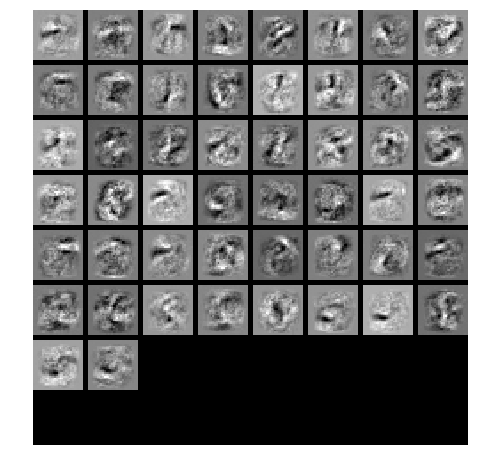

In [170]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 96.3%.

In [171]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9748
